## Data
We're going to be using some [business churn data](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/streaming.csv) to help a streaming service predict whether customers will "churn" (a.k.a. stop being a customer). The variables include:

- `gender`: self-disclosed gender identity, `male`, `female`, `nonbinary` or `other`
- `age`: age in years
- `income`: self-reported annual income in thousands
- `monthssubbed`: months subscribed to the service.
- `plan`: the plan the user is currently subscribed to, `P` for premium, `A` for ad-free, `B` for basic (with ads)
- `meanhourswatched`: mean hours of content watched per month
- `competitorsub`: whether or not the customer is subscribed to your competitor's streaming service `0` for no, `1` for yes
- `topgenre`: most common genre of content the user watches, includes many categories.
- `secondgenre`: second most common genre of content the user watches, includes many categories.
- `numprofiles`: number of user profiles associated with the account.
- `cancelled`: whether or not the user has cancelled the servce in the past, `0` for no, `1` for yes
- `downgraded`: whether or not the user has downgraded the servce at some point in the past (Premium is the highest plan, then Ad Free, then Basic), `0` for no, `1` for yes
- `bundle`: whether or not the user purchased their plan as a "bundle" with another service, `0` for no, `1` for yes
- `kids`: whether or not the user has an active Kids profile on their account, `0` for no, `1` for yes
- `longestsession`: the length of the longest watch session from the user, in minutes
- `churn`: whether or not the customer has "churned" (i.e. left the service), `0` for no, `1` for yes

## 1. Modeling
- Drop Missing Values and Reset Indices if needed.
- Using *Train-Test-Split Model Validation* with an 90/10 split and `sklearn` `Pipeline`s, build **two** models (**Logistic Regression**, and **Gradient Boosting Tree**) that predict `churn` using all the other variables.
- Z-score continuous/interval variables, and One Hot Encode categorical variables (when needed) before fitting your models.
- Once the modela are trained, calculate the *Accuracy, Recall, Precision, and ROC AUC* for both the training and testing sets for both models.
- Assess the **calibration** for the **test set** of both models.
- Choose whichever model you think performed the best and use it in the Recommendation System part (below)



## 2. Reccomendation System

(NOTE: this is similar to the Spotify recommendation activity we did for K-Nearest Neighbors)

<img src="https://drive.google.com/uc?export=view&id=1hFqrcLQM7Ibxu_KwvmJxG4pwSIx6598N" alt="Q" width = “400”/>


- Use your model to calculate the probability of churning for [these new customers](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/streamingNEW.csv).

<br>

- Grab the 200 customers (rows) with the highest predicted probability of churning (hint: sort the dataset by predicted probability using [`.nlargest()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html)). These are your "high-risk" customers.

<br>

- For each of your 200 high-risk customers, use [this customer Favorite Films Dataset](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/streamingFILMS.csv) to find the 10 most similar users to your high-risk customer
    - fit a [`NearestNeighbors()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) model on [this customer Favorite Films Dataset](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/streamingFILMS.csv)
    - grab the 10 nearest neighbors for your 200 high-risk users using `.kneighbors()`
    - use only the `age`, `income`, and `meanhourswatched` variables to calculate nearest neighbors


<br>

- For each of your 200 high-risk customers, add the row numbers of the 10 similar users to a list, and add those as a column to your test set data frame. It should look like this (`.head(6)` of data shown as an example):

|gender|age      |income|monthssubbed|plan|meanhourswatched|competitorsub|numprofiles|cancelled|downgraded|bundle|kids|longestsession|topgenre|secondgenre|pred          |neighbors   |
|------|---------|------|------------|----|----------------|-------------|-----------|---------|----------|------|----|--------------|--------|-----------|--------------|----|
|woman |25.0     |73.51 |27          |B   |22.22           |1            |2          |1        |0         |1     |0   |263.62        |Action  |Drama      |0.83          |[ 93 374 186   5 430 352  82 267 295 387]|
|woman |26.0     |57.69 |6           |B   |22.3            |0            |3          |1        |0         |0     |0   |122.39        |Comedy  |Thriller   |0.82          |[317 328 376 307 248 209 202 416  11 445]|
|woman |69.0     |33.62 |4           |B   |22.9            |1            |3          |0        |0         |0     |0   |74.85         |Drama   |Comedy     |0.81          |[481 199 183 358 484 187 448 407 316 259]|
|woman |20.0     |52.05 |1           |P   |9.36            |1            |2          |1        |0         |0     |1   |113.91        |Thriller|ScienceFiction|0.78          |[381 342   8 194 307 216 370 363 197 416]|
|woman |25.0     |49.33 |29          |B   |9.9             |0            |1          |1        |0         |0     |0   |49.43         |Comedy  |Horror     |0.78          |[194 342   8 432 377 232 370 381 306 427]|
|nonbinary|63.0     |41.88 |29          |B   |12.22           |1            |2          |1        |0         |0     |0   |237.46        |Drama   |Thriller   |0.75          |[183 481  89 316 204 142 113 343 364 286]|


- Write this data (the original data + new column shown above) to a `.csv` file using `df.to_csv("myfile.csv", index=False)` where `df` is the data frame you'd like to save. NOTE: that if you're running this in Colab, you'll need to click on the Folder icon on the left and download `myfile.csv` to your computer.

- Then upload that `.csv` file to [this app](https://shinylive.io/py/app/#h=0&code=NobwRAdghgtgpmAXGKAHVA6VBPMAaMAYwHsIAXOcpMAMwCdiYACVKCAEygGcmBLGVMTpkmdOFHYB9QlwBueJgBEoZKADE6sOAB0I9Rky4ALXhGx8BQkQEF0CsRzh0FAV173xhMr1k69DZlYyIwAbXgAjC0FhJgAFFSNdXVMaXhC4JgBeOISACklJVPSCgEosKAcRAHombTAYYlleOC4MGVk63QamlqzRcSl23JS0uBLdGj7gOrU0mDqmAGpDMjphkqYaIT4+CFE2AHM4XIBGPBOTkoBdJMdJo7JJbubJVDF2LlyGAHcIFxguApni0FHtsicAAwlRC6JhwpgADz6wNaaWIhGAPz+AKuwBoVwwsigIRcLQwZGIYS4ZFy4z28KR2WAvAozC2dFExG+u0Rm22LLgzFMnO+N3pcMZTCpNK4cBpCJKdPh-TILjoEFyCOAEMQECudN0aFQkjcfTc5SOhRJvHYuVh8PNRhOdrAAGEXNTGE4mABZRrNJgAJTgJBg8A4Kl4pDqJTw9rh5oAEgAVH0AGRdAB5UAA+ZMmHhGpgwKAAa16bzg7F4XijEB47OL-t6niMTA93pgvAORhEYXLTHC3CrTFITG+RhUTGCGQa1MM-DSFXbsroPGFM6YnFUsr7vHLGF9ZYyXDVGWwxDVTDack2oyYk8LTBIJJge0IxPS7CYmfCOYgcDdkY4RCFwmZVH+06TiInpiE+0qjpMm4-Ls1aEL0jabpCTAARULQiABQEgWufIcq2W4qFALDEKYZAYOBuYxnG4rtrwGBGAATC6ADKcreBABxcEx8asRgpioC4jzYk4NYuhAdQKHUrpGMQxCykwABy-zhN6xCTMGobhtudZCfgTBEiSGTghCQLCuCQJQJKHE2SscCoH0lzMcq5riZJhSjC6RRwCcCm1GAACqqAhMQEhQRk7RMLM6RMAAmpeTCumIKhVjCZkwC4ITeFFcCZGoxKyrGIk+RAEmPFAtakJI4SSRSGp1AcxChXUADilBONlQYhowRmRqQpmVSxjprBN3lsZxLoGcNlDGWNwmTWxl5kLVkjblAhSaPALqngcRzUiZa0GvJdyGE4vhrL5ZAKJttUKLKXBcHW0IiewkzZFlta+BgABqxKkrkyiqBoWi0pdyoAMT9PV3i+EwcA0DQIYiI2QXtlFMXVgJIkAAL-cjcAYAAoujmPE6TPjk3AvjkMMNWSRgQWXN9aNMJItIwixyo-Rgu5fAM0hyCztXs6MzolNquJ1LtQSJGA+pKsq8LE89km08tTgYLt+1aLrSP0xgjOUDSD0YB16twuw3PHad3hjXzImC5IrLudkQsPLS7vwmIhDSJSUwPE8zavO8nxsWIUX1ccdTTGZnRgGUcchAnLo3PgqdlFwUUsrSeAoqCfTWxqiqkTswpSF7yeET2xGmVcYoa-CqzYIgtQC+3W6e4KmCmKuNIuXUQemR4wcvnbGtwAi6GoGQ-N9xrdeD8nE91FcfRByHIQB3CYiququTrwIl23Ia6B9LYqC5EaJruDddB3XSYAAL54OA0DwNQKI3lkPgIgpAKBUGQHUKARwFJ1FMKGHQud6jiAgCpNUXBvgqEIEYKsMCwBJRgCFRB+COK4PwQAZlIXMAALJQkIMAACstCYAADYmEAHYmEAA4mEAE4mGQk6BAehzC8CcPoRgHhbDzgQjIRgKhUi6gUxgM1eSiCABC4gOSukvOQOg2BcHhQgMRVRcYwDWEkkIOAABHNwgpcFplUqWUwBwmCRVwT6QUQhzB6SYAAKQ9N4dCCh8wINMcmMszimDJm7N6P0LhyBQFMLgxQdB6YAFpwjmG4ipYg-EDi4OyaYYgzUDhQAwbg10md3o1iYAARVJJQQRVCyF4DYeIqRJwqGmOUmwdETBzBwBCA+XgAArYgW5BlMG4mwCkz5QGaClGpcysBUC8AYIWN6RTJ51DTNwEQ-j5w+jYME7BuCADqtEnC4I0lRWQxBsAAQUKWMsOFbn3IArg7qFRUlQLgN3awSh0T-EthUcwwoqEZUnEvJwhYOBMDYEwCmqzooHFJLgji3xSyAiYCcbAdBkkelLLggA0hUIZRz9GIMUM0N6fioBGA5MKV0AAvJwEAuQsmZQUkMx8CpSlNGo+qRgPRNPoXgHhHEMBkJ4ecKhGBmGcNMd1TQLhmWkFCXUaZZBsBllgO4uAco4pTNUGubuHjDWBnuUGYgRw1y4LUQwRg2y3SPkicobAYQexkFwQAeUkh9B2uDgzcFIFAcIyVEzYEEDOD62LrDuIRWclSTAACSEAmYUG-JuP00ZEHZPRKWJg1gvAFPiewLkqjdD0JsswiEGBOl4GYXKqhYrNUqDVJwcwGkgIiCnJueImd0LnKrATFx1h2BNHQt3biqBxCFo0lyUcHI1CWLukwRMlJvxpSvLETwGqwAAC1KAshVkqlwFRR2IvYOwSlpifS8GqaGvRcQ1IsnOogs5GRrBiCNT0gQ77TEUwRFoExdQPEUE6ogv1ZA0l6TSWo4gN7EUIlnakygQ7EEpq4JnDgJyEG6DISIzhbD63nHEScBRYBYikCwRIKATCanFpMBbcM3q80UmffoZgajhWqAgN3EJR4nECUQkwAA5MmTQvgQjpBIgAMiPAcGsvA2BcDEwoeNiDYjpGHICiAYmRDJkvFg30+7qNmAKaMcgTAk0PtQ862YzAHaJXwvRxB96YjcTUiIQpRauxsdMQhkI5aXHRSJESxBC7mWsq3LwRK3YKjEAUGmfDEAOItLYXKthIiOIkZEXUawZh1XuNUhwA6cQ1mJIKUYHVMAsFxesFVxBiY2Dfh8WVCgQbKBTOwYTRBxLSAXlLGkjqdAVHEAi90tU3hnVedSNVtUbnAPKPiYI+hUieE8IwPQsV6X62KrA6Yb8Xz4C4MTE4UsHpiwzO4Pa0NuD8xiAyNxB9FASJjhzXsXZ5ZcGxBcA7K86UQhif4BJAHzgmC7NwSm5lqyAuKNWYQKJxIMg+NJekD6V3WsZWisEYg-zTPVlUC7PYY5NwpssNU8IaQWTeP0owGZNSHEo2FFRQMaAbQhHMEB1gHBImGPpmuOAeH7EREyQoP0CToC4OsCWcgPBnPJicKSEIyWWjXLeQ84XTBnmFugOZd5qWqGKuYeIiEXStstLqLuugGMvAZVazabKIvEHhIgKWSKGBwrcQKUtDkDsORpmaDpXBQNnzYLIHdFxcWQIhGMBkCA+4bWcAqTaklw14mvY1zrnDhAXDJMZmkZHIRJt1GUBAdConNyfpwXmqzIhbMFxhYI9LeAW0YAhDK5hUqOKmOmaUhZ0yBKwD1Xmy8QzZleYKvapwRweRqEzmGRpVK0ZLhT4gy1pYJuQbvQisn2DfSlZd6Y2I3YDjmEFe731YhSwqVkNgcwt-0jhATQ+sczmRkSG11DxBlTdPMunAYER2JDWzFWIwwGyzwA4hOAgN7zqA0jgG5DOSEGC2P2txU1UFcUTzug+mJ14DizSWtTlxU1+wqAfUhSgA7FvR2V4AxlE12ToD0TQLAG4j40vUyVSkvCFxCBoFDycFIH3CgDEx4DUTWWCE7Whwr3eAiGSiOUTwpCHCLUTxLBJ3tQYBnDXAwC0KYB9T2A3S5yYGVR0XYBl3RhZB3DiyNAqFUFYx3zLwwBTQwBSkPG2GpT+XXUXUnzVCaBRm4HhT2DTQdlnUcGs2-RmzY10BOBlU4VkTIUVU4TrTIStzAF8WIDGR5E3FYIqGdR9EknPSGXHS7E0BJymXRGaG1RlxkzgAOAYGuxwjJyAMEAMTIA4zYF+09V7FE0qQrTYCgGYKM07Rsz8PzDQQkKpTWUxkiUDGwH3SyMIA-FmT+0YKrwPyA0nACRl2gASQOhnzoDCD2A0T2KSTAEiJNxgJOEVQo3lW6TQFR0mG6lUm-A3VnXTyK2G1G3G1LxYI9GCI+jHB8WpS4B0jCDRl9TGR4CqPZQVwyFgCEGSzUge3IN10YBok0GdVlxkg-AOINXxVdwiRE2iVtUP3iVUGOO6RrDo2dUk0pC52+EeJn3nA3QoCGTHG4icW-EtW+CaQyzrWETb27w4hlU1WaAOAUEUCuSpRogJP4G10UClJcSBl4FYHel6PcRtHYGSh8WzS9HIFwQAA0awXAxMJ9iBUN891F4lywORCC3CpQ5RmUwFkdoFxizpyBxkR8AJ0JcS+9N1mgIcQkClnlmUnEtDDwuAgyQztDwyoBgy4tqREsOoi0xtKIZdnkyBTwnF6iKJ3o7CXUIgbQ4Bnkmx2VSkTVeA1te82ESMyExVxF1tAMmgHYK8VNdgmgPpw190ypy1rsRk4ArxDUuwAI1RfdzB3QhwFAfUjx8oKApkIgZJekKkTBqcHYiyGgSzKJUlcEKZ2Vyw9h2Vw8IlUkddaIqIxMj19MmBCCjkSwLxDBWsbVuAqJCCU0nFJx+kaILxyzEFtyJtut9zaMnEjzhNMCzzKAxNLypyoBbyuB7zSkYKIKXzeA3zPzPyg0CzKCkRw02AZA1ccjclsESJsdlAXAvVm9IshASwhlmd905T9MRBXRPxTNEpNB3dmhBEm1G0YD6Fe9xFmE4CwBzsf1rAaA3sHsXlGxrBCpp1vCfBiRRMqJEx-gEUZ01kWQ1TH1+MplWAMMwkCwoBZB1lpx0oSxnlUlvAJzfUi8xwU0dLNV558jEUZAdw6cjUjk89lEls6gENsA0kECEQYM5ShAtyVtQMzFVg0AJAES690hrNG97M1sMtOF5UTc61Ns+9QxWA1xPKwBAxBdmCwi4g3JUNu4F0KAGwAh4U6VospkZK7lvT4CKK5LqLKj0gajxkSx6i9hVhTSmjEFZcSxotiQ4tVQWi4sMgON9cuBKRcy1FopEMViMgNE9lLKhkyovAhBu4NETA4Vq9lwxwldGC4SolTlXdEMoKhieARi1wxjls0hsBhDIc9klBsp2LFU2kMAOIxUkj5VW0wAjk389gP8v9ktsq00tghi7U81SwXKEVv1aMBJBlPkWLnMPFyAQw0AKQLLEFdkmzqw4Bwh4zQhRdUBVxJ190ekPoRNNwKZ2BnTTEw8bUAJBwGBOAcI5RrliBosMhqx4sB8ktId90BtmBvAZMhxnkW8iMYDMtWlJViNTEeEIQClVBRydNQrT82A5QqIYzmU1QGAFAU0D4+qIrgghwIxZB-tzTTFP0kzxqD8-1VlVoqVUkRLnFPlck4BP9-cqI0xVUsbTEfVUklNoAhluIsFAkviUsWiYVRNeJX4axZjVB5iVBxkliOQtTViER1jqQ1spE2E602EMtu9jdAtHUARfVgtU0GB6wCznUwbxkzlsjPkqQYKOBczxT1Q-SGw+yEQClWsPxqQMdESMgDS6kXBu5P15x06MhJN6osUIL4gYgOJu5gw3wZlZs2DIkODt1uDeC80udObH8Iqwg0KA84hUlA0TiIBCM8BuLtsWkqEYDmEhSwBol4BxwT1NIZiIAPk+qXAaBwg6AXAsExSJS+968HcZNmDFTawYBmCUl0kOD81clXbTqKRSAXFmpJxzBE8chCAWQqIfQMANM+tAtHI3tmCk0pwsNEp4kzAAB+exe0mc9nLBWUti9RFQMgdIIwstbuaA567AHgffDIJRVZMQB6mm503QYu5hKWxVDiSVDirysg46wsjIAdXgGY65QUNUOLYlC8YwNZcZMhbubch4Y6VS37AqKav2ryoB+dQZKavYWIOCS2LgbuIPF2qmu26KF5HxH0QRt7cwH1dGa1QgQtFJf4Qc-JdRfCDw5k0cPYNkm0a1LkvNdtOgQY7tL1eFEQftYkBOSzfKQdQB+YfrA1VDBanIbO7G2gu4x6xg7AZgm5A3LXJ5F5fXO5LXQRKI0Rc484ass4OoAO-m7TSiCXFM78j4JoKoipMlJZBi+MgCTgUxxPA4DqnxKiLzOgL00BsDFoGCufDQAwT7IcdSSS1ASce1exzSRxscFxloNxjx2gvJX9XxwtfxwJpwYJ0Jy1cJpQUp6J85RdbHBfFqPZv6ioBIXNUxcdDGlQZlTR7KjE1JLE1KTRECCbB7b4QZFGSXYIUyXQPixtOVCjRtcRThZ+7TcQdSWigzKJYzNsDxSQ1RtZItAm9DfdQVYwTArsQce5CQZlEwHVVQZJUGe1bgXsKiPlkCHVdgIVpF0V5rYkSYF7akCF3Kh2DCwcXPbFFLZ1RSsMZxanTJ6rAtItEtDho8kJAcDRrRy+qhGyGsiRXbSVLpTVKJ70LzaAVQDTX1TJUsdlJmdlGY8Pf7XMn1AmQwScesPgAA7VLgEVj6ZJaa-3DIVgAfKUKiSoPoxFQ2wLHTLBX3FBcZZzS1dSQg7CQrJZcUwQB9WxiKdycKFij0AAQl2P2KYEOP2JJU0AdjIGZSnH1zeG4C3yaALwSEHHMHFI+gOE0qTScHUahaqKGWQL2I+FM3ZsvrzpvrrU+rwEIw+t+oYqwSEHWRl3gFRaEJ4G4hxblGwWsIEwPyOWfVP3CfZG-FYK8VIWKPwL8QDy-NMSFunDSBCDFuytyoEiUxEFJSmsYNKV9UklgxoHg0Q25xQxkk5b4MyZIv5opnzbqBTQqH1xAhAjweinqrAGyc6M2eOsvBbs-cICyjLr6rXJcXzGaF8EJavrOGYW7xlRgOgNMUEsux4Dlx3AKW+GcVMHAo3AP3iEuToAestUYAe1yT5WCNWBcD5DICHAI6o0pgwC6yqQvFCvga8ZicCxxN9A9EIEHt-v-sAeAaUAhfFNijZMtNISBW4-oTODYTdaIw70ox9QrpTSroDXV2-IEG1S7bcGC2cWYMl2-H4CmS3zoAdtCuVW4B4G-UoFzYDMQUMRIAgBsUXfYGYN4mUTSG05TRTQKW0sFDaI33QpcEwt1dwuM+4FM9+ylJEFmF8CaSkQVQ+pETIUlTIXdZfoIrgAeq83gGCEiWsBAkkkqq83i4he9eTTLbUgyErYhCUJrbchomxR9Tu3VFTT2A0ANXLRgCfeew4xcu0WigAiGRSWPG0aQJQPK9UYe2FUcEZT2G6hcB1Wl0QX8TdOxVZzMHHCgsoScwyDUFcwvcxOvamTvZnEfdUaPFfZrFLA-eNW-bzUFGpxJFTTq6pWwvqer2u6aRNyLt70hDkQOwigr1IFK-eH6PEu2EkuXhqrjosnkvXSUqSbEbUsix7UF-zHo+x1DuY5yI7V0kmCu6eJWVamYLKi4DwZ9ciRuRPn3XvVYaGV8XcTQS3G04+hiqCQFudWgwi+SQcKcJcI5DcO7g3W5C8P55hNhQu6CL1lCOECzy0z3TDWSmJWcRu9FVaXzvvqy0m7haXgRaRf1QaGfR8QOUCW1wK-JLeBU2caEG0haDz1IRuy4BLB4Gaj2PVT1aitMRSyOAjFHCiVGAlevWqJHy6xDWgA7PXSjXwpaHraLQMSbZba4Hbddz+9PuFCB5B+yueM19ySLYdd72Nw+qkVkTYSGb+tDUhwfSohnfQj5xEy2dJJ2eHH1Qg0RL4xqQsmdV3Wexq3tUsi7bWW+6z81RNVebcXc1Kw6JEGFCBicBrl4cYAMPqUh1yJJoauZNymGh-QKc06qrFSMIAcywAacVEZzHxh3AKBDEbmAjClW2xSJBS8qZImmiYBKZSmFgK7Oyi8AZBDUxXU8F2HyiMo52gHa3L13iwDdvy39KMIfkYI1h1U3cTOMWA9AUk2aBwMIKOHmImB7ET1LIhwBJSTg5wUginnQELTWB6+vaHavJ2y6RIp6DLHZm2B6TQoOQUiH7ukzRAA8jUFyYLEPSYAj16k49OJroJnrhMeAhBBeiICXqDRV68uX7HqWhxkAHqVEUQqayX7kspUQ3DvL9XCTqsjUt7cQGQDH6mI006zZcIcRSGJ49gJYRJHQgg55VTBfeFSPd0sSJcf+Evf-oANATaNGBejAxiYFqImNEUCNdMiRUsau4AwdgsejZkcFIQD8zguem4OsJMAGh7ONIDb3Cog0ZczQPYJANISIFD8rGHgFJ2CBXo8aDuN0hDk0y6BcsUfCRB0g4hJV8sAlYkCoVeT8sGATQVip1kwzEcqIpHMohR1LSVNRCZAerBeVyKa9koDFSjj6jujeBTs7mCoC4hSgxlaaTgEwnml5wOwEQBODrARQerhJ0gxfbsiWF7L9kRAg5PspRyy7vQba0ACrg1zly-cpwONcwMc2YC7phMMTKtDKjYRJUeEOWQTskVmqthRcLRZKGVGq5wRESPAZEg0EqxUlckpWDBi4CwY4Q4s8QPBpgUIbENLOdQEYRADFKpJos6QBQKCzTwr4iQnAU8LglSLYBK8X7JgoPyD6pI48PILSCjUQyDIUGVtfCGyi3KNl0MLZUwG2RkJG4aRSVE4GKibQSJDh96QqNZSfCFJdOUCeQbCUMbXM9EbqOqmWHtTdhR6+EOsCUJkz3UeAp+EIDUX4Bmt0AkSdwf0RjZz1GwpVbarKJYLZQZMAoUPCpl7ILhAaCY9lL9lSREhmG+MNbDSK2z7sSMbCKljplpakB6WRmIBky33ThJqcA0anJ-lCpIoakCI+pujn75Y44U3RPHATg8RE5RopOLqgfgpyCAqcNOGLj4ktTicmcjQDIKziDAc4NS6HSEfzmwIwpM+J1bpK6m8YiNQRlYvLhrnCYzk5CewSgpMAdjMAZ0VgeOAOxAaUdqSyYukohgqTpBTSKgTQGqS9TmBX6LQO7gLVKSEAXK5bKiAvSxQVJj0eDS2Hh0NoEYzgVCOVJ3gPaSoqyBbY8A9XB4NQ9gHCDUaMJtoAtxAQLcpgyjpKsMxWieQZLN0ypfFT8J0C-GwC+JHIXARIB9PFFIDsA3AVw4Tp4XGQaJKqfoB2EMlyAAoTgHEY1G5DiA4ZxgfVTKmQFYxMBnIrCKDJr0Wz1EeJiCAASRGByBFUs+7PivWjOCyJi6MwUwHJTW6SQ6wOoqBF-iLIADlcODUlMEGypK4qISwtsNEnRhsBqCW-dLttVyBjBPkF6KYdCRYCTgxA3KEkCohLHNsUB6rUKlYOOxrJTRDxH+rC0vYUk9gKUDFo4jU6a8cBV9XvPSOuKHsqE-FbiD8UoB-FSckwQEsCWaC71-aOkPGhXn3TdRm695XBClDuTf0MgCBKOhDn0rogXqUGJmj4nCi10AhT4YIeCNMTUcRAtHKXh6Bl5Md2JzqBimAn3QpobMD6Jlhfms4N0NkGUTdPCh4Db110miYAfmCnAccRM1tOUj0y7zd4yW1ZX6mVMMIVSeAVU4cTG2To3SCKQbKoMpDZSNBPk56TJpEhpo3orG4OUcNp2Byg5-smIiYQ5wAaDjQJapa9JqR6EZA-QrGPKS4AKmSdpOF5OTku0U7KdVIZTPvBvRExb0uCsoHgk0hETCJ60o3bvGQk36xA8UKA5zMKhLCmBv82VMPi8N6ylEXA7kTCAfinz6dcipYJVmElcymSfERmZgL4nqjFImm+QuoP4hOiyZRMfqQPBIHtlv88Ecw5mW43frLD8ZAYBiusL9Z5oPUTQXNqkngDKIjy2FIQFAAYYAjM4yPK9rN3R4PthAqEl9uYDfZ48hAn7B7psU4DRRhBqWMhDZASIYBOEiqB+ttkm4tYeCGCHOb12uQS9dBcpEsZJielQJE89oovL1PS6pJZQzBbRE2S0DTp+AMLOoHPxIBayiRIgEkcxQMAUjrRYGENPVhqYn4nAduBeRtJJxQNiQW+aSSIEAYegdYl9OIqIn457CpUx7FbtjkDCrZEE26ETL1HIDpBwwJWRPKV2SxKlU0QaYpDJx4AIFN5dQbdKxNKr-z1E92VjijxxQQhCEBbR4lUyWqgKqMNYPXuVQMBs5GYlIPyVPLAC7I4UPiBxBNi7ZwBtq4IrYTWjNwtJy58qSbrsnnCyCjpa8tDOQEnAhBp0xOepkolnzoZEpITDGKkgEjq8npkSRsM1QtKRiRMigaMV8W7QQB0izyPljQA7ChUU0+0yqodIMQqLKC1+bsN5JDph1ce6eYWqB3A4S1REJGSRFAQgK-UfU4JKUDFSWTOZYSEOBxDdOXDUk2ZiI8irAEhROpoa3cG3E4zkpg1LIU0nImwCVIFR1xlmdZmWliEGpD89YUShCIThFopJmcDsr9gNQYw4AIrLfOfzgC5ktUp4EZMKEgFMBKlnAFgWYjoAwAXKuhVLNWlaQQyukedD6vxWsA8AHpb0w-BcLHQPtvwPqJOgNM-DmAHp0ybkA6lGmGEwgAgWlD4iWqSREpG6N+vrMWoFR0g6ZUOcJxVZNyX0tEarGUmMBiTBo-4peImIdkupDgGQL-rXygAqAYhqRaompEzhtlWGqMHgqoFVy-TgByQksByDSHEFMhzyuYNlTW5ogbEiU4NGEu76Rpo02CWNPsrLywBlmqaSYOArpYREIAzCDLFRJESdIJEzPSJkphFavJjAyyZlA0CFbdYFWdyYAeBlKXJIVMqfSYEENig40la1hfnKgBarVFaiHVdlF1UaJt1C+lsABdTn0zAL8IKbVlHsGJT9g40vuPlJPnHyP8jsgiHdk-SPZt5H6zPQ2UZR1n6dqW3AM8BVhkxqlM4bVUTN5QjSAQvU2KL2SizqnosKgmLL4moAABUX7AVUTx4IucMY9YcmNoUbDaIMEmTHIstwpAuAt8ltOoMSgqaK8jU8QNBSQNPpXcYAF9K2kKllAYco5lsMuWKirLbZzgbrQDFZMGRoCMgRIUpConLTOpxSRQOjLxOfgG8TACgYMD63GQKYjkPdKDC0XGRgD-Mp5XQvrn3LPIxaxAcCheE3LKsz59qHVJnEwLxkdUBST5WkSYAHpeArKUsKhODRhB9xjMpgIqWED5E1ScKE7Pr28xdshAkSZAnLgyIH412qBW5YYk2B1itwYmYqbT1ESpVdssiPjmEnaFxZ7BXQyeqer6GuCcgMQYYdkINZKlVkGQRMEBCbkpsasakJrKYhXrE8ZIImBdL4GUQQtdk3gVUM5iPQMASUOg09WhutV5pJw4yIPHsBbrRs4sYQbTkK0TWQspqqMEQPej42LSRA3WIcBQH0XuZTeckhcJb2-yRcrOdAOfMKAXywBP5DrGtI-RaTd5OEPSjsg9Q3QdhU08Mp7AqNuVh8RMug+jfp2TCxpUMcWGABQGpz+FtOULLBL4AKj41GxlhDyuOwp5xYsEHoYsYtl+5PZRMu0uBpKt1J9UYgu6dAE4BKru0sFzAKiDbOqoDyfCQVPqs9y-RMc1IOXAJJoDCDZVrauXX9AoIy7OpZqyC3QagrxU7ZxUsiXvJKnoSTcQkXiUTMGCZh01FEXA8ZH6F4HFd3Cgg-KB9A-CiDxB6IerCmzOgPZNAqQEgAoHw6MMB2zDIVGw2mnI0mZxaj8EvH5qndXcLFLgLLhjKkACcb80+vUms6pE1QAERKR4hVJHMKqpzXTBcyuanVBiAyq6lwBup1Bokw9cDZ0InqnToNmgFwfPUGGeCV6WxdMjnTCEtbpEq-caVWCmG2UUiJJNSAoCh7mAMNiCatPtwanZFHq6Su9J4jQxCNJgDdSjnCxLCnoCsrdA3Dhm7JDgxkxfeCXiULQSUpKfPHwnJVo6GtlKovYAd0V+AXsBqg7cQSNW8CowjK6oKiFNWihrY-OdIgTjZHgKa5Hk4AvXOrsRmha1Wb2IRnsE+yPUfsmGPYGQP+AUCeAVAmcrQLGj-B+AV4bsL3PcyxrLwCa6HLDjF4n5f+XRaKL8F6L5ULEYgGxM0AFnoENamBbWrrX5oG1sW4yd1IsI-r+IQSwA4Sefi7ZiSmkMqdbB3ncnAbKMJ0yXqggY5TIrpsAdErwDSRlQviPqBIMwXCjytvJwgaVqynUpnYnADgYyewxJ3dVBAx6prn3jLQVoJW4TEZP8FWQkNCORIQHgwGZRmApltXdihXO7zcUK1luZ+tEIqLY0mGGQFhtgjFLd7NUEZNiFGWP2hlDAx+lYAmXGTfoxNkUhlCksFRjYQwpIdxkWi7aDpdyI4bRPAAJltD-to9BwVBqNQwbwdi9ZeoKGh3OpiUeiLnLP1yR0oiQM+CvEYAq4ARUUDALBOLQBF8bDUgm8ZMJtRh7AxN4gc0gRiG7iIH6rSORJNxgNf4B2Q7KiCO3DL+g5mp7Q6s6gpilh2AAQZ+OT26SLsAGvAf4BUkAa5r0VKgotOoP8JZotB1SCzdBqEAmZDBb2JgCYK9mFJ2UJSMpNlUijVwsuBNNQnOl1nxY6EiXMgpbE4XcKBoPiPhYpoEXsUtNluRVLfVbwzBvOhhBgLrICnkBey2KcUtyiumqghk1oDPQFqpJFIZcxk0yeZMYb182sp67yjIaNQUwoEKo25Y1mVim1OA5tOSWoX5mcGZmfPHPsPNuVfJcZ-UiZNlLwitjWkSVHTW3ggKTcKabqKCr-1bl9kcWpAquk2WhzYZWs+VZ5MNX6lKC+8ZYayfuSca5lqMAfZKMSDOarAYSmpNEgVDcBqk4gpIYQOMlyokBESb9GKZ-UoDVSvKmiD6SST0Sp5VkCgasQEMST-CCMNkSECRj5LOQpUzPS-C4g+P5GNCrQbQroQ8IGEeGcgjhq31KQlhvjBFX44eH+P6FzAQJ1hTlQLKJc5QrKsHoFJXJUQQpgDMKQkGyovtoWoVPQ42AMM5F1SDM1yjqTxUgaWtVc+IjYocXoxzkqpPNC9xDoqRvgzBOvstBQVWpsc1NNI-eP14hp+NvoN-AbmsyibsoEmwWYfNrxbzyxkKfvoEsQw8b8ObkGNiIG8pBooERwJDIVh-Fwp2cJ0KsOYEKx-7BZ7WrjF214xsAs5+JFxD4gkxSZBksmHgP2qgTKZVM6mI0dIxEQErb5UBCbojqUhVJRt8Y5fKYnT7x09aebdxK7vjWXgtyvWngai34FZshBo2qiOgYm2SD6lDFAQLg1oI1gbV0u8KOCd-xLkCyq5UgA+TLI0acRwjTSDtzRVUYexlqtMfp3OwCBbCTSSskXS6S+cq5lGJhT5jYINjHmr8eJexnOqVJkEGueAOTtnKhUjM5CotGEF8CJClInCmKt1tLHapdUYesANBiqbyjHh3oZ4a8PArvC7OGQL4WytdKzIPSIYCUlWhaTVyJEB7Ulpvx9RF41qHGTahQqOyWC9qewA6gwH9IPidkO+88awwP00VGYtGU2UpEGSeb1xWc4QUjh8S7oZyRmX4PHjhTY5BMSaXMtok7lqQPwOo0NJwYWSbQFkvgLlFphZrdhPZkFlglgkHSdFT6KaasO7VM1uE1sNabvNLTlnbZmeNyctNWFLBplVQMuPpRdUGWLcRlOhcZXWEmWpopkZSLtmhnuKLKSavQFZaQa31noMpImfGXdp7RISZSb+wTHX3qiYTsNcG3Cc1lNLz855dkykPHnCAhsMgW+QqFNWgnaCkcl2iM8ozZFwB4TfDE4AIwN0pH-04jHgJI33SpEjAehSgM+j5Nbj3cPlajLmSy6qpisl9BVDfU7G8cqJlGLLo4FMxo0dtmNHQoiXrGnUYAD1C5BjFTKJJpwIx+pVkRnI+JkC-3AxFIUjBH84UvS2UMogMK6DYgaSeRMdTLROBY8NgNZPHGOMsF0DaodEEYGwP00qxJ4WuHWNzLs4HYdyc3q1HhT9QC8RRhERFirQ2QC69aZfjASoSHC-sbpfpPsA3V9VOACfAdkny0zo63rmgD63egV7wDmKI4FrNF1IDME32mC3Jv4WQyVnVCH6Zk2Ej2SJSsizsJzgesMLnUQkcE08ZuIyDORlhroS2GqESmCpRk2nQVN8DZ0n5NAzKdgInkLRyARWNqcZGlHsOg9qRN9GAjKlkQUTNUvgWZAuYpCiHyZvuMINFFhUTtlhHBGdk7vHrTc4Nn4SZG+o3bmpgBygHZimJ0Low0ktmGcp+mvSryzEUlvCGWFMpzorbYJJZJCVcUwkU+8JdEhGBLkfR90x2tVABB4DOQIQitOvMU3qilMKyN9YDS0jrScJN+36bTk6qgBpJnkbpS7FmWMAPl6lC+JUr9kVldhlZSlNWZTKtoFki02GCpjLj-rUznO7dPo+Q1uUzpMl1gbJSHySsBJozREkfaWDH3-pJ9VHZxH+XGRjJdyZPcnlWikQ7Yq5ZwDiLLMUmbLtgm4NRDsrlCqrf8DN8wFItMQLTSATNFadXfWkLEzMoHLkKkC9S8qS8cpgrOFVYBNrfsufTWvCmizR79aRsyxMdQRRlQGgIqFfJrylWcDVDTGUDpFyJYiJ-ObkvAHWmYSUYAZva9ErVLRYw2zwDmULVdxQNy4oG+DWLGYXI7a5sBJKFNaDfyZoK-ttggHUAeB0gHQd-QuDSIAQ2jDpVQC25mgrnvu5vQNpAMLsodLdZwku5x7C0BUjBZUJs1UkEoSOCmiecmHKaQUlZM9YuQLuaRl6JIwILqDFwY6aYGUUoDNg6is7McMYNnD-Qlwj2+JyykHUVcHXRixOabH+TEEDxearMC9QVcz9p+mMpGTDKX74yDARMrfsmZgMYqDeAsPFSIQxlRgwAhdAEuUhBKu4hVNcKGiGQRLSQUSrctWsEHOZ61YaIfdx2vqUsfR5wD0YcNEYxc57aQUdBV3HwmrDZV9mTAfZ7TSDDkCKR+VwK7uFZFs7AN7QcqDV67XOjMSkjxrGYARicWZuXWWHOFPSen+qQ1JkRNRv7Nb1qcwJaltTNrV8mcdfFsLeqyyCBW2eskpGXuQ4Tx5yCYt+BkSIBCM7emTPBktjVw1TDEs1ukRazQAvbUAvInJUKKVYSiXmAiUZaUiU8vwO-Ljh4z4jR0rT5OauuIbMTZaLW6yfLdSEK0kF1EmcGLAHXuWSEpqb4FstQ0sffhGw26IucSHo7sMbr-JetHQr3ataJ+3oKfsDxRu-bIj7mUnS5SjNW8vZI4jAhkHHED7rcGpgwL1PCDAq87Ndv5eWAROaLAhz-EIVZ2XDaJzjiUimA6ObJURnRD6V0TqPR2Q8DT2O2HpfQnu82O8LSehElVX1rzwy-UQF8HPQgfOg8XzgWqtKS1Go00dvaBUhiIWopfkOotJMSg+n1gxGdl5gmkIJuJRF8amtezohcRvyuGgoEK2jrOhelW7-WM8LBNaLSDyN5MndfwUdfOvtErryrBhOkdCIvRsiS4nKjlmmJlAjZW5nHjHAmvhxUmbISfVINtdsKereTfYUcLOEl0SgZoK7yUnc76YX0+G05OCJNkbAAfDNaUkRZHh+a1gBi6QypsZ7abs-cvaodiDcRNM9NfgszdR7BDxCKr3Sj8DdTD73MFlpvgudQm2WMJHWhyzhNSddJOEcqPkvQqKtKRpsD6dxF8w5Bvz+o-yr2Si-kK3mcpIJPJbbkxiIoZizqIHhGDDBURwpTT5Rta2wS2shq9rXDc4mg5MBYOZ7BDnmibHU4Zy+uNKLDVlCTjpmf9x-gI6n4mbBE19TLHXPOCyMfqJOlPjSlEyU76urWeeDCISBOB4RKOAK9UiCsNJQqeGkjSIpcREb8NlHUQi4ku1nQobZRx4h+4oJHEzMJIHgOwtDK8qA+ImR5b9r0oGUlkca67KZTfQNtryCKUrtdkrT4qxUkIDyQz3EQ8JN+td9CISK0wYK4HmwCqjgruQkgkbZs6KR-Tik0AEp9qHKbicPMM052jLlmlma3Z3oH0A06dA10mEmrmbgWxcFmQTuURUY4jxxPZxPyGcQtj+z1S-pQnv7Zqs9PqN+B-0mnYd3Uqub3jIRyPn6LSsLVSUQ0T6GWYYMFKBYPzKp4hRaNlgE3VYXHvy6QS5jMnvWJSUoaoC6WIEHaANiyuZFLCJi7AIphUH4k2UzLYA-i-6EyACdEC2irrmUtMwrgdFewhuStP6TcPbQAx2NXSLiaDO2olw1gu1g0XtUwHdODrFndRiRC0gnsd5Jux53QaecavNW6mX872rvxc6f3D+LiY-oklP6ygiRkDjRxwDc9DJzswWSgItrVnJJnaeSErLJPKyn5NA9SyXCD-gr79lokSKH2sn7qzEjvHIFHyG9iB+DL69CTV1RIZ7bZDh8fYnIiyBtl4vNImWYMYA74IqI0vfGNAPwXeHZEJe7grzZbb5HuDxJ7ioE5dr7VFuTNW3k5oJEYCmKGhd3pekDcixuWQ8bqjbmW3I-36sVRUk7atqIrL7kjqntC6tYtuFaUNshlDyBZSYylhDFgjGKh4R0jx7daGRPm8JQy5jawEVrPpQtoJoVPiULgmJVHEzkmXZndlTDQz3fgeVdkjBfwAobLgDRd27zNBO3ck6HtCPJ7aVjOZfoQgQ3tbERhX3yM60zSGUyfYRPJhdZqGKNXAE3MsEP+-Kyp6Odaxbl1k2nCSCscMI6pROLynjRA+Tok1730VE53FTIqwtXbWL+6UtK0SU-0jXsjxKkmwPSMpEF7iAiIms9VyN9FLjdykp2mO-ZigyIaWjH6lhrDwEarkBelrqZUTA4AuLEUGQYNA7swWG1IsjhYr+E4xVGn+A7D5208i6bHO1mI2BnOHnpAGMElAF3r7oNyJ+Kre39PCgbe-4lpRASu3vt7pUlANgwVAeDNkROIGQAARQwEAKyjMAyqqpqLsZTPv6NoqVH6ayIfvttaYE1YOg6jAWAqDz+0v5kjAbU5CpQrAWadKBYd6R1BoYH8RATszsq4ZAGAUBLFNQGIePrvQGLkDOPriKA-2F1YZMWTBLx9oWgoOjk0FJFqKbE20vcQmaONh2SVam6AAFhYMYn44JIpfH4QV82WtXy10g7nFhHII7t75pYudORhd4e7JRi5EqoPc7sARROuKlELzujYmoKJEzZQUVEFvi-6v1jVIna3tmZJ+2-tpF5DIDyuWZI6k0qjqSUrVMKpZmDRD1S5k0-hSDWB53CQJXcVYIwCoSefl0TTUL3ACzvcyrDkIEQtwkIA6OTiApI9QKqF7atK-NuvqNoUqMkTr2S0rcyrSqonci72rOtlRkaRvpRqJu8-rFQ+OS-sMxM0HcgIxzMd0kya8BYGPGpIWYANyxSsxYDHgCs8rMKweOcopyjLgOkAAQAMg2K1KCkYQtXIUeAZkmpygAWu5DY47wiajfgchJybY4JCo4hCB2qv1iDYE2CNhCAnxIc4hA0AVjDbAcAeY6AYhajKTkAYpLdj9YCWJ-4zCFPBQDMEY3oAwwUk3hUDaca5LmQYoWKAoC4olHMoAkgJHpWT1GXSJ6Lyo-FMmB0k0Vv7JtgyeuUTYcEJGJhOSVdk4DQ2OGJrSYEk1P07+gPLDcFgApPlFp94+9MyiH0rAMfT9YiSJwB7AP5hghZkxEIBC+odyNdjRQZvLD7i8SiuMgqKX-uo7GiLEsKDmiTMpaL7EVIhABPWAGttgCc5xJRj1ItEIVq5sP+KYhlQ5YsDL5yjXtSCJSsQMWAtAyULOhhAWJM1IUWmGB+AkhYPgfyjo+Rk6hbk6IaxhYhzqIsEUaGQCb4GKQdD5ImK4TFYrvUxLAoxVyyRJBwnQLIIh4ho8HNlT5m7kBKJFmhAJWIcBtBPNrcBWBNlQzSUXnNIr4rauvi4aOpiaZKEBphyQThephwBwqiSHxZKizKOkZqiJYunYBquGtw78AU4NYCTgSBoxqqUZ8lmRNku4NqIXyLAVR5lqG-Iu44cHUItr6c7oP24FIV0mkxN+vLhdYsSpWikjsSpttYBDGHVvWCjGPUFJ4CgMnt+4WOfUCICZUyUOwBiYhWEI578+lHP5JC6-hlCb+gpsp4kOc3PewJcpgtIxdI1YY35XEnCBz5TCOuBeCIcJDm7Iuc9YIer3eF6MkabgL8i4hB4Y0ATz9eulKUocqg0F1o0UNKL0Cu+Fgh77qgHKAOyTC3WPiFbhSTL1gliPqNcpdgYbiirPIOqIAS-I1YDz5ugGzqvZeUNgaFiNA9gdnw-IefKUw6QVkkyGNoHkuKj7YMpip4uIani-RQA6MOYADKCGOqCP8LIrApXsewEBjN8kWPSi3Eqeo55wQzntgq8ReCvAECUg8D2ZQus9GsLdcAIsUQqQoVLxD5S8SC6Fuh1aPWhioK-FQjP0RyHxiDsWETHRegC3KIofqw-GwBtsKcu6oE6Y2E1J4k7uJ7je4BeFWAVAv3HNYWC0-GS4gCUXokxGoC6KUYS+WkTGQr2Wzlpg0Yk4As5X0Lhqs4j2R-oGH+OuykUwsgqSFAJP2EDolCwk79lvIJwjdoh7h8qnDiEKGRqFZo2CHQsQ5VMoBgMIxAJwMvQbEWWuqggueWkWgFaQ1NlTdswoJ9HLm4gUPIw6xojvL-u-9vipnACtOELFW8qDZ7hUCNEWilK9YGaz-MxaMALPu0EWSjc08EQjSCCBbihHW4QcFGBXYFOL8jRKz6kZ72ej4qrYI0vKpjb2M3cF8hISD7IsYvqRNhCAk2ZNpxGEcaEa6AYR5hrgYCaYpoQaSm4mp05n4oklfgXyQ3I8b1GyRHQb9sg7J0EsAaJGOz1KCBJ9zrsI8mNBf2gGEP4sAi2KeBj+4xjBTNCw6CbYiY46GTQxec6E2bcg2wCuhiAa6PoRboXBIVSFMkpIqrKB+4IvbkkH4CYHpM+5ioq4IeOh6okQZGhCwnettJ+4rI76JEQ0icqK8Gj2tIk8rMKY5olH8QsfsOQEhpthDCm2-WqVH4EVjMW4NsswMHSlE7nqiHCkIQGugaIMmF4rsG57K7HdYyqh7GhyBGOe7Na8jElR5ubaMyTHq+6KkbY+kmiEEFEYQY851gkQeUT5+yUqYCpShkt7o0s7ZqBy+oZga4izY7KBNiZeJxigYVc4DIv6Q0+bhiEfQBDEdiXUJojahhOgmMGAfACVI2iSoEIJcTZu-FD6G6IBTBAFgAaaFQKcsZ9GkSYwzBMmpayJhn8EBIjEUCG3Kc9h3TPinhuPqh4o4CF7M0Z1GzTACipN2FcB6Rlg5aYPuj4jC6WxPlysWvUk3jV0-xENIPoI0qCTj8gMsWJdCgKNDjT6nhpzTz6g9iR4m4HcW9SMigsnpLFooLkahuRAeAth02DVI0pNU40YGFZQhaAHSM65QU5E0ALkX4RuRoVKIQCQxAK2xY8cpO5Qgo7MX9RAWN6krSE8+biUEgc3WKiibEDTm9oyObeCRjdSoweYk0EdBCQrfILFvuhFcbPJsZVgHrrPQd2E+iWLU69KIGQw0ewHDQxsQjgmirA7KtBAm8mTKmrK866KrwSeXskLT5QieGgrwMvgBkhZIOSP3FKOOTGdLF6l0nLwt47UjAQXumTkQJPKrDNJ7FIkkpmSTqcAHPpQUieKpF3IZJOp6dRPIN1EHBLBMLbtU+EG3Tyk0vmKTdJipMqQt02VJGzCg5yrGx7q04IIxJs9Sv1Ta0Q1NOAtQY1DLqTU01Mtp8yiMaUimAXfj0gwxDkVqjj+o+D3pAElIPgwmeE3K0hS0xKrHGb83lIuYACieLS44JD3KFHcYNpppSCYRyJSKiYTpvpQum0dO6ZKYJAfWDemw0dYDpkTuCdwDWOkAnZo0YPk4AUAaoPgG8+LQpSrQA1KkSC0qnNNrKMquSKyJBuW0ZyJ1uYABMGb2PzmtKzBm0mEht+TgB35d+QOnaJRcKiC3hvm3eEH5SyctIcFhJHIEjE6EK1n6DzgbkY+rqBTMTZhfcRIf65+YKPPDEWO3yCphHABOMonAo2xG15MAEKCobR02OAihTiKKGijtBqrDT4IxqgpaxTYGghyRPygWOTZRi8cl8RXOaEGgDBUd1A9Qjmz1FcLSMvHElQQgDPDYqb8GyhkBbKsXFUR7KRov7QKRr2Pd4tAKkVRDhUupskH9B2XLiLYJnZClzOYiPPGSbqF4CqHgCaofUopoCIGZgpK2SIlIpo1CUYRz6D+PQkOeZTt8CH2vYNcxXeOhOfJbCRGLm4ECnYszzG2l6GbHx0FsS8gLo1scuiro3oA7GcEO6HuhfyfXtagSAbKuGAHxophwDHxaIOfioSzxAjwCBlHCj4IhGiDAHIh6QOc5+OwYS4hrsl8f5GtMGurrinCXTCtYB0hZHfhlpT+PjSMM83rnwPgPGqHSMAmVDBRdY5AA9SaBzkl0iuSgDnfSRmzduG4PhcXrMgJehjHyxTqvRJgRcsVdEiAYyGwegqpeAuDgT4M3gAQREEMStlSJJcAMkmSOyDF3bEoMbBQoLg9KF9JC6MEkEC8JJwWhyPUAkOei7mL2P5hrRFSAEiIYKmEMijymEYVatxUqABlKMLBMTzVcZPL6jm2eRuPyhaV-iPKCGqSCIaYYY0iGZxpPiDES+o1MPx6Jc-AA0DPeOQAVCH6U3E0kkuM-KHj1Qw3tRjvQBzOY5VoOUTYrnAUMYlgNAcQapGJByOppEzGItEsYLGP6CjhLoFqtaAy4emjwAGa6kMi4ma+VNPqqAQrN4nyUvifoL3K+nJqxmY5MoDgkyIOAIDJZHivfpSZkwOFq3KddBDSkmGxnCnbGfAiR6auFLGvxm4G+rZoyQxYI5qWEfwPCig6RgO5rP4XmvCg+a9SpagyqD1CArACVWvNQ1aNLMAIvYiSpr5TIKSpLh9eTCIYQGoXxJQwiA1DGoC0M2AInKwsaZBmRxY+5FqL+WFZpHHsRugurYkoeKCphpkSeIiBRoyhMizhAckgxKiY1jolgkefnFtgnAn3rIi-U-DotQv8zTDoxHk+jGpB1CxjKszmMLQgurHSjVFRSCJR+g44n6TjjDnn60ZLGRX6rjjfrJkxwdphXYinloQaOjcudTUYJyg4E7gZfIOBqgrgc7YQmMKOfowmlIHCZeGwJvTYcZ5+BQwjoi3BOhdpWlJbG9pTbrbEWwtPp9I-Su6C7FEslZJKhkshwjbK+GIIC5zKesQdADOZXoBpHFaPURjkKeUwkp5QY4mTxrQMfwurG-knGNsCo0HNFzSxYvNIlhq4NGmAJDGUkScbCB2aNwCzyAluq7X0VxG6EzA9ud5KvMuvGeADWAeGkh-YqAP0QykPIYcZLS7RG3KTAmCQHo12NPr9IxURhuMbuQ+CGKFzxsAgvHKsmTJBLfgLjOiAHMxfI4HE5LgVXzk5fVOfaRU3HFQakRuwucBxEQXPm6AMFKowZopMZHSpYpJgEypiUows15WyTSjyCCYnXruE9ej7olKKkUANWKU0EyK6TrRk8RqBpSzWGlbmAfwRUAXCMuBFkxktOlRgyQpovaHxuaklaJd2ZUIizLRUGHXpmaJ2bqjeAW+BdmoAV2exQ0i1ZAzwXAGrt0iOI3zNXCG5fVJXrV6bKsIDTsKmGuRHpy-kvGde3WF8hWBanB9rDEwqNdTrubCqnEro6cc-keJK-qXIlKbdO1bhGQWmzpbCoMZKj0i1ivWiUYD0rLi+gUzi0DAoZ3AESXcT2DdwNBTyRgnNBkyG9wm6njgv7rBu8WvKJ4EkKuplx8oTEr8SN7IJJzMU0sa70wb+pHT66zyZa4Au+6AAJnQ5aA2xyJHUIomCYCqaxigoD2L9GvYt-PmkP8qrhXJyOdClti3xYxmboZAKKv4ldY0cjpD8eTZsRrWFapCgLYyJli4hmWaqiaSmqYlDEKZEOLCoBd+b8TnlTSn8b2ReAFXELIYM5gNvRiyima-H1gjAInhUQyLsgpouiZuxgsUc+NYBwxqTtERJUXSEGb0Iz9E-pxYNrEuxhAsHoojAYvrpqhTRhKQ8RyUlSGzLXI8SDQyLk+2bGyHZX3LGLWY+HGkgtYaJLXR6A9dI3QWOjqCjDBgIeoKDCpyai5TJMGuIdTcgM9GkAZu8OpR7vBzrPxQ+gdAIeA2yC5kxHycJIA6aTAvXkEwBZ6QPpr0cGQKFkGopml7I+0Q4BmEscd6KUI5M5Qo0qVCx6aWC54PGiFzfgYXGNA10LRVQJvWkyCYDpE6khpavWxXOFSLIPAESBxWSyMOCU0NfF5RIsqkSJgkgrAPPLHUj6hkCgyvGa0gjBn1NtjfmypN1i0YwnpaRMOzbhkCsOjpBw4J0fKqp6bh08heiZ5n8ehDvQ-rMjpYcYPMBn8EoGd+RkoD1D9JFcfisdJzC6ttDZZ2hdirKLh6spMJV69gUSxaawGpcQkqaVNbjoJEeX7pYJyJhZnUQV4E0UkA6XNRZUQtFrchVJnRSIDdFvRdlxzMMqv6HZUvqv6pnYCBjbIHh+bgMCpcnnOzqRIhJLEg6IpJClEhgRgOpCJB4YGbz6CsWBkCfohUBLKtIVnpWRyoN7vKEp+gvIKjp+k6SY6k0U5nB7Ak4gpUz90JFuqLCcHekgF8q+6L96TANEeKR0RWPDsY5S34BlYZALETvzsRefjLicANOho7oA3OBD5ecEXu-xExWnOEy0xuNgzE-o3MukGsx5AOTYh2w3NRLQEPeAUJFI2huUji8L4DNw8AnWpQC7mm+Nvi-c3EZhIWwlMXtnLKkwKfgCAyUKwRPYj0LcraY4eTjg9EeIrcoUwxOCVg-om0a-b0cn6T1g7lVEa7JXgNZdZYH49ZYxFNlw6SJhsRsbO2Xbst1u2Jme+wkOZ7xP+c26wkc6Qmi8xopkJqgIRBoOBSmPGvgizZhZF5x54lWuhioGtyuXiV4h2TTxg8aROMiTlWROwVgAjeFwwyczbgiD6ZxKctKkpMwXvL7ouVDkyCU2uIJWdEvaVnrveaVERGUYXmKORsyubJOTXkkkM9hzkxkV0luxjcTSFBphwYPFFow8b+yskZRHKCJSMMt1BwyhhAVby0mQYRx-Cw6KxJne5Whd54I3nNDjRFWGNXYFc1mQ1rgxHSs-mXl88BNkaU1-pLYwqwPFolqJInFdjic2IUBwKCAOV1nBufHjrwnifHlfZeATnlOCapmdPmSRRcpL6UykvSZEj9J2XD1G3F2VBKL+JDpdyQy0HeDKiOseLqQyj64+qbYDZCRpwnDZPhmQB+GIDFuTIoxZep5iSDYNsBFiLVZ+CxQ9BdNi3aOmdsVS52-neoCpIYc+qTlEpRkbQOkaQfirK3gGor6cxGRrRtgB8W2DLU7mN1A+gGlpoC9kdyN3DaIsgL2SlgCgAhiikqSuC7yZRLErr1orIRSzJEqNFYhEGViECDegpIYuyGh7VJi6mh+vPGbu6z8jtz+Y7hIJgdY9TOdg-JmXFlAiAoBR2R5ih5R1rHlTGe0lRhnoD+52hewA6GH46kqbbdoG5cpzY1FZUzQ14u5I2WpKwQOxRmeEICRgXE5wC6xWcm8bcotYS6uRTCAbYFhYDOTZKjoOoffJoR-GehDTk0JZaA2KyUzYpmVjGvnhyBDgexMRWnULUlhG9+zlu7zKSMJCTWTImkjig6SrBHpJdOM8TMAs04yJcUqA5+sRZGaz9mQB0MrbGPxveQDjwhfUftkgqDZiRh1WNRHuJgAtR-kWgFHgGAb+KbeOAcIDASe3i5yUckIPjqaIhYHkzPszYM6i6i+og9wtmPaloo-pvEtRWnqNeAiYFUsWsVRNmZVJIUpa2tO251UBSOHIqY9gDKQxyDWUaUJy02t4DsUlZFti2KstF9XCmeBvzE4VgsaQZ8EchXtpx63IQcZ8hA5SAKahCKDqG6J+ofUqPxGEg9RieqesegJW6aOjZ2OcObGQI5zjjEFuOaOR9FjVbVaK7CAU1QpgzVwVc1hRMxrC-wXsmWq+b4l22O1LkeEhqoLSG4FemqU0BxSAZKGBglCiqG6hqxaJZbKo8w8AQke76sookV76+oVkgshUCrFk6np8Idc0ywA8aknY4SCdjZwcKqlHRzoA8aiASMatWPVhFoOGlBbEckSJPhSch5jalI+seU2To+K1q060+KFiZ6Os4qIowCccjh9lkMooTXYIoc+OYWHAl-DEpI4N-JaV5sPRVCwclv+HGGFoXDtPRWWM2b1Bq1MpirRzmpurKCooLIGUqBSg+IcAj4h5rECsuAEmzKcuGup5WmeOwr0xshyZYda4KJ1mOBQA51hNEoGbaqbopCIKrPhgq12NkK5BIERQCe0FEJDi+0dVju4WZpXp+A1RY2pCCIKIEVY49o-ROW5pAAUqUgYmZ6jiSZ4jYRFI5eKdrw5Y8n2YI6OMyGHZrclRLLnTNoDPLgXPWeMfRypoJYKdD2IjiJEg3e3-PykPqi1QijLVoqbcqfYPui8VAClYrgSSF-znnjNQnsfsw0e+lhTrtRK+AkBassmPKlAoahRFUslyCtnnslBrHQEcg2OK6B6iopeipZk3gPolkGroZq4CkUBO0iRm9yOnVeILZrLiZa4OfwmQ5HAo1Xt2zVV3YpuOHv9J5ca5KpHYAZ4HFjloAWm7RBNy4KzQ+00dftrjhxpnOHTh54nC2mm84YuSYysgOjKoyWMniTOR8ljIkkegDqA71+TRifiDYpBCoKZx13HM35unNA3EqqLZh2blOR9h+ggscKGCyrS+qCVy-V-1RyCA1uUt+QVFIbhTDxOtassgNqKTr3SmFD4Nw4iNhVlIh5RwDgcK3hckveGxm05s37Q47-nFgAR3-n8IkWKyIWbzav3LvyaePANp4mUZBOZThNtfOYTsi2QnA4aOGeRs2YGueXRXpEjFWM7x+DLoOCjIzLmACLAUVmkiEILce0r3WbeGbi-UhiFClreM5DOxwpFMjHXt6KglFUl82ziED64B6DArP5Y8vAATya5LNo0k2AJnmYli8mSKFUlIlfYiSGemLGmIRUopFgIDrc+iGCpgKhJFxdRTRhwpoYooJfkSpc-W+cbeB5KUYNNFGqfsmoQe5PUaaG9g9Ab4WrqcAfLXB7gBtyl3K86kwDbLhMFXPEhDyGQD8Leg0SL0QQA4ZdxA2INRoVyN60AM3rFgret-xwoKXGyRCAGXEPyuII-F37uo9abeXDRPqPA0lBtkk-VAOIGvOXM8DFBdLHqiUjjRk++NITSPhd7lSRIylQQ+5huh+MyTMEqRnsRClTsSKXwWsgIhbIsbHFiUWw2zT2WNC6YRqF7ER4JShEsNkMz5yIBAh9TdIVSOQGAEppBSRmqBTHgzjIlYBFxSuIQF361BYNkg7HIZmrqjgcihEWRDga2WwpTCEUlwrGoNhpMB2G9fBhKpt6bZm0ztHGebYtEU-uIDB5Pnn54B2JNGNDdwr9ndQvowgAT63lXsoRWqN11hABs1PCLERgEqzocJMkkyEZiKauZI5hVGKaccEDYbxDCFjY8SFiyYYxabPp0JtXPwZl4aSC+28e1hafbey3IL7Ly4weYHK3mMyEdTDRFVYY0vxRxTUh+giHbcqF67cv1VHm-AetR0AAFrbmvqIFlEi-RGbr0x6qQfocKJZ2rFhQV4tbs6jcVUwdvbkpfQbxpWkX+DaqnW1DFswmAwYiWIeYPmHeq+YsuF7p063ZG573keFSzof2HhDqjYSF6ISmwOIUVaaueEUTwX12N2FFksmLppI4cm+EUIi94-pm6EiWgmeUY-Icqe-qqFqicqmqpgDeqkEWPkX1WooFZdN4gwnAObZ7AWJoFK5N0Wj3k+ILSvaKUgd0Gaj2momNugRSqKZC5+u6UbNnvywbjx7b4xSuMSgoaZdyoK1wzCSXvgOUiFocosikX7uGpFdLUBqJieAQdIZHtZ43E9pZl2BM2Xe7SvuOCVZisdfBHGHMY4GVRBIyCaB+AAMPMqDb5oSAl1iQZu4fuHZUiiio6qKNobR3KZkwKpnMt3IKCzuexOmArjegNVN4UhNZmVnSILKZ968kzPOEid5woN3nKpfeSjXdeHIEcXfMcDXngING1klZOuLrgXBpudidg5-xvwXCj-BQCfx1ey4CqVqQKYXX60Bt8Ta2Yp56jGnlil1Qoh61CRjEMLA5C9qDldWekHmYv5+uTb3L40jBXI5F0RAwqBY9yLcn4SPGf7Qrcf3ouHzS4qYG4fyIbplAxQiLK42oRV0tWDd8chLo2KEhWDuGRR+Ycb4rBNbXyyzI5aJdjj+L6YUIcRpffW6O8Tbi7weEOtVXVe8Xbo4A9uJzmESB8wnMhoBgaGj2A46VaC4Y2KHSIH75RYaUbyKdVEBm2tJoKZoAX2SJUea-CMpEmbpmaoR1ToCFIQuT+KzACE4AgwSuE5hKUTnoCRK7JTLil5l9h-nxe+4Il5QZloTBlUQeaSaLrgRNTvlOhptkxXYRpUcWIZuNXq0h5YTWklT+cpiOeQnoLRT-UCM7RuogrqqXuuqg0ZumsgW6DulbrogNuiIB0C9uowJ8AzAg9g1ZR5A5r40DWS5rNZrWZ5o+A3mkOC+az+dTAZACmLRT+oqeNm3uEzGQQqlt0yIeaGIvuf7maZoOrBG9AJciTTm5F8jlH1GgDkXTM8QrXng1qVRkk6Nqt-dxASO+aCd3b+WmX2q6ZEEf7Sa5pBIOjcC7HQWScdXfoVimc+6EHh6WcdKjp38BSkUozUwiSYZJ5tyvJHDgBPXM0EYgDo-QM8neEUm6RtrocCMZTdjejwiD-f5FQoU9XQ00kDDWj6IoGPtFoiAxdfFql1GEC55VUABOlo+ATzW2iZMVLcMwTSKOjIU7WNYhPn8QbdAJEQN9KMJHQN7KLA2m6ubM8hBANoKqLQAVnVq74FZyZ2K2RsufEE64CuTGlHCiPsUMo+jDWUMrWiSZEgC+6+f3hQs4JWCYHJjsiRRiCqajREkiSHWjRcpFvuvGbDbVfDUdR-3M0mkurSbsglJYEWUmyAFSeF7VJDyEiwG4DSd3YI0e5H3a-kARIvqhC2WKRjaST+ZqhWoY5ApVTkylbOTWFufBGxGhlFKWwdgmPsimN5bYOikt5DKm3k4pAIpJKJI6kMVxySFYoeFyZesdtkP+RsZn6j5u1rWKT5wNcaEEjZoTW2nt1hC3oBDqvsQqJGGvrIZa+1wxVyTg3wKMmFoF8YPD7yp3Rw2DmEIGZ4kY7wRvHOcGhoI1mF0rV3Y5x83HnFaYQqBl2PU8pV-nf8uPgEr4+5DTlSLhionuorh2uGuGWYFceeYums2J6wcg3rOMzaVpYhwD90QbtxwcQf6RSyeh7IYLJpFX6JkUfcIqWrG3KdKe5FXtxPnvyRal6BT4w+8Fgs3iASzfd0rNj3aI33JyyHHhQJrDJHiz4OwLHjx4YolvgHAY4TN0EGlIPN3M60xooHjIAhKmYP2nrWOI+tJnvMNZRY3NIi4Fv1IJqygUTQxoFsAjodLME8kX8KhprDNGSqRUaa5nlVwUb0CZVPkdlXoePBcpD5kGTZSGlkZBHB2qGz7oVojyYmHEzJQGaOlIVGsbM5hDec7ScYiuAZWonZIqmLkmiI7qfIyyyz9EPh0YqUPGoO6jvfyzk24xuLaAuDzKx0ExjTYSkbKgvVUaCCLQCHr646yHRj8l+bg7yNurhC25z9xTrVSL9CKN25+8fbuESi44QOLgM1PUZVwk8NXCH1uqaLHVFeqUE52QoCRWlUYYC3ADwGtSbNZCBbYxdEGZkS44Tgx9srBnI3-4DHcARGy68gWAIJ0CUzRPBrNN05IiINaiJkQ6ImrIIFA1b2qz+gHn0XxpzBI12tcOrDW7GO-tOpl4RXsj2q-lfWESydKWWAzwCkm-OKSaiFqoP6mlkkHRYWlS3RugrdcGg7CVaKNeQn6sTjMBUZAnjDCRwoa7B8yHFSvjoRiYcyiG4tlTE1+NE8VXKTxwjulDBkuWOMSAJn5Z2ZfkIgl2TuGnKUqUBwGAItGBy6oTKaIiNaYBPxmPFmTO2BwoRmOmTsWIYtjRPUchEGC0MptvZICEzyA9SruRgD9pmIw1OMgQZJgFAPgCPrLAP3FeYWKNtVs9pKMpG2vtzUghSvBSl1AAAlz3lEU07z09RGxfFhBw0+G0LwA5YG5D8NVjW0r1VlLI0Y1k6STRynqHci0X-oB2fnUdFqwfRSfg-RNsZ6wuzTvytWfVIFkeEhmpcWlDXsuaq9idFAyyDipmO8OT8gPF8PIs5EdbmImeZXFgFlIaHD7IyYMvVMd4xKtqNug7GdWBttC7XS4MAEEvSR7060iMg7qe6oWSHq+Y7ThVM56oPHEDMzRVj+VxqDeXME+hAYSEEQWFziNFl3Dxph8DZoTZNmQ0WKyMh-WLAaaRvEAiAOUFME5RdcVTG5TaQrUmA7iol7oFwNG1uIz6wsIA7f2FYN2DsRQ0PiUmTw0ASYVxGIhZNG04lE5vCkQ4lduRTG5PNA9kxmKWAXjg+zKlJrm87PXJrNq3mPUrgStJLTO4CjaPfmcUYwVuHi9NgJL32pXOI6lPUEMPuhOdQyC50dQ3ZTgCEdptgHTacP3ZbYIoAPaWTger8Y9LUqATOQregAyn4RPcjZd9JOxiNcIDjmsE30rwT6JObbCJVtqXMvj6iUVlbGQYKVlZlt0FOY82OmhAQdISI3T3W42XpS696xyXxgps+VfACFVImMVUqkrSd82axZeO05aiqpiFQJoNI9JJzIHAPJJCm7CpJ3WGPVrJ2Xs8nXdqAiqUCCK2oCJg3I0ARyvjlRaRLNnrZuZwCcB1+zfdIRt9MSgoRUQXfSoQ8FnIfHpQUiessKT1-WU-xEeVxfMH5xNjFa02VmYt1PijmzmQpbUEIWiF2aOYc9R5hPU9U79TRo-nKtT34O1Oa8oQF1Pkdu7BAT30ueuO5j6k7jRmxDOHgeSUc4PJUGY6SrjDzPznBXEq5VWPqbaGuKFun6iF3zua6jNmVta60dpStRkfRAXhFKHmH7d1SyApwuC6PMstm2Dy2-fHOxK2i7CrYrsiY8Fg8AmtjqpwV8c196WJpM8+EDe6psN5amtTEENk0D9QSTMYXHBK2zoU9X9gFxWCy-RgagBpBokOm4NdEUOZkhAbeC-0c1PfgSSvQudTo3dvxB4JPpmPk+0nZT5n8mGLZUOsQ3Iox2ZnYs-Tl4zQMDgCFSvka0wUJrUZRv9unpa0wtBWJ-mGRdQJ+jR484FqJaUlS4iksVOzkwB7OBznZKHyx3Iainyp4MALhQeilP7qcQyJpzTeWwMGKPhkrEODlh7OhcWams9JHzu1teV94epKQQl2K4yuIMgWTOyDILJxMY-cqwxjtOOFqoHIH3FIZEc4W20zYDOOl0+oVPZLKtEbkqgjFu+tYi2IQoNLNTFMdE4gul09hyCz289oGnDRkbY7Pf0MbS7Pxt7s4kNt4luH+kvZtHaT0v08yywCWwSy7kh6cAVioK10yYVdgKhRHXwGrUq6WV1AWu1KIFVdh1BBYCVgCrKp0OwAiMwKAYzL6xHgxwdjHfgCBMW5fY9MI-2cMy0MN6CCeDB1AheVEchyocSGCI7sKGGAA430pLE1pcUz9JkYJA2RpH4SZpiI-HhUmcC-GJZHrvchnjzPbl0aGgyGzLpRBeB3S-O3dASjhk80pr14Q2vTN6905gsKllSNfu94Jx1YQnHTyLlrPKL8YSNTORzUEl5EiCcTfK4Q8Qi-4TKuiUg8Q-QLHiyu7BfUG3ZuJhc1ZPlRrqtN6x28dil1J2kxipAbJuCHHVBxidRSY9APnENzNoN8iON2MjDtaRUldpCtrsODrrEyxItnM8OSYvQEEnqsprd2BciP0xAys9mczs3JG+zTebyuOQ5dR5Dt4YKHChjGvRWRJ1zrr3fkbnpD1CYtGsOlw93AAj106QBRYGgF9nMG03hh7LZ01trPCVxOJr-Eg1ygayR-WLhfhQMUFZaFHdC2O1s34nxZBSLjWi2uZLtVdtwVEvAX4cXAU6LteK4svacyy8Su6d4UwZ0cTzciZ2JIZnSdQEYIuVXJfUEBFSxWA94PMZ7I3mcsZ+ZaxniSm9oFsNAW9HXlb3WAg+X14U2iSJws02NGVqgdo51IXr6BJRS7GBheRD+jtYjxD9lko5gNgITobMfU1RTomBm3Jd7ABggFQAeFAzh4coFHg1jHlgfjM2yeHibLoExHniP217QBJpc97QKX9xvplfLJUUBCyHe6D5ZHnPlrqtEYnOsRhE3vl09DGxbRb9uiQFrCWEWuJ22nKWup2KbBRxVGGbMuCCCObFhPBr+yPpTTujrfNSbNLrSfi3EcWepBfRTgD2zqI6hJCZU5ktYCZ05VCvipdItcp6LUGXYiXSkACGdghIZ92upCCABpe+B3tqdf9hwmZKNjhMo7be3NTMw7RpY2gY7fOATtt0M0DTtUUUm1icKbZJqcpFrCIBg9CG-p1ubRne5mmd6vBxMtk6AiXy8TxUT4g4RZUY9U2TEvMJXdqEvOJVM+fplxQW4RdFqtrV2JBCztdW9vw072O0ycHkV9wzCNZkAFHg3AUp5OeTgUV5CPjQUsFI+QIUr5FRAoUNELim2tBKeQtxuywdRrjE4DXShu+TKCMNiRY7uS4AGEGkDpXRZDrBruCifeeLUOaYzvxZL4PlmO5LOY3-4hYgAYqVCIfpt3jEqEBEarQxMzthw-L4W39SUAP1Wzvctd5GICDzVgkp2tJ-eajVho6NbcoWdc2dIK40weBB1oUDBsrVVJsCWYBQq28WwXokq+Qd1bCNIoH6G92UbCxB6gK6HpiswTJJAtmciVaUIhNpbI2wsbS18RGYGtaeWtGHqBU6YY-RrhgZG6M5REOeKGbeJrg6GX+yEEh4thn+eULJou1GX3pfI1e7C18Fe9yRr70tTwCV7KqDTgH7m6yzTFYAC155ULXclx0gkGfFDrbJtOtOeRbttokrcI1d2FyHChUwO8vlRukARNPr+gJmKuBE4ibFCrjGYE1MYa4ElvuDSWZzXySQgVnnQqsBzPGlPwK4fUtynFQWecX21wBdcWsWpKHsBHobYA4g9YFwywRScAkOxWTlCnA8N8yR0d7qY5audjnNcX63l1NFy2e4P1Qng3BDeDJAVx0ulyYhBQizcKncGy7jwVXQfWw9qIhYriFTERjGzQpUrTCt5LUoOjRhCeKDQ4xcCtGooKxtvgrwxYx5VWFADVaj1v+FB1xmm0G7opF5MWeU8zxUHzMGo6GygGRUkll3uVuBiId4lS947d3uEAKA91KpPIM90Y0r3Y2XvdC6TqleVJ-iBoXE4Mb9rkWyLJME+IU+5YHPDy2QBCFayEw7ZNqLO3fw9Y6NuP0Gik-ZCwkxAjmTHv1Uhic5f12gidHRL-9RQRGCahury-scWL4gAcmxAN217k6PtVgiLIE3tiUA9o2Bs4BZHYtMBTU4zwlbdOkYl4mBzL8hLyzAM9rnMVfpXMTOoztkRmouB5M7WojO8dG-1m4GdEf9gSt-1hOoSpE4XcNAIAOEp7aaznmxHOT2mLoNsQOl85FdALmjpq60UJiAzBIQOM1DnpW2X44kgIQ-yO-O5BD2VO8-UgacqN-uDlMQBtvoD1k6xY24gMRTAAeMuDsy57rJXFuF73fmwm5aOIqtOcpnbfFVis-msKiGMDGTRkuMctbvotimGIs3r9cojEr7A5aL5rUK73mIiyo+AiAvI6YC-ITFIkC1dmRRJu1I3m70HYNXVwI1V3b5olzr0Q3OeTTw7sAfDk-wIRJTUqudDYeRklalT5QmlVCujHH3xV9Qkn3NCZAnmb+JDykyVHm4Lo0B6LixgKN1An6hjCukP6n+qqucrdWQW48c79opNRsn-mE+YhKUTMKH-lN1C6hXbZ5foDdrkp-WAmk-atVF3LMjZoGFhWt+2Va3Dbakta9H5Aib82CJE9q+y4hykIuju5S+yEhFNoSdlse7wUp7iR6dKdnQMyhtSmepDxsQBEx0kVO0WwrCnjNu-OUWeosUf2yaXcbOXDSGOUaM67vm1vIxyCtY69gzBIHF1RPACHFgSh2p7ana7+udregwVhyDXa6oIUqkIfqhSCU9vgYTMs1UBHlgAdayzstaN1RPJJlKafaQSXI34IFTpreaLrLnmLIJeY2cHwsl3fCIaUpHhpqw2uOK50gngukKhaIQv05W5qGH3ZxsNObUxI5Tjb0x8QhOXSzxNgYJsxEYcHzd85mo2NHR2BXHPuSciMkSGdBhPNtobErGFYRWZklFYJ6-UdTRxWm5Vei7mfKcAIK02zg8N5zvZVSuHYYYE4PxAemeTRiGAQ1tP4LtZ4Bb1nrOynzUuvJRm7OQB7CRit41YU9NWnutshJJurvW67puGRp2VeJH6NUR8A3S34QqUZywm3uY2m2dP6coCRkIuIm4MqiQJQfAqYYyH0Mqb6riiG9jFxSiAAw8bdOv4PtEe+5QDq5VaNV5mJWu1gOEc5KzwCUrptkO2MR0yN1tY8TqX1tx0iBKIYN9fpFCoEivrQqHMqabslAPEvQLoTImnLRztRhPLXhCDzPqMOoxNqPHEL3sf0naY4877DQswVKvkuDNuieD4GvBkIEJY1yeA2EhchDiNGpAnL04+X+6tmyA2Ww36TqkelmHdBC6GlUX8Cj88LnEVIu8MkkXbA6Ltvo6QdJKEAKA2aoC7eUvlPPABUqkJRxZEGjb60IYGQwxldre-WZscUSI1QZKQlor-DyDk8mZw0tSqnS2Bjf2Kyc-o7JxO3jIXJ6NoW5CQRALu7MfRCf-ZhjNCeNCIOXCd3YgjKJh3J8dGIrw8LmKmmRYv2TUJQnQOS1fJ9bVxvjdY2SH+U7ux5zpmnnEESRJvBWu0GsuoaLRi1otstUSB0Ag7LUlTgenAQoeY9UFoMQkl4LoMC0CaHsB21aaBmgjg2pAQpBY5O3YFfEshd4DyFoSy+xwFcfpS6SXJXJzu8tsxJCJMe7+rCKsel1Ox7TmSdIsS60VTGsSUENTAce0i5mzSZNrkLADSgBwNJaMVm+Tg4BVM15VcOHNVHAQed7nDDxqS4vALUeBDUCrPG6YuKvDMmYzLO5Zx42CF5b3IPlpSDpkuZDDhw4eSvEmNC9+FuSDeGpiN5jpqhpaiZlFTWG1ElN9Pqq-ax4HsC2Ho84C6IJaAj2HKYKCa0nZ52J3BwfSr4BM0vhhAa8gyBpAfIHMUbAEoG0BS+GIBaLWwQAHuoGjpbfTrBzfrxF4OQRrJ7rUR9H1gYmxXSg7FX9fsWiYtvWonQCSE3AIx0iAv9FVoZwFLIiTT1tcQI404j5lo4KOJjiwopXrjgqQK4sjp4E-xNLPbieWvmTAdx7keJI41FDyBs4F4gYQ84juKp5e7pRl7ICLGOmXfQ8OOmX3URgFf1L0RZJYwdSjEFaxEmQHEeZbDzsyDsZQCKOP2y8sR639SPuyPS+7zjNtxKcwFRKYtIkp0wfChddmcwW337BbdngXp2uGemdMhuBZF8cbxpRJVyNUpKkVY6VaOtJCWikEL31TtC8ym2PR3+7By1YNuByHwQQ5QPOBlUkxGVrznghV0b2MjtUYbAv1zk0QqGey39AMgvIeyXh2W1SLcN0NRb6OLmR7yIZGAtH7MJfnA8+HlftX7qItEHccyNgHqBEzkPSLJ4SsE7ixu6GP4inxVGbkU01hyFcXXWiADdUIb+EzdWJ3qJ-ogESBiw3UODrhyG8Z3hU03chmYEqGTCg+7mGf7vxFEkf-uQYpm0A77sSI-DrDMSHHBgJXV4qI4hD28i-eO479xVylKIeGgmkXEAOrkHKjTNofNtWPK21cZ9pzl6LUeXmYNv6AKEV7hMJXh9K-6habmmSEXjeQqKavjVkKQqJKOkC0qukJdxPSOB1PUouvNM6endarlq6kYIlhqOBhRiiXH4KatD2I4lfYoZiMsiMxTx8SVS1pQ1L2+gosbb-WyLWpbKW0cQpRTGjvysaCKIYxSgwhkwDcaLLCEhssS3Dh6o63aJ0YZAbVCERqcq5pJT0wWydePzgt41-YEYMcZDHqnfJOiqFuQqyAGluEKxcUCA5wqj2JLhHM7sPrnZHxv1MK6IhgeuKCzPpoLN9UawCQJrAiako06oJ01XeFZw+fYPBnaOVYadh4Y8MSJ0Vy-sw1t+CjWxPBNanqU1jNYjE-3AtbW9y1q0oaaC0dKgn3HKafTtY7wJEmQ20+4jKY1B4lTUAKW+Bj2wsclgMp+gQykWhKWYyv3SqWd+9MqaWyUzpag4mB5tWJSpNmIBCG8maVsQA5WziReKewVBiB0qT6HS9gpinvTppqoUNRG5MWF7MJYPs6lhs1w3BRLOsBdPTayU21zEqUq+16FTbtAfP8I5ThmOQkgyerZXw8AizHxhtRqzN2AbMnKqUQ7Mi7JRwM+HHmGbBWZnDEp3e9WN2p5csyC95qZwil0fk0ekAUo6Z0g5s9b8pAAM3-dFQr-NCILhivruScqLYpbm2N91i6CeN87KzEGVNkQ4Z8QkYvTsJi-OzK2C9KrarsX3DYu4H0EqotwS2VN8u4cLO5TbMbZSDRkm9ceF3lUbveTRtdedGzb1D5QhUa4jgpbmIWkpFrv87KLB85OzGLs7Bm-mLWb5Yvq2eb1PVQwGGf+wyQg3KIiSoargcLrFe+NLOfYAszuHJyiCDudmjHg2x2X7wtZxncdYQEieeKkSPCYAlfSAMhDIIJaWyTIQ+LMiQlCyNFAwlkcYZQIlWyGPXmXABQfPOXcob1JPCeZ9tRXmva0WffjMRFKgDmM85F6aDGQKJc8A4l67vgDonDNNbZ0A-NNpedFSla-SEAOlbjZaaNDR+5qkD+VTXXdgHSGKxcdy-h0YrJIZqCqh+Nnf17t70JaHaqcYLq8bz14ZIn4pG1FrpRoAeem2NqU2cup1nV3iPWrITfE2e4DAxSQMGRtDpQsh5t6dpBvttZUAPc6DwBFc-UpYjsAXfkIpzMxgOsvW7QeQcYaQX9CtY2PaT5FHAbsx6Ql6TsaE9m9tMqOGMd4-FDcj5QUltpxYNCKLkS4NkHj1SENZqgzZM2+4IYD34ydImSc29fFL0Plm4G9Ps61cDzzSU-PMu2VU-OiLyqU0yzQ-bAzmPQ+EpbnOIT5j1Q1QdFjSqXOtNbexC1t7AKbl6Ra2xAbrZCKBtsN3RlLOV3bkqirFSqkjzeZikUjTQ8AI1nWtdHGiIZuJRcR7VGAwBa32wE9zaQ+pywSLgQSUWWhqiocyV84O2gx52evrZrcHMY33gorY1gZf0ARYCOGLtBJwiRzdBFwr0GTrvNY2nxl71dXkwESRAcoAgs7vO7l0PxeFz-FyrA7d7NTt5WKcjPQ0FN9DvdJdit7m6-TRjLx8qIAuAZ8sAL-hk-hUmls2XLmR0biH5AMofc06l69x3Brwb60cs2c0to2A6f52Z43B9k3Miz-cyuM8uM8wWcbzDFBxTJBQxt629OP8yRM5z3JFWUARKjosNseSG7hIdABVumiMvOHepcYhNs33f3oHO7DRrfnFp0ANKb3S-7VSgAdO4XVh-wlR83BgO3KJ7IgJ1xdeY-f2T+Kk4Yeh0iIH6b896PTJU8ydSzLTbtZVOcobwj3gdqk0HxPmLIusrW6BJZt9h3NDBnBTBGcDKWakFYKfMXxdg051YCmdKBxYgJm2P-ETNoB7J7VeUc1CtMbVvtYtGt0h5imgeBw7hpjAPf77mday7FdeafCbQyzxRtiK87MjwKKxCw5dkJskbEUpFMxUhO0ak2dqvUb8uSOzM3ieNg5NBF4vx0vKnFenJLhsBruSUf0eb49fC0jSUEgwVX1I9Nfaj290LffbWbgC+Nw5ppB9JmmCvdkmCKlvqreaktrEFLaQ0lna5ufT3F48SBmrrSaYMq4IrZYPitF8p9708UBO2KUY127xVr3-FSnO62TqRnMcya+1zLSzm+29jb7h5trYf1tHx7u9Hw0OjH0jKzH10OMQw6GmewPm4+wCmC9CCmBNS3yiAwtEpNSa+9eRa+qKTa+GKXpUewGxSqehY6F+374+72JAXfhkSF3DBsdQVu4WPEaC9BWy0r3E0AJul0AO7DI8ctHD2QCycuWHQ1wBQyEu2QVcQATUIUy0x5MC+XGyqRhlG0eSWUM20t+QjwW2eWSkIZx1kI4C0uOShG76PBUHCO83LQqeDm+wAkrWbp35OydUFOkmW4cm6B+OAjj+OwjnRC5TTSwveGnm16xz0hs2G+IYHxiXcyJiJKDJQpHWIO9sy-UOJzgieJ3Pu3kWQwfkQS2qGFowyW2xI1TwR8tqSROTFRWG8uSSCmkS4MPBkYAfBhZYWaituF9GkYFzWActaCrkk3BfYhp1BEQri8oGiwUEgeySiy+y+QZTiqM3QRZ2Q+ECWlGSV8N0kY61xnGov6kXWa8iCSFQBCSYPBd63zX-OHvSpkTnAoqqKzSw8RHOI7khsUWq3s21mEc24aycifAhZ2M7GW6zykCmhKSBUqQh8aMSnBU-jUdKULF5G+IzBqU-wRe1DFn+GOHXyoDVwWbVRrO4ITvOkmxsSjTAzcRVnD2sjDsUZyWtw69T5uiUkUas5D68MViN032Gp8EgIt+gjxnOLIGhs1jEQO5MUBKl72GQoJVveKXQvmUJSfeyyDhKGyH74UJFRaxgDlwGQGSshujGWZhzmOYbEWOGBnKqmpWsuOpTKMs0lboLpRJooaxVgDkxDa8OlYCyRFIsrrwI0221YsQPGcKKwnFciOGLws4mTuwhlTuj5WXE7+lXEPuxzulrkpw7ZD3E9lmLumzhZwP4nPEqyEvEpTWru9kVruch1YIWgWWk3twEQ+TzzqlgloqfeHsoclDVm8ZETYms3qg2sz6MjOhT28KAIuVuniQY2haATBk2MxwW0W5wjROrjHYoZwDA+yTwFIxvRxYnowZqIZUkI78UCK2eWCKNv0MBKlR+B-UT+BbQUUkd+2Fm29xKez6ykMr6wuusSm4KBCiHOVTGiOMplbO2NjpiqjHxswqR7OGUD7Oa82lIG80BQRVSVIJVW+GlywH8l-1MSkH2eMm-BeuNoAhBlw3jeoNluGHslCK4xw4SUx24SWjS8uCRR8u81GSKqphos3k3NKwD1EqIgD22o8xyYh22paWGhgo9Sghsl7Edus60QQZR2OGKgH2SDASEQGWBgI8jjIk8qEIKtYmXQaQP3QqUwu2t-DIIYnFMA8kgPK8VlKIyv0W4salW4vpAhYXMRz4CKBmMBfHMi0p17Alln3cbFzl89liVODQPlcYbj5K6-2GYua3ZBOukv8OWWvqCmk7Y30TnKlBl2w+SUowf2GMArAC+IotR+MWWwBMtOWMIaVVhsW3XCipcQIUuGXwySDDSSwzE5e5HzLCCiki+B+Gi+pDHnOuW0is3IUbMojAmIEjFfE0Ch8oflCiubvzT0osS+I3VnqYfVjHB9IMRuEqAPYVnlcmOm1eY0xCFMmFXwM4phE0xBnwqwziTq93CCOm7BEAlqCmcNqCQyRJm2AJJlkGfzRyuebW30lDSpo4yFvYOCxLKw22M8EnBi+nOl54jQwF4fOmF4vSzMoBqQm2pygQBDrDAI7qQIhciG9Sm-VQ06GkXuiWQ5AKx0BcFS34KRTxUECaAUOs4F9aPNXPCDZAh61Qw+Se61h6SMgPioZ2dK7xRz2mGE1an-jvAuOEnkuCENWfoUpk5BnFQgGgNUH1E34FMG1iI-gtU+sQn87Iy3kv7ntwr9ydwhIVV+b6XSASIF4gQVRHk2pXrMMVk3Ag0W1ww0V4gWCFDKS0EBoaoBMwqwhjKa9Xv45lkcKD9ySSiDFSSLVX4U8+BUCg43iIIwRaOxoKDULagf85+mf8w7QcwxACnq96AuhSQhT+XgTT+m6irARIHMA9f3lCbKE7oX6la40fgk6Vhmk6980RQj8wcMoyyxIlQzy0lmSYhCUxo+1mDUO8hkiOoAOUML3RY+ICQoGa6mVorUlX0rkia0luF+owlSLQIlFc4qZVo46ZUeoCJhuQ3ANcBXYFkkiLGrEppENQdyEvaBdjTa5-WU6AgNKeqrHKeZmBG+63y0Qm3z1uO7m4e9tSG6LIH4ePj2BUfj3SEwoECeOQlEMo0XlBzkhHsuBVIk4iG2E+zF38kUjEkzUR9wVn3xmxj1VyZFwP21LXXmspD6SDYJ3mUKj60CUlFM0H1mcekklOewGU0FHCdwJFydhpjxdhbwLOhzTQmwrTQbS+KhoUNkWrIlGDzBlmk9uaOnjWTdyTWapEN4fiFTwJYlfSAgCTe0vwqUsvz7s8vwGsxXHZ4ziT6aY0FFu6x0i870HWUIawX4dINdCfGQKSrkghAjnU0c8sWIgPQUZGgGB3IvdgPIgFC1aJ5HEwn2wgoBnl+2rdDgoT5FTQgO3fImjBB2PJSzhWOhEWkhHBolOhdspSCSstzTNOLZhnkbcOhwNwn5YZHHMEilx3GgQJwubKFNBMciFyaWDqq72TbwEdk34FQTymZK3JC9F2yWLx2e4pnAC6sLBi0RVGqGpVFqGYUVS0DQ1qobvzKgif1qW+lEMoZrV1QZlGfgLS2+I-7yz+bwmA+DuH4WVFl8EpdjEAnExNqasg5AuQA8QYHC4IAEEMk3UNQexx33YMwHiQL7lEO0JHEOyELMQUwI8EPcM2uA0DFunMPdIDoJwgToNgG8FAkgcKShUUBSGS-qHsOPJXnW0vjFYs0K9kCBHWsM6UII1aDh2P6FQwOBHPeSOGhB17wmQIdHhBD7yogSINhKYjHhKmyHRBF8mz0gnH36H3j7wDXCyU2QkbsM+DfGYrgtWSOBy6UF1dUuuzAOnRSUKSiUK+JqE+BRLi6iqMwusHTnbUOUNrseUO-4LUxSWuSAYWtqkXIh4yb+x4w3I3bTak7oQUY6DyD8dlEymDE1wQ-rUvI4fXEsqnSIOfVFV26+QZCL6VRG8lQnIGIxnIL2GxG7-UCwBD2tKRD15UEPinYw6R3oQp1fmRp1FOY6x3i5eWsBouWq8qVGfoyHUKewpQrwBN1yoWM3xWHIELKGhV-gzwX6QQLS3AG1hfSaQEri3ozpkGpBN+joTN+NUnQYuHX8WMOxd8Qwyganvk5QPXAIeYD2W0EhTKewQy5YcYlXqNyisaccXzo8jFzcrWia8ZvTreZvQbeA+WbeDGwzWzDTlGCo0uUyo0+RdlxM4TEKJA-LGwA6ZBwydr1FMDr0e8ydB0yA6jgaOiy9BBi1Y4qQV6AinwMQg-VLYE2FJcl2EOBI4GOBB+Dn+gvlihl30jsFahrCpWwohEtSoh0tTvOxzG7I1tTog2hCuul1GggTtS78sSUzwaCi5W+kgDGBUSl6MUE-6KkDiOIShhQiR2icnLGgMGeHiSaXwL+MKVjawgBL+lHB6eLgC6M-T16MNowgAAb0yarxXm+3fnqgCxBTo0N10EsNweiOfRqqctEZ4yREVIIzT+cmVnGaHoGPhtiUsebyXpRqTwq+HbTHwUtmIAMtn6wIT13BY4COGkTxGyivw6O34LzWrFg8WYSG4OJpzuahomGiW537KeKnMSd1lu+JKhle6BEqOmek4EieD60Z7D4EAEAEE0rAws4XjEEcWEm0wESm+Y2R7uvEEdCaSlI0LTUZKTJl2h88BIWxak2IFs2X2wlFSALREPW8KHQAwoxiiCfyJyzgVJyReU2c8vC7AaSG6oMmB2APBhaE5NDGefYDrUkzyEQFuCTKH1TfqXD1LM-APMwhaVDUOjTFskky1O0k11OdeE7RySh7R02WGKXXjRqW-hwS+jS2YhjRLAh5i5+PPyFBIvR8wgFF9e1KCx6bMJx6CJhE88YnE8yLzWwlxAQUVeTAcJxw6WPUUGmy7hGmYhDGmi93hW0KSRWxfwRS0Fx-2ZcLkeNSkrhgaltWXdnMwtGCbGLPAfAS0CYAIei2R7W2DSi41LOK40jSmgGjSmkSlRPK1zYsqNm0qmHk+Z2kBm4ZkDOVCJDOqrnPc2mkuIW2CfocHiP21q2KQNFAxUtKOxU6UFxUE7E-Yl2GraUb2CwON1jeWnHje7REj6VqiNkENXQOcokmuskQra6eiqOp8ykkdI1kkV8xI8udAvBzNTkQz9HCgw6hYoL4TfSJcIiaEylfYr6BJw69AZK9kSROf+E484ZmRqcaVy4tl3sSgWN9a9Tj7Y-h1kkFgFS4d7R4KNyDmKUSAJ8E63-UcTRPuX3nsBvUyuu6aGLUPd0+w1+GvSjQFvSoQHvSFPEN2b7Wvhl90wU70wq0VTCOyv+FkywhkPM77gl4ohGnG9mM74+0SRUffFRUgY0-G8o3zEMKOi4cKJkKVonqwcoEOmD4GZMDxlaQLR0AW-THRU8s0aq2CEC2VskKobkFNsPXxEwbTTXsbqzJC03kpCbtEQwazE6I42LJOs1wUw8130y+aGzEImFzEi7XzEQ1Q5AzxxLEL1lmQ5gEBsUKgARNZis6L5x4Ql7jM8-HB6UX1i58GwzhopBGCBj4C9cuEL80hIMwKH0Ws4Of0JS+CEYwG2OI0+80IUzYLvOHiAfOomBpcmoId0JTEZeyjCaqndhdCRVlvousyiI-UMUk8-RUkBDCdCTAENq2kl0kbYQMklCHI+O3QIUXmBDq5gEOuN5mdQzn25mL2A0UNA3IE9AxskTAwvm9AlAm7A2d0xfkOYpfhOY5fhe0fhx4O46MPMr5RUAd2ESu9rl3MD11sCBkSs60qEbQ7qSa0ApH4oTpXDOvVQTu5JjnEKd2nW6d3xwooKzuEQUbMed13EhdwV8coNLuZ4nZwyoMruKGDVBWBEFwddyd81XweotX0NsDXxNihUnJRWyJH6kExBMDsHOG9vAbcTvCpKrbnn6wUOImlBV94IRHImWxy34+uEyWGYyJ2OSyyIeSwxOR5lQhoRRnMqtF2ISmku4D0IcOveyJmUBCLoUdkaUzShWsXZlQAC6MYRwhzkozmCRBDsDYRS2iIQez3uygm1V++Egk6vy2tweNRjC62PiuFJVbW2-x30oFi7WmvyuhKSVUgbEOnqc+1Iyi+0-Gh5mpC2KDpCLeHD+VcmJUijGN60EA5hpIgqoK8i7sNmjswtWR4GTmiqiTWSFQggyEMTQA6yog23BV5zeGx+WCA+VCAu1SK0xPxR0x2nD0xH6HycsMj2IPlxM+uwIym9E1Ey05mRhykJfM5zRDatim+oruShh7kxKhbuX9+y23Goq237CPCPleu1xEASr3EcSZ0wMm1ihU29Qv08OXscSORcc7NiTId+nIOsqUoOgKBUSNB3BQ2hwkKGqSYO2qXJoyBz6ofwCyxfFwTgShzdAxgWxC0czA+BAh+R44SOs6UE9AP4ib6GpQj0qXilCpYAGcsoWOCn6kVRb9HYx5aE4xSKQbynQSby2ANbyXXz7GifgHGCYxWqDgwBhBWBuyQDBKI7WFFeQGwoUkvyd6nVW6q0uUvoNnRviRLQyuR5jcGtoSQBmkCQGqANG6sFxf0+nAPyATgLwo4TxMZYh4m51wBEaNyBoC7QDCkAW7MhEh-YlsVESw4SAyciJ-OTPhpEouVEQH1GSIwS0wW6COgxPES5UGZXgxpxlFcuiBCRm7hJ6Up0Wi+6UTGX7xTKsO0gaCO1uR4kSc2lLj1KNWw5AhpXq2BHi+ymTGSa4mIGoPpwBQfpw5AAZz8QsmLI6aWD84daDJYVxGjOBWFRxifE0iCBFj6jV0ByOOzMYY11aEgGFk2zF1HabF3HaDwynaeEnpecmUPMQ+HYAIY2eGCuOOuDvzOuvs3qh2FDmWaDGFkIonOoODHbCUoiIYgjjNYZAFRQl10a+JYi1S6ol2x2QOsBtJhJ0P1z+q0ly52QNV1S38xbk4-GNaSCOMoKCL08oSzkUXQRRRH6RwM4yD7q2FQlMxkKFirbxkWnzgK84hV+cFVB7eMiO2sMDBcSMmHGqEeS4IZAAvqPt1mqrFguQCL2GWFkhlM3SJFkaCFv8IdkRu9WnbweSIe2biMWJJZldua0JXOB+E2hLZiIUlwLBCdZz5c0RU6WYFxEAPS0gu-yndmgGCGsJYmueYaFue4Anue2HCGmK7nwx403CQHOm54XOmChiXwUoYUJUoEUMKslZAFsgXFeCXlAphcuiphrcgpqW5XRe8zVy+KOFK6hYxUJwSN9Q4wkxu-tBvwN6UfwrWJfwdeGqI-S2mRqHSvA6HXQWHDFlC5wWRRgrGuCxwVpx7WjT4T51O6pHlzcOURu+UQnCWaO26EpDlnoWOwh08SygMnvR+C0e0ASse396rFiIxTs1hS+qLIxEZLeB6FxRUcWBCcKplLQ2H3PmKryb4e7QPaR7UHm3EBhxO5A7KI+HXyaZK2WYRm4hFoXAEsvRw89t3HSov3YoBLQrU7SGliCKHn2mziX2wGN1qa5hGeFDwreU7klxPkmlxpUlAur2GzIvSygu15JSIa63daQxQ4BLl2l+7Gy7QegTMhOQEMC2DmumuDjkMwAklm60M9JzZh9MicNaQrAS+o7SEm4zvkEi1yN2JMDTuRRCEtqk+xRqttWTQ1DGgeoqJWoW0RK6dK3GylOn6iYFgkCrFhyc4G3yc7rzSaQUkxMWTRxMQPUi8n2OcG+mT+wRMiBwaWTBw8bTaJYADDwlYxU2FwSZuCeCTwjY2thnyT9KNvQDKlfX6whU0jAxU1Km5ZiJYb1Ga0HSCDMFsJOCMfxQU8f3juKKG0Ywm37CYmxnKXhndOdTCk2v0IdwEJPk2N01Ysh4Ovwxczowf3Uya-UArmH0Ru0VDRo2qFwS25LS7sQGBAwxfHWJh6Vmw2Qn5A0s19WRSz2xciGq8wCx9+F9w0QELG-QIPSrKl6QUuzXCg4DYSQ8zYXqs5QWg2BK1g2RKyIau+GZIDROxJTlyLwV1jYyLiwLse5zxKOejyinDVryukwLEw1XwoKAx-JQCI9YDt39GvKzzRJ-Xzhe9ChCv5OVhV6OTegcIrQ90IfUTGPIhmW05RsJm5RCJnq8V-jHqy5wnqZ5zq0LPjp2UBClo4429uV9V2K6jH9unzHBRzXC1Ypk2a6OFGt4i02ihCEy9A1cGhWAaUmajkS8KBsh8KCQkXiDXzUYBFhDBmtQHRv9CIRLZBIRwh2FxFCOW4wZ3NqYAASBGPygUFFxvo-HF98rAW9ScN1JuUXlUsEWNwITlX4+7WHu2LyyLa7TU1MnTQPSQqR6aSYy9kyf38cqfyLQwD3+hXYA0KXnmWE2nQswAV0QIxAGCuYNhzUbyPkSyhV4hQSPUKTPmVKHeDvi87xkqYRR6RkRRtJj6MXMSvRPwGBCog4j292eBCke6gUnu4OPGQkOPiCcRjV8Eo2EBPd1EBv6KSyJV0WosVPKurlG5O2NHkqz2IC+OTHexQr25ocWG9m-NA2pZeGye46yYolATICXmPe8ebg4OOPzecOrwdwSzANejQiNeppRNe2zF2Y9IRTeizXy+yhMVSzZMY0UAGY0IyQaeH-k40LTyW84-FRe+kBrJu+CmoG8mRiZaFU0oHlxMHNGCciqPDI8RxVRxcTVRsTnKYUewASLjkBCJ5NmIUKKWxSoxWx0SVYsZpnUspbjy29WnScdPUvcqEQmQd4MFAgLnvQQ9xKyuxn8is7V7iQ0N1i2nG6go-UNibBKPMrZIcp+XRNe50hL0svGukoSQVwQc1k05yyOEBHW3Ih5z+oJ1TOqnI0uqH0huqhZHuqNqAlw9cODs35EAZo-hAZBsUn8DhzI8EsSo6cHimpMHCbCimkV2no28a1cRJWyviKBQexKBB2k4y9ONnoJQniRbU0SRaS2uYm-2Yc1JSvxTpHpK6rRX+VdEEIeGP5q403gZaTB98-bSQqhJWMKSalxCVuTquqjzBSgLiXBv0hKOq4LEqXIHOiRDkiWGOy3JYBkocy9EQ0CqlpaTcXmxkiOhwfmBIKg0HoEssNMcOZTXkG7wtJ7BAiKosi9pVaFZCLNWdpxx2okDVA3poTmVRETl3pAAxicQA3SYxe0NGo3Spc9OPnJdLgf0Dj2f0TjwJwrjy-0pXgVyC4QeWiKGygzFRjJQnTueonT2BoNTkkPeJ-mfXFFW3UyqcewBqciFzEx2Sleo-X1-xp90dJSuDWRCuw2RYgGBa2yKppXQhpp9NXxY6+W0QVxhqULQLuMZbmuJqQUkxHw0eJQZ1u0AxxjsXmwTsFIBLW4yBTs5a26mEu3A6qgCJov+HjOGy3bJTWPvwXZOfw75Vzi9SkrK9aWd4HdzrKDERam4FRbKUFRvYhclla6rleCAEzQ8YEUw8MUF8SEFPSY0-zpRCPFOBmFOpslb0dKUlP5RslKtqwqJUAilOGRyuysZES3R2Tgkx29jJxQ90TQUbJEkJO9UccEhOkJB9VRy8hNQ8KgHQ8CeCogWHihZIbh0BCdT0BjoQMBSqBlSvyGWaTZKx6ahOY+QoM1SH3RYOroUlk6-FVKeP2j+nkUWiNGTL+DB2eoJFF7ASGQeY2ZUiigFPlu2wDsOBriGxLOLCWqO0B0G5OiWRLJuiHgl3Ja9C6wrADWQyDk2mWw23ROw1KGFMHKGkXm-po81-ptCI7iOUQFIk3BwkptguQzmD18JdmioeyM4Zv+CVIxkWM6oEKL4SB09A5M1selM1Ys-iGtOzW2va5XzseaJnSaTfyxM2TTA89+kXYs3E6OpsV-BWzH-BWIhIeEcXIeVKAvSghDxU+7ErktigFIAE3dpVpL6RarQ-CUGEH+ZJUYY7kKQunkJoaOojIKprV4hjYlL+Ltz4BA4UQwvng0IFXFfClE2om+LGOmy7wpM19KNw57nOIiqGhev1Dyso-xKezyOlhryMsxNNzLpA4npu90iBhw9JBhv+EK6g0K8mUJXosHLXZ2v13ZJ-11mKKEAWKpWJbO+ECxso5Q7OZYMnKFYNJsaVMSk5iCZpx-EAgrNPIRgyA5p1CKaQt1l4o6p0OEXwmKxl4GZOsLDiJd2USJfNExxTgBCBOOMqeatCYsTOUoqyEUFWdzBFWbzSqKwWldwmnQOMxtOHypmWsw5mTegA0k-S2dUcuHSwIp4FwEKfS2guVaAJaDVQhkm-GVJ72CPZ3i0ZpVokg5pCLZpsHNkxXNLcmX4R-QP4RQE9GNMaNVA5cZBEsarFnamGnEWpOnHg2YDEDsTHENZL7Wgw3pLW0pSWagAIy2yQIzlyu1zBGQZTeh9-lDUn0I2+30M0BPzTqm4BFu+uWAkQz9F524sNaStbSO8mXBnZaa0KckaOjRQiUjABhyMOzEmzmh8mLCXLy4haFCYZjYTg4rDI5o9oLRIQiIrwIiNdB4iJ6ZFbkKsb5nOIf6XsRmqHFO6+y-+i4R-+W5X5kJ7Nhm-YlyeDNzqp5BB6QVBAZIy4JZ6-UWSYHJEsZFjirZ4EX0yo+3XOwWQuKxmiuKUDHWx3PS2xfPXS2Kb0iQYUxm2Nlkyp2OFimAdwSmPqCSm7Cn1u0PDPaJATXAZARaeptyoCExQtul7DsQiCA6hz8UxuWwk6UlBkAWl7n4oyqiqScaPCe1KmvK+b0TO96KA2AH0mup10JpBsk1U5DLUgw-iAZo0Iuk40KqKX+FmcDqxIgGMDhhUGCgBYjjSZQEzG8TiEYE89S4Io-U8mxMkfZvk3Wy0P2R+O2XkeV9DAIN3z9MVHkxO6WNCok7z-YhhxneruC4G9mnqyzmlgJbmj7IbWWEGSBOQiil3aqlBC2q50wEM9yQPxLOwIcF0RsZhLLsZFrJx2IwnLGY+DlxfsKOuhKQXQ-NVEw2eUlcbP1IAW3DWOFbHgUB3F-hdbAhSRCB9klJgQWbYCS6awg4wzcSvouv3q0rkkb8JxnsM90LoCKUWOS0tjCqHDG1Jp9T1JBpKvqMmTayaFix47whqQWFhRMDLDwsvWG7uWPGIsrcmBORqD4h0cLCGKgCxeUzVnJK7RyZf6L9iE6KwJGLjds2LhPRJLBG4VzWZJ6njggXxxMBX6ExiCVgsB6PIOUjrOR8gyF2GrrJWsTsmuG-YKvAdww-URiCEAoVB6QkJF3MpKBI6FKAJBGBWcQtHJJ5wxiAiysWaAxqL6ePRhDc43LOKEM2m5UMww2Ib3FQeAw1WAzM1QgN2hEwNzTWbHgJukdHTBagkzBngK8JGQB8JVgAPKWfN4iO5Q9sjBHuUJyKqKJDRpODo2pQ06RbI96DnSxWIXSZ8QPwy6WUpHGA0K-lHoISTTI5j+NSIqKRbwf6Q7iAnBZSlGFyoMu0HAcuyeCCuxN4G6K3RQyGBa6AM0xb4G0xw6T0wBmAbEZty7GieB7GqaH0435P5eS-3VCkXmvUzZxvu3kPgID5SogsDOySCDL6ovc2tsFtn4FBaJ9BPUMShjh1ey2EKqeaW0OSppBXmvrWAOoxT12ExUnKkB1VY0BySE58LuE5HDd+aR1NibOSnQmR3nQ2R37SdsUHS-OSdiguVR00DyAJcD1AJJYkyghsJ0iiJkBc4v3b8eEC2SGfXMAjYHfyGQPFQ4iFdxLR0m4jQStMPGEkgtpjD50PUdMM9GkwrphxRHpkBSamBbM3EAA2nST9+c20D+s52xor6FfkuW3tWfEiR5Tq2VY6DL7K480nMkUTN83oF-slvinS-Uj-5R8UAFKKGAFqGkFhYArd++aGKOPGT6+lcnwGlXjYCiiDw8szC0wGnPZcFjTkO6tDEetd0keEFGkek92Yyq0SjAbBnV+t-UBI-EEfMWIK9IfsyWBq3TCSlWk-08UQIUaUzTkuBwzkvPHeSWPVzk+PC0uwzGHUpAmlYqDjEwE6l0SNzy3wc6gfUiuhqqarlLRuQJBs92QReENl20yGNiiMLljGLZIfR1rXb+3T04FdHAukcKHgZ5elks6llxeOjmGUnpSJeh60icBhDJesym0sCyipe3Mxpew-0qsqNHgOGNB7BVGAIBu7yIBjohIB2Di4kaROuZQHVpwkfG9EdPR5xnkkciTUQDqdsPlM4ggwu95JyQ2FyhhiPK7oKPJLoy3Mgq631rK63LoIm3KEA1PxfYIiT25UwnUo0XiKeqOh9SDTTeAKVTcYXRJeQPRKpB3tJqQNr0MSBhI0c53wd5LCzOSApEowNqQpISJwqBJoWcw1QPYRSg2X2bk0iRHDAEhxhCEhy5xEha53Ehu5n+JDV3j6zVxBJsJzBJB82FFsMMHUj4jWuGMlEiHQArMjZ1lpkMLlIm4KawBx1HsRVg4O+wgbIV+ydE6aFlcGHLecDPTbJDVE9mhdKSJeg13wzRIyAYATlKLJx4EKdOQUadMquxZk4kqRNskfeFrqkclYesclZ4mgE4eaaBb6rohDqHfSuOKgIIUGvMooRsJ647jWmimUSokNIilQG+iHkk4A4GyvLkI8uOEuhKQT2dACT2AeXEBcSlM5h5l5RGLM8M8QnRZ9tQUpztUiJvTS9kOlNi4elLTR9iX75qY0H0mCPzOxONwRkhAmGxtGmG-hEp2RVjusyTyyiEguuFYItluA4E0UwFIcK+tMJy3AALyK6O9sxeUL6HVx8QXVweSNFDDmg6JDKw6JkgrGGyG35zaBLBG2oZSVKQa5RPwGWWJkUoFspGWS6hkrIZBKzlqqQiRU+WBAP4cHCrAXfkApqaG2WtzIP5ddiZOBNyVZhFDhQlfzVZzFRbKE-0qKQmSHRawyXwB0MjKx0MGQ-0gf0+TW+OhTV+OdfNKaWjz3snuzTxUwr92odKhUC7Khq4-0tgtfRM8N4TA+7AMfyXxN6iWsiB5Jhj9SJTixujf2rM65DrMVKBwmleNn6bvEImnvE7cJE2X6ZEyTIFEw1CTuG1CvAF1C+5AXq4uzA6BNEuZ+nH6UET3AUTguiBjmTlyCQXWGmkQ4pHpOWk3FJBS9Ojm69OnbG6UkqBTopjMm+J5seqiK2-Zkw5Y+3BmIWQ35gIqA4DHxShE2Ko44pXvFxpK-Qp3jtojlTuWwaxjk3NGpKIiLQm2bGw0nAAkOOj3twfR0JStxw6RfRVtxK9kyGN+JsqArh0UEUq1COhGiluPPGZMFMu+5iSEsPUlsG7JllGn-IawDoxfYCMOJAd814UqMIrwFNmhcW7RBFtbPeQ9bPOQgBKWyK2U4exSMDaktjxoWZ13wgTPaG2AEDYJ4m-orNzDYGgLxKlcj7abIV+oErn7kaoBKMch0-h+kyteRou48iAIQGxRJQBe+QEe8CLDZXowjZkXjzhxvFvZizJuMrQMhhaZPyqRJDiQCSHBGgQ1JoHfyZ8VPIaqWUUOEipHfEnoqDcC534YvoulmokM-BiVmSQdbLTI7Vwiu-lAi60Vzxm4Zxs+GSkcAR-IBQINyU4YN2Eld7RSks+SA4bgPH5qPK5KjfNLpM2iZ8Ncjyw6D2eBKI3VUnkLB5DOVG+CsN1uk30fFeTni4L4qsYydI-0LYtesbYs7Cb313BH333BYooTyphlgYfTRiUGCzJFnINxkplmvQiUjLMk00LxVKLOauYuyB5iTZFz9HZwFTKeWzFU+eUZOSMvz3GsLlH7Q01jYQs1hBe7NzBe4oTAaVyPh25X0R2YwzGM3q2Wq+TldevdCVqeFVVqXxCU5pom-CzHFNsJAnN0QoBG0WuJoEzAzt0DAkd0G4si8MpyssB7hghip22F3DKm4xIlgepbTsFTSF9BssmJUG-HsUwCMqGoCIbJ4CItcFdTS0MCO+ELP1TQqOjUBDHFzIviB6BY0D6BFXDYAdQNais7X8Em0vvuBQjOUF9KrAsKPXZvuHmwh3QwMG1j38+KnO6W2G3Z-fzeZ1ZU+Z58W+ZcfOYi4qX+ZA93ppsWNKBgXjzyEfGUEAAPxhdH3UORMOnoTH1JhEAK9kaYoMYQBygiLADRiP6jMBSETbIVr1EwvtPD0EwoMlwdOmFxkolYfvKaCk1UKU01S0A19WkY53X44iqC2wK11GmgvG6yVIy4in4M225CSW4m0D-B63BiuTkXuCaMS+IizHD8-EvlC5tIoVFJ08wE3RpO-mB64sxk8yRGyWMqOBWM-mXB5esWGhesSoZY0PAZRaQRQJaRC62UwtqcXOneC6je8kiG+85wBeyyRC+BLDV+BpWGN0a-nDBleEjB38TM0UbiCA8cjtK3khfi5nKN2gY20+sUXLAdEidBJRCYkoGmNZl0Vl5YOnl5d0T6maCgYos6FEw0T2XSibU705ZTqmiN11mYbx9IJbCqM5bF24RvOrYJvOO4DbHKULgD-2FEQrhdSj2MajBYpxk3R60xlJaHs2FelYr5o1YrAwBbQeoaYgzEVuIhJLUxYuGkpssMJMnaA21jhnyQcifonepevXyKUqHHsx9zQeNBDCsnrIbKA9zgY6BQWOBOKVo2oM0guoKU+pn18kkUQZaVaUd2r9NSBH9PJomLXRa8YqDYlFngFB3mKk9bUiwJ+272B-jkYdmQnOsLE4R6QXNJkewPJR9IBCqDVuUkdDYcMFn30VJT1OxmlOuStGHBL0VHBpf1HY+rg20I-0sq6BCvuECOS0DEPSe9iCzpF0wyAhn2M+rShcMoDhyikCr8qxUEWh2MPrAzBEzU3oFCuFZSjYoyXXA8bEmSLygV+lpgqooQr4wdpk+SUQudMVRHkwimE9MQKRbMLTF3u7TC10J6VFGWij+YL602S2LFxYPaIJYZihA4otFqmaYMa56ySv5eaj9GgLMWupuEAyFLAa6T+wwFL+2eCBcLnFz0riiwcgSiOU3dwwONLqxYhVFEtObkUtKGlZiCqRsj36VErH8o+VP4iQcB0h9rBQeL2Sa043CCFgLPYCKt2QSmDg1ujYl4RjcNluFGxa8PeWBRMH1o29G2OK6iGKBy+3kukEpip1Wh9qR1SA4KRO4krFh+EINUdFhI3NRlqPskQzVVcPFCTKBAma0v1BMaKXTMaWnJEUYwvk8LD2dhnv1zKLpmxm3oBWRI4TXw2VEapMkuGZaFQBamyJBaU9KSETUO1aaIF1ad2FaScpFNlpDDHJMrEuCCrBFYrUkb8YiGw2FalSo6xRqOpIF-k9R0JkmIholpMnSy4OBfiaZNi+mZNqo2ZKF4z6jzJIj08S6+SLmZ6hKp2DXLma9NqYFyo5EJIGvumD2q2TsVOJxpSHxXrhU0CkvRQmKE-xeKA8ZFyBrmL0nrmfhEbmn0j8IP0jbmVJj9MuBSa0-gWYFx2FYF5LkumODg9c7SLN2nSL0JluMUuRwpUumPDOF6lzzkqytzVCARqVAfFvUreNB8DFyP4JOyp8mwv8mywPgBhKSCVNPhCVJbkTB+zBGcBsjGcwRwtQVqGmcZFDCpbYO2Etcndqz0xIcXAqySsIrL0DxSqKPVBzE1hE5MYuHtky7P527tGCakLTCa6CIQwrSR3B3oEDlBNyNRJqOX5oVBmSg1Al0CyWl0E1Dl0KyQUZy60cAYLQ9oELW9oQWvYoA5k5VB7HX4z9E0U7ApYJW1OS5HL3uZLWKeZ4-EMyKM2MyaGrxSGGvta5DIfZPk2Aeiinr4WZH7s3WFC6lFkw+52Gw+cdKkK+Hxysiao8qunIkSUiREIA-O-xAtJo6r2RX0gSrXFPcnqUmgRdWQfBjhAUIzJQUIg1LJBNeyX3ChIjxXMPalPoIPhBmHpXc4hmO7lqbCC2+jXTMYW3YRBURrUTv2uZjdL1eGtBWYrdJSEgvE7p5r2kELyhnIbyg6g-Ri+UB+Fv8fygUA52DxUaTnNh9nQYZukX-8+kSACAIkuuclNqxaNHqxpWBS5nEJ5e2iuUAxzXIiBiTRMkuX8MXLDoydriyGhIpRo22lJFDbDQ02YhShO-UXuwyVY0MbAlVEySb2YKV5UkNwdRyxCdRmdDhuMOo7qDVQ9RyRB9QaPJCG4IIbYfcWzitmNJuIR0COpqEshoRws1zFQzmeYl10umvjBoSv+BOOT1Sn6I7Vh9J96R5JPprUvsxVhTZBthSE8ZWPNwDVWdYJMy4c6kpr5xTXMBZTWNlLBD15N72tQhvKrYUJBc4pvP08YtSFB4kv10AoVolK6zNkIzIPV4zK2RoLQCpPyCKm4yBKm1+TKm0CiR1FO3myRBLMqJBIsqK1i7Bb13QR0yA7lKtXSAcON1+5iWZ8WbWchubSYhPdLy+DZIK+grLUSKsSsWOz1OUI9PqebOo40zT1aeeaFMlN6xYxS+DYxpoF8JkP12+nVnSJUuQCM5vLi6lvMS6JtmS6IckDGLKgp5xdHKxN4XaQUyJ15BYpdExYttR7R1VYJbLQhPCVn4UAU3SSIUeWO6UiitoqW++DxtpgSOb1tLxuZ82R45IZIguKGnDJG3Ao0AYA0gzyo0K8ZAtkkwHOxq7TtkSxTeoHomsBL2XHGDJTTiKipL16ioqQUbKfSIEJI0YEPZR-1OhM2W2ohMtW7Z3GMCQykXLO-GPXGeQphhyPJjFXkiJB1cCcF16rbql0MOGT0jU4+JOFEoomJJ5+1JJMohbwpajEVdijJY3HLzxelQyOM6E5yxgtj8pgryOjsRHShF2nqkUt2lMUvGQcUvGIv-MPiAAq7kjQpZmmxKVwkApIU0ArfcoEVzpGcIF2lgWF2ZCt0V2Gi6ybK16y8qgKWpWvA50nN0ksnJg5lCJu0s+XpBJ-ioMOYpgNtYpqUGNwcp0csvQrhSHpMUKz2OeFxJvuAdup9CDw+NFlhekHlhOtwm+s2GVCAryYFXlEiGieTmA0NlmlVpX6OiUVulUnUUhomDk6aMK2EtZHyStZEAymJyFG57RgAIsP8JGAMlYNKnJGuAMpGnKyvACxM7gVCRcVwXTLSfWsskDvS-aunI08-JMaWFrTQR7-yDosnDq5vMka5O+1luZNOewFNK783WVocfWR0RQJSveoyBvehiIhK8yBMRSyDMRRjFRBiJW44taHVcbAXSuhBT68gegg5Dhug57NIU5NoIGMtyiklFksn+B2gHWf0QHWI63W6gWlIh1WEulZDWmSr-IRo7-JiKvj1BUmwL8aQT2VhUCBt8kwAdUqGidUvYEEVIwI-2iTxsUAHWQNwEPz4aBrjZbUpABHUp2qfUUbMXpKKuULDfwnl0Rck4Isq04L8udmMhYN80RhBRtsMj0oU6my14lsErSZr8oyUK31CoC6Fy5fhD+ABXNRgoiLdBOs1rIkCvHsj1mZBngrfyIbjlIGlUKuw0Qcax1hWAzjQcJD23K6q3lcsTBv05uiCWpKy1F0syQS1o1CS1A-JS1Cul9iq6u66CF2qp1atqpcyv02eWPS4PBRewfZIE5roWiIWozsUVLGGF5jW05YwsmiHjS3CU2MRUovjvJJNOJCE3iqS5IU9WitPvUNhSfU3TU6pPUvJoBrLk+car0JxclX8n4V7lKnP7lXdjWB3jX8ekJr1hoVPy2pfMIiollvCSZOUZa7n7Oe0UHOh0UPMgfR-QwfWj8n1x0mYABRi1CtVqtCsxi9CvymMM3ninUo-xtIXI1mGE8Ztc2DAPjIjEiFyNQKFwEA75WSWojI6mjCxdCfJC7ENHXeyk3FeVeFI9GJzkk+37JV8j6UW8PGkiqI20cCRpvi1w1ES141HNNhgFS1+bgi651Ci6ZXFt+avPt+Og1e1We3-pwKpiq6nj5JWngFJTSzGNF8j-SDfkAWw3BZRATJ4O+8MN8BYQTc0O26QB6LtI5kEpxtvHVJbwMmh2RvxpkK04SMKxJpB43cl0rBrMLf3DmbPLqyvA055rmhayPPKEGiBNgAyBPU1ArG2FMUJxcNJir1x90-OK8pgeSGHXlhZD-CRWHz1c3IOmpwkW5kZnRMubOMpejFQ19NkoFiTFUoC2loFb8rz+aaGHRcYRcRkkOL69yU1BKkD+xLiABxSiIEVMdGOIwuTneJx0DW+UQyWSmr-hkPlU1+S0L61QSoK13HqC1ALoKupLoBrQWYK7QJ+Q3PxtxrHDF0cyUl0iyWS1j5stNPpCAVLJJfZbJN3B77MY00-LsY-zBWOTYlSOufhk1jkWglfErhxfnE7ExMz3lBWGBc7CRei5iHBc70UTaX6GZhnp27k08reBvN23I-Nygwl8psoe9hpV1ayyqiNldNQ+lWJzaytIW-xYcMjLpKWqjvOi0oE1y0pHVjaFlkvHD1+PvyCtJpql095tl04VrQKBTwEkxTz8B7ql8iBN3wu3vxXl1n3ymQh2YRq+LEOjd03xd6CZ6niJZ6xkzyEeo2DGeyGeGErjKhDZIqhJ0SqhvRBqhhVlEVHkhaQQC36pf1ARpJlr9uJFADuLb2-I6PySBmP3RpVbjMmLXVQZvSkRFfhDxeillRFKlgxFUyg0s2IvmUg4SWU+IsMsEYRI5-QIKEiVqowlpyo4kKoiRR8xMyJeHGWJ8nB+Uy3YoQ3G1c1Bhouq1wTF61wTFC-wzSkw2X+GBztNG517igpRbmQ5LmRFKqJFtOt209Oqgo59HvNseX04nPl+JH0VLos2GEyWU0YmwltSw1krrIEHyGZ0PR8pxJGZlg-Jf1kcobYPpPoIfpNvOnMM0QBhFE2GaHWsV2FuBkwGk2OVLk2qPmBlbRxiB2UriBUKh5cMXRaZ7Aj+V0b0GksQnMx1w0TaonD8hZhMaOeqhUxi5QemukRCRuU1v44oR6cei2lCbZClY7oLFV7OrjYnOqmSCFr76yFrsoQRj5QoRkFQ4Rmhwmx3ocsVKGy7atLpcMyPNFdJYoVdLnyRzgv1pzmv1VmSEQdVU-2SZWfoQYr+yIYpGuYYosYrfwig9PIwqkpL5i0pKMheFTlJehLcO4JwHtw12BJTQhHt9Sl0FY6H0F8g1nQWRz7SYht5yAJkkNGUMKONbVIO4KutaFytAq0mvuaGRkGOfNWWEgtX9AwtVaU9DPh0HqM34UWCmVpuTFeB3OkCx3LkC9HUoC5txUCVt0CMvKBCMAqCFQk3wWZz8BplKzMFUdqhFUpQXQA4iXLV5vXre1asbetart6CetOyQVOT1IVJbCtxAqVyCiqVFpDrSt2Nhe4ST+FUSUBFXlWjudCiQFUH0-NsHx5SNyvmOiXiWOUvRMtG23BGn9oLp39uLpG90i27pR6gfUFeincAlwgyDoyNFTQUe03u8Ylv1wElp605vhMA1QraEDVku1dZILGTeoHpDtKs1T9NZCAtgA680ICqS0IGkWENOpoatBxxA3t2ZAzQlMspkhVOhAREvwS0ZdXohUCKrqbv21y2fkXa5-h6gGUkqMT4xyksxD9wb9J340RqKYx4rIZWwlzob5xrkijGHMzynTIQOt+hIOs+UD6G+UEOsP+AKgusnALHwNso8KWWiKCINU6o0k16oulDq1hhHCR1BKUhskghYnWtHhPWthGIfRElIesoIVfwFEEBWFRoxEXu7mQI2NU30W8KBI2p4GsVJRohiaDx6kRTg1UovOGYWdtUwOdoTYeduuZ7Lynsqzy1FFOJ8EH6G+lPACEO9DBWeIPO2UxNPpa+9k+VTLQU0w+O9cHvO0YKiJbIaiP24QkXTYt0CQytRS4y+UjWwuRWeMb5gr5eCE-AgqQsuVrCKKUHhKKmjE7IFVGUGKSJMxMb1PUcb1DtaTJRJ91sJSUP1n5+3xV8gV3Np-yhFVvuKRwM4lEwAeMFBQePwoIeIBQYoOzuG4klBO4mlB0ePpwseJAO8eIruV4hTxgdPTxvcT2Aggmf6IrVVAxngOsJ2keWVTJ84nShyKGkIkQHIS9ONxM0odxKkxWzOeJrgOeFsZPjJ9TL0JJ6yuKAh2y+uMM-q+CsJhV0WIV9BzJhGhiZxQdkNZ4qK1RlxlgdyzJIlftseRfAvase33bRCERcajhkmt1ZsfyCOIcRRhIEu6rsABaagIV2rrABJCuAaeaXv8hSnT5JFkzgpK1LQeCQGkomGGkVohISkILnwDkWQkweSM+Rxg9sE+rn5VH1wVJqW9dWrqcEOrp0OAbrxVFPRDszSAL6Bwl3ZfLLu6ujtWaT3XUJyrLFZzBzgGgMQcQCxFWxSNG-RQu0Tp2aKPhgY2ZEQqAGOo1J5SZmFAebTMWih+SnqKWB0u1KD0uHeRregKNa8GDovFoKJp+datdSmjM+Fj1n4ockKra4kh3FFlTEu5utD6JSISVz5QcpnfJdkoPR75g4MBx2WWXiSHWi4ulLdlJ+o5eozFXUImLlC7lWTV1h26wCt3OB3UI6kLKIow43EOERZu1hATwhU+sLskSmyrGimlU2blPrGmm2SQL5tIKluveA-PRgEQvTDuVgFmwVL0kBwIIyFoILI5x2IbOcuD34WgU8K-9yOQoMpOCDatPBQnFLdgHrNwhv3mVqYjSASyoC2GX3TY92tC2IKBZ2CyNXVSyOfAuM1XWBloocYqSR6aUwqmh2F4BZZiGS8zrGSkqq51ybCTFtfxTFCdG0Sukwdhu2LI8nwtYCfdsGukJyauQ9tXtKfWhwdF1TCZPia+YhF-yaFU0NMHS-hWYK4K-jJ0V6YvqU97MJ57Wrgl9SiK8GSogaWStHiOSq8kdCCIqcw3BkTPArU2bmSIx2mOW09FOW-yn1YvdAHwAGOHwQGMGeKkmGeG5iGVV01Qw-RCpSkv3cFkjSWltpW30p5r2Ax6tSNxhnSNZhhfKbLqYMmji4mb-U0dW5l6QuiJ+UMIK2N4JXveuxuhKyIPMRRxvfeF8hrQYit8xus2pVsNm3GCNhyqrptXiHxXV5C-Oi19TtCoZNwpuf8hD6yQs2xeNWbV--xUOeCqABPrrzdfrt1dpCpwSX4HBhUYV9xiVOcsyYPvUyYhWiM3y4NzKJ+tzxknVSvlNsyahYpVTHTUzKjJVfbBQCEOVnFtTComPmtAQtEw3aL5LXQu7S2IH5JxkMhWY5mMIsyGlDBp8C2DySC3B67DKh6SqrwJB6w+tnNV1GW-LdCCI1q6ZiQ5C03GLZqaLHQZbJLiQMq3Ib5XaZ-fjvOmshKSOsj1kM9lB5szvkOhnkUOq33eBDVvWUyUPXQqUPRs-6LOGRjWf+ac3nAb-0S5xeHL1pfIbQ4Y2YdN5n3dcH0PdWkHFmapHMp32I9sCKpmBjpvJu36rqOVNx9+ZyI44eHSsYJEPaWJwRuYKVuyg0SgF6sAmh8WHtF620tnqe0r1CliEyRt33lazwLkchwgQxHyIAVbQiv44jXKgczA5APin31KptsJp1hcaVbzXJJrOAMZrLl5sS2KVj8jJZuyNJlSvPxNhCoF9nUu1sy9Tg++thzxXQjzxmbp292brwcJAwO9JMKO9hbrNGQ8nOCfwDF4F30HMOSJX4rwKSklzCniusrc1lJKaKG9t7YHqHiBgtt6R7EoJu5LN3qUhKpZiOUzIMhMPq9LK3kW2qESiGHPFAuyvF8lJFRt4pE97iTE9Iuy5e+5uOqp1WmQ51VwUV1UaAt1SIZj1SmyWnFPBVBj1UbAXkQ8qBQ5ajp4M0LuDt9eThdNbXHtklJSUiDiwQ9rI0MNXM-+3rumN1qFmNLBH4usiSL6nVxL6W8Q+WbDRnwPa0LON0jo6Z3N70L6OamLmxfs20R84XoneJlxDpEYxIXVWOWXVv2kotUBL4GXPLotHmgQJIgwF5dMzuQDM13U+6hZmSD2LlB+A5ml6nRhZmSxhiPvweonlf0Koz0N4LS9ooTWha7RCcJkoT6crhJlCGdvKqL4IoI3XNR12YOc9UvOsZBLJB0Sfux2KfpdRaWAo6-gpNwZfKUgphPRIOL0RtyIoJeKNuJeaNvUsMyi0sWNt0s1LzxtZLXIIg5HfBFjhxkARrjlFJKpJxfswZgqC9FvDEXOwkJFl-ooSsEkIalE3In2kM0PdVFSOR0zIRM9AsX+3NpSNjbEfaVUQ8usFXfVpKkaMbSFw0Yypp998KGQ+F1B08Fn9m+dJNyRdNmVZiDPAxCIoAjhvuNLhq5p5iA4wSgsPMMDuaB04FploToiN3oCiNRjxrNuGJEIKZMXuyajpF37XxUgDjkc01uYJ8nxJRGQWaIrREJMb4tw8nWzWVPW0WysJO2VB3y0cA8JO+Q8IGqfFuAJy8kEtXdnEsx7QKEAJsaw4czyZGegKZr+iKZn+nceZXnNMauhc+mDSV82DU8+C3G8+BDWeQxEjO6beBaOB-kf9SQiuNq1Tmtt5tNNi1uWSEVotqbErU+sRXeAXfh9A2DKP9uDJDx11XP996kv9pDMNZXcnOUtVpOCKJSzMoWF1kGsihC7xFhC-nS+IQqvfpVtIu9hXT99Agbbdqrj847SBywWK0xOt6xrh7erMlr8leNMkuKhXxTxGjTP7VazsOd-qV2URFtMdfKuWhICSJ+lHLPojzDJ+wM1eYZ3neYINtp+QijCYETEBYptm1Z1cD1Z7E3HdSaNjGkNF8FCI1Nw6D3l9st05FXuG5FcPM71d5G71TTy405XoclTPqnwLPqhWbProFA+q4OtuyVQ4juaDhogoRMjvzq1hpnGFxN5D0kTsm0ZKqmFihtVJhVIEBo1GSLoSE4eqnq0-nOvWpdNc9OOUO+XQQGcujjMUcSWbx0XvTIVRkMcUFwS9vsUox-Suoxgyq2k9TF2kY-35DKPRkl25Cf69Xtf63LsQ4CsPcRjUM6BWrXasOrTahZsp6ptiiuI7ALLw+8TqFqhpPii6Sx4oAr-MskPJNu2RV8UsImyx7MhCYYAlRI2WF9Q+HOGh5nzR9sMVl+U2e1VSCqD3EB7F9dSsK-Yo4eaXsr8GFMGJ5ySq8l31G9YVGv6ZeQ8RCHW8RSDUjAiFqLCHDCTVbtst9-zGJ+zjFJ+6ZHJ+aoZ8YVP01DQTDp+OoYBYt9S7so2IMNnUo44dS2GNOnlGN3StTO2wf7hx31MAp3zaszQhh+2ZF2y5lpz0yTxryH4aLqh8rcdtKsqonjuChbvxno82kPxYVADQDRKL1x4IPMc5wFlgkKCDwstisYjHXO4sqJRgwR9s8wYUySZme2-5EnA48OPICSCnhYFBnhP22OZf23goz5GXhwO2mSa1SF5fkm2qE9sXp1VSAcLSD98UqBvWTHHzl2OELl4aDYD6jFLl5coDwoLybe4LwPN1mCPNgqqhlB-EiVDACjBfGof1KhXtpaiQXoLgbfBIj2+qXLTfZsl1vUIjLoWYjPXNCIv6UZgfxee4UsD6IuDomIoxtdge5g2Nr0si5gJFjFgUt3Y3mBKlsz83qNVJvqNtWi9je85WNIi0tzZqyjBEwXxkbF-WmbF81FbFz7Azp4awLaCtLddKsuY8GhFP51Pi8cNmFxZdHOZWWhVzqcQYLqLpQSYOc3h+-AoHmAgq-J0NBiyNswRO-wevorqo4o-vlPtYKvp8FIoViVIp8G-rHBlQbCOM0MoC0sMrNkM0epAzqFyoamNYsKaFPVI4fPVY4YwO3MwvK2Bx+5coHvdDqXdO6c3u2f1MpyANKlqZ70S5OXHzNv4W1+QnBAlksgjegWFo9+YZ2DxEeLD4xBQq0GP-ySuL4EjUu3KJ5RuI5Sr4OpDsFh9j1uDOkEKZhXkeDmKmeDfPsZ1AvuZ14riKMA8jRliXFRDULAuqGIbP9hDOxDJDLSUZDKyCBytZDlkVgIjRl+ooHT5wFzPpQ+nD0MRUncupAKt9xarKozvyoC2VDHNOKAnNrdxPM-lNmBvTLoqIKoGDSjKGDKjMXujPPi5LPL6+Zah72r2WDMrOwv4fIbHQT4LF6M0wl6UWzmYjIv-un82+B6vTR0-RJIlRv0ORms0pMzjIKurjLF+NwekyqvwgeHBgQ5HwvHsVFzvQANt9udHxRphxVBtmvws4ffhDqfU1qc64TmAIXrwkIfJJw6FjDMkfJwsFaHwscfKIsKkASUcSS7Rk2XrhG3D7oiLqgccCljWYWMjVL6GjVUnq6ltzsXh6iMedSyO0RqrhV0AtgK2v4xuIwhXbecizNcEhR9RFxWkKJxUiD6-IvFm-NCdKvPRJhKRejX7qJ4Ks1NB6swtBugi1mHlA6Mi-O6Mi3saxt+GaxjzLaxP0cXMf0avKixkBjfjqD9ZY2dQCsafasOmPuVep5x0tBUdlQqeGqR1tE74p2Q-aPQVOCrL9SNOqYlfsUMh3oLd5hiSiBCgboQ6OzCo6KQO2bpqcAJQTdSJwkVtHCkV+4ZPgugRyYXG0YpT8L7anFtzoH5jecqzqSthaGt9asa5JeOR5JHXN1eWdDkxNxG9jiUlb1URJwSa1hEJW1njuOLsTukwHxdC4jTuRLszua4gSJudylBBdzZmMeMZwJdzpdioITxnOEZd3SOZdelvc1-2M81tyhLeKrWqlZ4P1+NBmOp6kPRUgRRoqMXSH2s9kMstBHZ9vUlboPVu5pFDJGhDiph54DM-hlWgVDwqyVDPzTEKWvyQucEb8Ymca1DvzHNYjPw4kJMfqYlSopj4w3aYUw2+4vRCEkxar4JLX0EJyrGb5JQ1M07fNSwRVgu6HSEoM-rOTtzhKkDbhNkDFznGQVzlSCM1CY2SLOwp35GFaFg0CkVg0q0EgFLx7fHYwsqoMA8qvCFZwsx94mGiFvyTVVRyABSufESF82MTeWVAUJ-LMbJejufQwrNJhorK0JNqC45ZiAL5p1CGe65k78TSE6U+dAP8EMmSIgl3hcSZ10aEKIpVOIhSxYJwDs0TsNZ-gaEj3opEjyPr9F4kYDF9iVmWNQuroKho3YahtPiS6RaFK4fpCrMJNe7MIz8G-UoofEwgNb6teMxLFgtc5r5ti5uPeVnL+GNnMBGbNGBGjnPqSfJsxEr6CHjDzqGGTztfg6rKyNawjfuzuBfKLScScbSYv+xoMPjRQePjTkaPA7lDuKftVth2dJie0YLddleD26S4GZO0jGz0frMluMTIwRmfy-FOCLvMFwLNtBCwttSBqAhJkVjZU-n8dAgNK9z6XQ9Idwd9G23DuSuKJuanRksK+E+pvwG+p59Ag4NLFDQYZuRU-fBJpQbK-QxdgN8TPgP87YgE4rxnmGuMUcB9TUJiDDxuIYfq8M++sjCC5hPxmltteOtizxhfvq+vgdNsFVhp11Vjp1wpMkWpwe10uqvPSh9yzNmLhQK2Z0-FgHwLOivqlTu+HJdd1zodJfKvB8On85KmMdkD8tTcoOkJtHAqrJT-OJjdQCXqutlXq8kYHsikcPIE8NUjoFAvI32xvIWkfnh-210jSFCB2H5DXhj4kDtuNxDtBNynOnBOnA3BNQShfTtxVOoqGhVFcdNQxPl9Qy8dlHCDJhFNDJn+v6WdExEycIwu+W5oE4NeWSeU-VwmzvHwm-ko94PhDrxPvGumjeLClzeJ9QBRJSeVBskUUOTAjjCdVjhKVbNBUsWyURmsIMRm4R-Mu4YwkaFlryZCD7ybCDDuMLY6+QdQlXtDlsozXWtSY+O+Jz1m5m1iIzPHKMk0iykz4314F1t-Dx5sOCJsm3VUZPVjRUWyTkQLAyU0wgGkGWR+KXlgyY-wgUCBhD6aiDLJV+iVmDOzjGjtGjmsdyOpIllyDFyyTiLYMAwtPo36QWSAg3thy4cRO1J6+Wqx6OpuuWOqnF6DVc+jlk+DJJDqEQLp8+fwcT5Vlyi+hXTa0PESJju5imJqfnBTuPSJD-AYTEAfqbhibEOlRyuSefNn4o7nrNK6FuAeP+l5VgVQsdwjJeZ+wUdK4ihEwX6eo5ZiEMj9ieF5jif04GuoEaAP10Sbe0SiBJgvjC3oGeF4Wvi3SmoMdmua9w-NFG-bOKcQ7PeNprU+Nw6xqIhKQl1RstR0XNxEeRwwkU2wCcFviBHZyfPHZIKYfM7pHWFG3HT9HDMz9tof9q9oYZtuP0MKNHSTUgVIvyBDtT1-AOVmqsyZTloNZT5VVJtigGQ9XgiE8MXR-5tQt+T86XUNS4aBTq6V3O-sZ9A8uuHQXS3f1fHJIpELFUD+LNNZvQnNZsS0h0kBmtZVUYbCS8Yu4fqPqjV9D9MEb1G4ciC0dY0wb1ArMWTiUhqRWXt413NXMWwlH9jAqyLcSz1HdcxpnI3hXiEyIbJMcQfi6-WQp1a0t3MKuUXVkcJIDG+XgGZohKJhMsj475k99Atg-hJyWv4IfqW5IcuiGMSVjRYT3iw33NfjyMUMmNyf7xAQBexqwxcylZyD4jZtD4zZvRjREaLDpEZiOX-S3pCTL-6SRxSOBrDbcAuP1qGki0kxtQoA4uLYAinNDSr1ifMGwswzRyveCSIzjtdyihBbXv0RYJTve4yGMRPXoONr70sRt-Qs+qLuk9A3V4e6sK6mM8ogh0vjlOh7lghS8oiMPGpGV3LgHxmjT2p34Ar20SpuK0RqCumLvvBFOXFqWBq5R0McktpOp6qg3sJmHFCY9MphoJ9Tso4RHCWtWgqvh2yfS9uyeRDXMeP9eDMxD-MYeqgseeqp4u3xAm0OegF3hYP1k0iglDk1JzRrqTD17Fd4abq8ck4eenIWWBnLg2K1N2mam3xo3ljWGflgp5VochAS4thVyZSjNWvVjNT2NN0ESvUYgUeDzjyT9zvrUOtIh2OtrCNOt8Fz8TIAQ1ZTzFVDfNu6IYSZXdr+W1DRqpQjTPy3I4Nq7AkNtMQ-0vD6o2NIeX7n0yeVRrB7sPrBAyVKq2QoDcuQs+tN9Cs8AzGdTNEn+YgaplxQdlpRo7PhZ8-1iYjJD65rJHZIqTGBYKvVZaavQ24KQvxqK+CjF5BoQkLudlO88vQkHuccszqDL2geepgIRTyyYIbpcC1P1NhnKIasTufqHxLdYSMpHhUIzHhb20nh3aa+2kFDnhIWEHTS8OHTK8NQo2ztew+xHAo1KE4qAN3ddsiXgyipiQy4V2khcsrd+O8aV9bDpiGjJis+Z1JBxF1KNGGiS41AlAJp24nWeCwkOlrqrVcNeQYRQovyFIoooNvzpoyqHPD9BNwhsUFMe+3-r1FpXwNFwNhIg0mgt4nLFQZ2IlhjeXBHk-yvZtQKtBmt2QSJSvCSJvuG3jO4pONIiBLT1OzEFSal+9DBnlizBiViCYUV27ptIpC2XtqeztWyEQPoazrLyTbrMKtT0WKt1ybeiRWi6xQ1Mo4GFyMAWIKeJmHyo9SsTDWgFuwjwFpGNqCP08e7qCmmJNe1BEXe82wnoUZyvUSLAshhP5hZIrPzTNCJOGxE9pFMBkIFispKHqrHGN9fi3W6EysUkNINPheJG5+BqF5+sIv5+yTCd9qNgT8jLgiJJOq6q0+qNwgDgpYLhkRxy-mzNGaf9oS8RbDQdRW8IdXW8f4gmKgEkjqeAXIxv2i5C4NKT0kNOl+1pvsSbl2qiRCCPesrtjJNzwVdLdQ3wX+FVNdhLOsirKRzocbN+P7XySn3gCV1hMcaapvsJrG34j-sVBmjUsm50lJm5fTUeplMsFGiLDPavLFqN3ZsrdShOoOwSNoOdbtEljB0RQ4rLgyZW3kL6ut0SJzTN0BFSWiU9Rnz7qznzm60FTUZ2YlZaK6lyVJtt4m3ttmVJ8QTtoYouVNdtnMcP93MZP9+DKxDZeaeq1-rh4HnSR4dyeZxp4qTSCPAtLwau0LYaqfuOhRMqgyzNJsYk15hCeKQ0irc1iMUtYi13umRJycWa2Z+Ts6T+TC4aaFlymdQQMEHzLN1DYvlg5u4xtq5wAa32MxuPDk7Nk9w6D68DPOESqnymkiIa4luihHwnTl+NFvt+x2-qMtrFmjLblNjLbN1HzkfFLdkBGcg7Yk34j+YlaCLoHohKSmzR8fNBzKbPjbKdORlHHlEzo2VEbo1ZajIf2IhdVWjU5ZtsY21Po3KSm2gYTY+BKqXmRyX70g4z9MlBnOA7CYUDsoGTWy9JA8OTUrmkhwLSFVqZh-saQzCQBW5kordzG3Jimcou25khl25yUy+W3Q3Hyv3xVTDGKmikUkFEZyMwYRJPFE7BoIYZJIQiAOpSd2ILSdHymQiDCxoEvyhyd0OtKcfumrSDbOYSZ9385rR27NHgbxkXgeAjE2uHEjAEB8F2vgI5NsfR9HTQDH4HguIUyvLOZClFB+Ek2soskM-jB25SopDcWdQcu4D1ri1gx5QcoBLtkDvLtPJsa4Jnlbwkdg+onShFdrd17eB+s-4SJz4TqZvhJQg0NZq-PH268an2hTkKdrks2peZpxKBZoEeyIk5GaIgb9mInCqd2kV1xmoshEzmshYR0s1z8M0Z8jis8hwmSFjLPBZLLMhZRdhX5d9tYS7kCqL0BYTNY4KSEQXVoSPRvcV3NO3W5UMiFWPuqhk9yS4uWNvaLpoIUT4RmwvbHoMcsVOEmRYkmeQcxeuZFMq5lQRkdU25lUd0UYyRGRJqJMJSLRnASkkfzcksoCtP2d7pjev7pNbuhwV7O8CzTRIGsecr5xPQlOOKy+BT+mpj9wdpjxXnpjZTJ5hdYEb0AsNnQIgGFhsxF6IrNCx5oE1x5EE2pRQLOokCTxEzeZChdQdtGc7-rH9vGeYqN3UUJ-2ZrdXJZFZyRgbd2hKMrkhX6TwaNW8Qye+SMQr+S6qoSFwKVLsjnBpkQJcytQFLLt1R2ny08TOw5BG36KVgOY7LDkkCma6xLEwaiw8OrRKZjrRQ2kbRmZnG0raNzMD3sP86+rKWWe25hq61791JJL9bjWTW-muy1ogYUKJ9R4V59T4Vl9QEVyTQ+NR3lKzWGtfi2z2YI57puGV7pvQP2QBJg9pXtrVwjFU30t4CwodY0zwbQ9senDZtlJ5J4Th+dRZxIxttCWLIO-9pfnIq--vTRE5fDhWObMewzBPyNxUgTr7Toz9YyR+yXhgG6HzXdEqHlQ-NmgVJZwINZZ1XGxBu5zBA2PQ5R3UaOOH9z0f1nG32UBxVTpaS0OLBh51Ehh-1BACLRIbFqNnTJXKXA1CX321SX1zJgui5mT8dBwL8f5mqv0GlbRS+m67CZqbuPYW43FQif4uSTMwwt9z9zmlORvVeWJWBkWT1ZBGmWjycAbjyzvqil8hrOEBoSgw9-VTF6KM7Uz8B7U2KJdekbjEA0bniVWmGPxTzuDT-6m9EZyXeyZOZ5EZYBRI-IhQLyRjZa-sdF2ajUHK8jOo8j-IZx5hgNxgTSy1Igaha3Sp9tCQZvDLD3bz7D07z8rj7BAFXdkTNbieNkH1rDSrpE5Vn0Nb2IzhqhYGL35qqDg2pw+J9LjosheQzNOfTRd0JDh1zqHp-cck9dc0o4gdxnul4zI5ieHteD3gbrzryPAdhe-J9M0ZmzAbrKrMxPURqA4DDBddCtZCmDuLg-hnQMOLYGJOLkGJ+h5PXeeFAqoCVAqUtMejJOkxfQhsYOeRhul11BmoH++BrDSvGLUiAmMikMpGy9+8YKEuSB8D-fvcLIiU8L90dajnxhlafX0ZJcrRey7xgaTXC0qpMiglO8ilzN0vtzjvUy6ZLVXPx-VukZHa2vxGOdOjXg2IBN+yg9zlOrGrlLrGGm08pTOzX+Z1sdNyXAM2+WIIU0SAHriQVRIkdpvCFke3ZstBnrZOjo8efyYuqyqhJGyt62mwa4uWNzWrk6c2r5OuctFAJoK7lsf5T3HVQ9ANob1voyTir0xcy5jj9+So0DhSuT9pLOAEVRKPyNoizLpkfkmofqRBH2uWYUAENeP2to4f2u523daMKUFrErbCmSzeJHDCIt29AfCPb0Q2uj2S+XBGtjc10Q9bRIf5O+s3PmK08k3ELHFX0yrosPMrZexr341voWA0IEkBA4Kygcii14dbzt4eJ494Z3rSgZVFQvqS9IvtS9jFlWOE6QSDZEtXKLDbyVMvLSb5Di0DmTYlaKYalaaYbDrWvIjr93CjrVjR3YNJkb8NeXZFoCWwAlqQYBradHhr2yAoXBenhvaago-af4LOkcELyFFHTrzI4hpYTx1XxFGDnYpvpVREQdJQTFUZQXP4q5ZOSDIZLEd3ONWZYuqDNxpZp3oCcNcHO79OVBe1CUQ0ZFwEesAnHNhOiQWeioeWe9s2MQnPWFsyRnZwEGOHgYpy3crieSVnWIVmSVa0cqVbEGB81qJJookAlcxewE0Z8jqv3kax1FC0sp3eFNeXUhe2EVLyxvZWqxqhchHhOeIblSid-hDUsoHc5CsM85ZkrYzQGZgup0wqJFdtZmaCkQmP6FXx40rcA6EymlubHMbLFXStGnqJDHpZNeRCZ2pCVbK5N9A9EzNXySUdmnLggpnLr0MNbH0PDUHnNf8Z429AB-1Iz3NMoz5qKee5IheeDcaSUmRGbjvaIaLT4gXuDu3OdLQ3flHu26cWtDvsh1F7GQ6lmQo6nuFjwu1rM6leF3ivxUNIl4oTJPwGjsnwRGcVODAiLy5QpudBopuK5QItelcLhX++0w29SjuOm5J1t+43WpODWGMVgTZf961eM1ITd2ZqMH2Zxa182xzLLWDo2IhRgD+NR2zjmUlQC5IRp1VmuhTT3TGa4QlUXY+2zXBQ3LaRvrcqo-rfSYOzcPDovp1b0Ya81QPsFjfGEV2xdZDcPGF4Zy+xr+G7DU9mPmEG-PkYNeJXeoDaARGTUe+JdecGbPJ3jqhOnITSNs7LZJeX2c9nAjioYPzKoc8YsEdvMGodRpiEYvzUSb1DDVJCrz1rCr+6wirxb2jojkgy1fVDMI06MwuVhGb0i+Jfo5shOclsgMAoBuomehsSaNjkXaAKMo2C7qrVS7sWsYKNXdXdsbQ0BsTrkbym+gHec5Mbbc5cbdNbCbc2WOrKBm5wIcdShczOj-FbVQvNKVoZmxlpz0Nxnh1LaODzXMeDxtrs5iKh-Pr+rLdyTUmqMD4NsbEVy-HbEnqITEherwLMXAIL0EKILi8pILAbfymktd1jl7o+ZNFd30CCtgTfzP7uVws910XJ95PpB6DgeGDw9JUP1X4Nwi7sr+sIS3QRQeF-bNE25sroW8xAZiywJybTbSjkhG3Wue2vRr7wm0c2YsWVtmiNBAux2aIpYZP6Wmdd+mfOH0eqv20i36cOFN7HTkqlwiFkmsuFGVqKac40BxidrF9IMYl9m0hMSCOKu+n1HzobmY+6Cwfjktr0fx3GWyuteuSbdjd6bAFpiKGlopI++o+uymi+uJ5pcQC3jK9U-hW1hIYNbwaljbT-njbALsWutseOOUQj2Q4cTR4COeAC7+DrFvhpbCKAe1OjHXIr3KAKRVBKA4iszRmiP0Yz2tbQ+9JTTz-Vg-ykkQMZ3NK27W-o81wgEwGEYyfy-415tZVfCDhmoYpTFXGcIRwsrauq8UunwTOeQUBOrHanRFhFnRxkhAwzaq5MDfHGQ0SAJulrphzpYnfbgGOX27P0+WgZApZ1LKn9+9Wv0chMmYKVwwxOSJ5xF6d6iBJpz91mhCig6zLq3gDKzVJDIDHPJgJtFvgJ7WSYtdAe0uWMVMAe6iRoqkEUFYB0mKfCqgO2aXVxdAxHl1ujHlOuNYGU8oXrMVN1bG8bM4IfgXzARQCjX8UoL1qzSiCMaIw5GCMdxJ0PQVtfXy0aa20saYltoS1w7DjH8TBHegjR+fASJ+flFQ+SQjl+eiTgbOz12VapVE0wVKCkJVthSOkUPzdkUsjcC6XRoCrC+hD6tIctpgLl6Kee1i2zrVkaEt18V2wjZC9dLIpbrWlmlPdD9aHN8UD4Or6AoaA7nSbb4-AOK7S7JB9rSU9c7vOI1lLjpxc5MQhiXEOzlyJEpdcoygDcokpmaNt24TL4pwDg8kz1nw2cxkGdjMUTuVirI2nni06PYR06G1tiaCCg49abGoVmbB49CSDLe7yOZD9mYglI6juFIFEbb0GWbb75FHtHLPQ7DFMw7NvHL6p6n+8JPZCTL4l3MZ5ML+F5Ndm+3hQe31saM2klr4TKu2s1UaqmtUYmaLZiA8nZQ6oBbMg7OcfSY8WeTsQPxLFiSsJbrxxqT7x3oHkLEKirv18WnHBKrCJ1cQEZ1h1T+T2wAtZNqnlYmO3la4S3+seVf+sPAeoJ0SoaYL9KHCL93DZPwpNoZxVUv04QXJ3UEsOKuTYq9l3UZ9lvUaquOFfYbbmtE9FZfukmgq9L2gtxIEtxZFdVVjiz9G9xppEL8riZnN7saTmnsYp4xAtwJpAoIJNka+ekPhGsFmSLln3pcjwLzcjlco8j1cp5Ke9ei7QBOhs8gdcDIjxNJI4DdLqPKujkMuHzd0bKURrxzbBsjzbn6Le8Oej7an1HX4k3BTWs7IIo+VCKtYg9eiZVtqLUGDUeKHA0eOkuVW+Bw72+qan8U2txas2oGBL1byLwzfYqkhf0yNlB-hFnpKFw8NUdf9japCBq7lCca6U3+0JKUQlJ9N7GP17LEUV5bOUVp+srcGUOltYlBxarkV6HWex2KvDsH5DAH8cGpuDj5Jm1IoJsbzZZXk11SvuHzeb8culY0mIpgxE6cWP7Usg4o872Z4UgJBBkPzd2uZBmWRZbxVYmM4jZbzW0Z2OODl2Lqc2vrAztHVx4irZSUyrYGug8Ygow8aJTo8aQydYQQ8M1Oy56WdjujINZqgGF5BuLqTuGOAJdezWDxMifFBBaa3ECiZJ4SiZpdKiaNhZdyVBmidVB2iY1Bs3JHqMupq7zJVxyzcgJyq1L8tXQOXKWhhIoOhjUyKhw48pFZ1OUPecsIjokR5rCRit+QstkBFey43GIE5nuU1YOIE9fIqwupN1pGwPZ8NrRJbCspu8FnPyRIg9b5EfTY5GY+T2sPIz0bEeBcp-LHg9xjaYxsqI1jnyGDD3kx810jqQwsjuAE6ULPoMiMe5hM2-2ey2fok7vN7M7v6wJGX2qKmEOqaCidSijaoWHiQ2yIE2FrOZErcYimC9lnW5QDKccoPZdmz1oKvaevu-wq3ttbQ1Dkdr5adHf3wdYnSh4a1eU7qpDDajMrSblgWxbl1gjzQgAcmNyZYa5oAaT+0RVFqzLyFL0Bn1li90BVjQDCLWLSaV+vJ91bSr91h3ED1oSzQ0sEFnTTRRqICKHcU0ssM78susRr4dwH9VS7bZFNNO1yrJN9VJLE-hX8jS+eD73KcI41c2ekv9fksdGoroDGtbmf0kc94ix4KvXfJTM0PRlDKHargKFcTdibj+UWZMjklNAQTgHT+7VIsE1eFblehT8FcKvla4EpYIV1Ot2AMw+G52q5YCGcf4tEj89FeGyVotYhY6EcvrnUp-roNeuppEtVHRqTsoxY7NBzlDLH58aXmqJkw2z9Xv9HknyiY9z4gdwpwy2kKmIZRWcFw4j171FoN7Ag3otNAf55YrYaUB8rXTx8vLqm6bYjf9YL83bLiGQ-1ZbRw8Owdv1Yd8H1dUps3LyUd3eyHSA+oxvTm0FUY9b2iAkG3r1IAMg3weOqFRKpIYxKtWo+GRmR6iCgoBWtvZUF9vbUF4cye7XveYyenSBB-vyt+MgPM67uW14hGgyY00gvrmpgzh7Jxrt8N1dC53SywAnCTKDXQcx013PbhuGTTB92vbUev3VQO0PVkzOuZpYocpnakmQ9JZRGclXHIOhEaRKlRaRTXqm4QFtNaIFrwjEtbjjGv0dkMyAyJM+sfE6gTI91YAJmNeUWH8rXVKvzo4JnLvnTrSWiQzU9YqIzeGH+6JvGR6JtRodANuR3NkCp3IUCZt0u5IDpu5F-nyZPVYK8Ljzpj3+kGrO7gMVC7b8wIj0UKCiUf1AOd1FvDbESsYkcnJIf5QLk+jmcdVw26p3mbKZRxjf+VkkzqHxbVVRguWxUBt6ceBtZHZwdF-md1mktMB2koBO0AIAeniuZ5o9qOQC9IKbjN08sw+fjL64e7bF47z8mdRutrFk0Venwkqh-mokeWF+oBOv3IopdIEqpmpTdalpTrdGejOx3Emsk5cYZUeoFFUdj031xitf13ijjCpUyFCAmipiuGdXmQsVvmVGdd-aLteEvkl4ZTkkSkoDAJ0P-WG3sA2bhWKcYPKs19VWSeSw3f4vSZeSYQsuru6xOiN1dGTbpnurkycerYNsSBd+cN93NJPmkIR86HxGpDrpKnZByOuHpv0pxJWsPMc3ju7T6XdDa3xzIjsoSN2zlNJJjBGWGjJsloMQOExAj8jH8SiVIfdYsq+oW7j1CW73XVsmxH0LhXvKjRaXZ9+a9ErDcXrhthka7jbSLenOEGcn8Bmu9D+ycKMcpcK2FcWuey2oklHnq0ATofGBGZCdeHKS2hHPCBdHOj1xU9j1R6p40t9Iek99OK+uQ0hhNuEJq+MsdCpRIxBTRY1oLRdxB1NvxBKJdMAw5ddGMw2-AK6FpJAo9Z2RmvMhyuvMr5mtsh5oeLTL0MDWlGD7dHRaJDIUbtpT+rrnngZeDU93g6XiJTb-4+mhA3YcGFMoLr+lMpcVsKB7tYjNHPteUYIEcwGXeDpElxHneWkNTVQk9mIOZzXA5Gh4Kw4tAWCgIuOnfWuOPBWybQS3kDXXN3LtEIyqGgkm9e4wOu5RN02s2hqtXvairN7UM2rpvZ1s72gtP1uUxz9AdF3uudFHrcfBkqWgMODk+9tdpOCfDVAje0w5bD8inAyTH7jx5d0KbSPvnWT0fntZNTeYPkVsk0eHey7HSAOb3XY4705WTintsWUncUqErV0aNdM285TZ8gmVJspcbrA5cYj555Sj5uFiAi3JkIsr6nrjNish5lDNAZNDMVp0WRa720b-WpdbkN+0srrOu2erFdlDiuvntTSJ3DpANijpkpBvVOWZ3MBSfakOGfRWdTe4j4KQbYWcuRC-LrOwqEYOAlz2qwR4RZGN71DUsPMdGG84BYLo1XCY5cKk8t2-UPgMUiABpsIfHeANAndtkQndJnZMwEZ3GQFmU6wi11PjfRubY-R6SmDaD-t1m+2OpaMS4hGXWv3IzTvLS0i4CRoUbkXQGUQh6g9Zk7MgKWn8sKBbiba1C4PahLraNWoM4ICh3OICW05NuQDr2nOzQOnOk8-NN9dOuQxZ44hM1rpWWEOEoGsCh8Xx50QdZzJ0GtDr-kTeDbnw+DHn20zeDSl4vwf7zVOLEzd5yFDlC4JDXveDn2t3G+W3wiBdoqVosY1uW39Yu2AQK1l+bcObvZjCEEgpaOPUh-1OoJkHSnxBHJYB40e5Qz5veLde+XamwCbI6XloiOeJncizaCnc6yaTtLw0t9SrPqOdUofpaHdfxWXdZU94He2m9xl4pt9CoT+-OqDLQb8R3axt6wH2sCUkMiuyhYaLMod8zJkE54aDqBR7Xkwdy7sDuFNhVjqxxw9JnOFjk2OF8qGnDN1qZbMQYWdCGxOdQBpDzwxpCMoZpBI80RAFslkeRGjsdRM1eoO7s5FchNok67e6f45pFPshT7k0Ahhm1qJqllzu+XlzRtTFx0qIgAXNKDXnhjDQz4Pr9SQ6q+1Hw1de3tzdCCer9SCfDla1J-NSHYGbv1leqLC1bwpLCf9NywciPZpgi6MToVz1AYV6xa4Hpvp-Zz1TbOJYLxsjMSA5LMV7OoHIoK5ANqCETcEwNAM8tMTe8tf3orFgjqqDeQIGRBQI-mrWBKLrfJdZ5RZAe4s8I2Qzpv7pG3qUvMrK78w0o8bNSuSwrn7DLpIiL8RNHiOHMey-eo2nRy+NugDsUCZy8tuFy+7Nm2jgO6NCT7RetznMXO2ONhKcaJJe3VbMdRlm7TXe0mZ7AsmcBrOymAuxnPuTI2P+WoByBWdvemK0Byfq3w7PT14Ki78A-1jjhIrbkgbvI0gfTtQzmmj4FlmjCs0H9CwSeoKDTj2N9OQK7tmzb42W7RJpeGpVuzxZ65IT912c0DgwiocPWZipEIWP7XShEm9Cn4oo1uka41uf7WVVvhw3xBEzNiC+bNlC+QgHC+BiCqNzJdmIgidAVuhjPtIbj3NjEOXMx4A5NH1aGO+ey2a7pYftfra9LdWkgX4XpX0vvuOevveLaa8pAJJwZLE+ncw3EoV6cOG8qT+G4V9Il1+hyvvr03IfvW84z7xH6jU3S3oKYPuUT26g1O6KmOG4R1O00e8W2JolPrlexPT+ytFtrvrXAw2LdXme2Q+msdcsE3039o1ddFGaqfdDilaalU3N97vke0ayZwH9cBj-n+Xd0An8CuAQAA). The app will output content recommendations for each of the 200 high-risk customers.



## 3. Report

[REPORT COMPLETED HERE](https://docs.google.com/document/d/1BrRBtjzP7bRQh0Q-u5OSqpS0lVDiTdVtbZtagnXCaPA/edit?usp=sharing)

# 1. Modeling

In [1]:
# importing relevant libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
)

%matplotlib inline

In [2]:
# importing our dataframe
business = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/streaming.csv")

In [3]:
business.head()

,gender,age,income,monthssubbed,plan,meanhourswatched,competitorsub,numprofiles,cancelled,downgraded,bundle,kids,longestsession,topgenre,secondgenre,churn
0,woman,38.0,92.29,35,P,9.34,0,1,0.0,0,0,1,130.39,Drama,Thriller,0
1,woman,43.0,63.40,41,P,11.36,0,2,0.0,0,1,1,144.10,Horror,RomanticComedy,0
2,nonbinary,54.0,54.87,59,A,11.82,1,2,0.0,0,0,1,256.46,ScienceFiction,Comedy,1
3,woman,46.0,89.20,41,B,46.89,1,2,1.0,1,1,0,47.66,RomanticComedy,ScienceFiction,1
4,man,42.0,75.61,17,A,39.18,1,2,0.0,0,0,0,137.22,Comedy,Drama,0


In [4]:
# exploring dimensions of dataframe
business.shape

(99500, 16)

In [5]:
# examine non-null count and datatypes of all columns
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99500 entries, 0 to 99499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            99500 non-null  object 
 1   age               97507 non-null  float64
 2   income            98008 non-null  float64
 3   monthssubbed      99500 non-null  int64  
 4   plan              99500 non-null  object 
 5   meanhourswatched  99500 non-null  float64
 6   competitorsub     99500 non-null  int64  
 7   numprofiles       99500 non-null  int64  
 8   cancelled         99300 non-null  float64
 9   downgraded        99500 non-null  int64  
 10  bundle            99500 non-null  int64  
 11  kids              99500 non-null  int64  
 12  longestsession    99500 non-null  float64
 13  topgenre          99500 non-null  object 
 14  secondgenre       99500 non-null  object 
 15  churn             99500 non-null  int64  
dtypes: float64(5), int64(7), object(4)
memor

In [6]:
# examine summary statistics of numerical columns:
business.describe()

,age,income,monthssubbed,meanhourswatched,competitorsub,numprofiles,cancelled,downgraded,bundle,kids,longestsession,churn
count,97507.000000,98008.000000,99500.000000,99500.000000,99500.000000,99500.000000,99300.000000,99500.000000,99500.000000,99500.000000,99500.000000,99500.000000
mean,44.563970,69.962721,40.070452,35.650133,0.600724,2.722774,0.399648,0.249819,0.299879,0.499377,199.701748,0.286764
std,15.290702,15.075685,14.963577,45.688098,0.489752,1.683469,0.489828,0.432910,0.458207,0.500002,255.659925,0.452253
min,18.000000,5.720000,1.000000,0.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.110000,0.000000
25%,31.000000,59.760000,30.000000,9.550000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,62.200000,0.000000
50%,45.000000,69.980000,40.000000,19.970000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,121.250000,0.000000
75%,58.000000,80.150000,50.000000,42.252500,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,237.270000,1.000000
max,71.000000,139.900000,96.000000,300.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,4320.000000,1.000000


In [7]:
# examine missingness:
business.isna().sum()

,0
gender,0
age,1993
income,1492
monthssubbed,0
plan,0
meanhourswatched,0
competitorsub,0
numprofiles,0
cancelled,200
downgraded,0


In [8]:
# the number of missing values in columns "age", "income", "cancelled" is few respective to entire dataframe
# opt to drop the rows containing missing values + reset index

business.dropna(subset = ["age", "income", "cancelled"], inplace = True)
business.reset_index(drop = True, inplace = True)

In [9]:
# verify that missing values are handled
business.isna().sum()

,0
gender,0
age,0
income,0
monthssubbed,0
plan,0
meanhourswatched,0
competitorsub,0
numprofiles,0
cancelled,0
downgraded,0


In [10]:
# re-examine the shape of dataframe
business.shape

(95844, 16)

In [11]:
# one-hot-encode categorical columns
obj_cols = business.select_dtypes(include = [object]).columns.tolist()
obj_cols

['gender', 'plan', 'topgenre', 'secondgenre']

In [12]:
# examine the number of unique values in each categorical column
business[obj_cols].nunique()

,0
gender,4
plan,3
topgenre,8
secondgenre,8


In [13]:
# examine the unique values within each categorical column
for col in obj_cols:
  print(f"{col}: {business[col].unique()}\n")

gender: ['woman' 'nonbinary' 'man' 'other']

plan: ['P' 'A' 'B']

topgenre: ['Drama' 'Horror' 'ScienceFiction' 'RomanticComedy' 'Comedy' 'Thriller'
 'Documentary' 'Action']

secondgenre: ['Thriller' 'RomanticComedy' 'Comedy' 'ScienceFiction' 'Drama' 'Horror'
 'Documentary' 'Action']



In [14]:
# one-hot-encode all categorical columns given that the nunique values are low:
business = pd.get_dummies(business, columns = obj_cols)

In [15]:
# re-inspect our dataframe
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95844 entries, 0 to 95843
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         95844 non-null  float64
 1   income                      95844 non-null  float64
 2   monthssubbed                95844 non-null  int64  
 3   meanhourswatched            95844 non-null  float64
 4   competitorsub               95844 non-null  int64  
 5   numprofiles                 95844 non-null  int64  
 6   cancelled                   95844 non-null  float64
 7   downgraded                  95844 non-null  int64  
 8   bundle                      95844 non-null  int64  
 9   kids                        95844 non-null  int64  
 10  longestsession              95844 non-null  float64
 11  churn                       95844 non-null  int64  
 12  gender_man                  95844 non-null  bool   
 13  gender_nonbinary            958

In [16]:
# define the target and features
y = business['churn']
X = business.drop('churn', axis = 1)

# perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [17]:
# standardizing the training + testing sets:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# fitting a logistic regression model with l2 penalty
log_reg_l2 = LogisticRegression(penalty = 'l2', random_state = 42)
log_reg_l2.fit(X_train_scaled, y_train)

# make predictions + evaluate the log reg model
y_pred_lr_l2 = log_reg_l2.predict(X_test_scaled)
y_pred_lr_l2

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
# experiment with l1 logistic regression
log_reg_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', random_state = 42)
log_reg_l1.fit(X_train_scaled, y_train)

y_pred_lr_l1 = log_reg_l1.predict(X_test_scaled)
y_pred_lr_l1

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
# create custom calibration curve function
def simple_calibration_curve(y_true, y_proba, n_bins=10):
    bins = np.linspace(0, 1, n_bins + 1)
    binids = np.digitize(y_proba, bins) - 1
    prob_true = []
    prob_pred = []
    for i in range(n_bins):
        mask = binids == i
        if np.sum(mask) > 0:
            prob_true.append(np.mean(y_true[mask]))
            prob_pred.append(np.mean(y_proba[mask]))
    return np.array(prob_true), np.array(prob_pred)

# create a function that creates predictions and probabilities
def evaluate_classification(model, X_train, y_train, X_test, y_test, label):
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]

    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    metrics = {
        f'{label} Train Accuracy': accuracy_score(y_train, y_train_pred),
        f'{label} Train Recall': recall_score(y_train, y_train_pred),
        f'{label} Train Precision': precision_score(y_train, y_train_pred),
        f'{label} Train ROC AUC': roc_auc_score(y_train, y_train_proba),

        f'\n{label} Test Accuracy': accuracy_score(y_test, y_test_pred),
        f'{label} Test Recall': recall_score(y_test, y_test_pred),
        f'{label} Test Precision': precision_score(y_test, y_test_pred),
        f'{label} Test ROC AUC': roc_auc_score(y_test, y_test_proba),
    }

    return metrics, y_test_proba, y_test

# ggplot function to plot roc curve
def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})

    p = (
        ggplot(roc_df, aes(x='fpr', y='tpr')) +
        geom_line(color='blue') +
        geom_abline(slope=1, intercept=0, linetype='dashed', color='grey') +
        labs(x='False Positive Rate', y='True Positive Rate',
             title=f'ROC Curve for {model_name} (AUC = {auc:.3f})') +
        theme_minimal()
    )
    return p

# ggplot function to plot calibration curve
def plot_calibration_curve(y_true, y_proba, model_name, n_bins=10):
    prob_true, prob_pred = simple_calibration_curve(y_true, y_proba, n_bins=n_bins)

    calib_df = pd.DataFrame({
        'prob_pred': prob_pred,
        'prob_true': prob_true,
    })

    p = (
        ggplot(calib_df, aes(x='prob_pred', y='prob_true')) +
        geom_line(color='red') +
        geom_point(color='red') +
        geom_abline(slope=1, intercept=0, linetype='dashed', color='grey') +
        labs(x='Mean Predicted Probability', y='Fraction of Positives',
             title=f'Calibration Curve for {model_name}') +
        theme_minimal()
    )
    return p

# compute metrics and probabilities
metrics_l2, y_test_proba_l2, y_test_actual = evaluate_classification(
    log_reg_l2, X_train_scaled, y_train, X_test_scaled, y_test, 'LogReg L2'
)

metrics_l1, y_test_proba_l1, _ = evaluate_classification(
    log_reg_l1, X_train_scaled, y_train, X_test_scaled, y_test, 'LogReg L1'
)

L2 Logistic Regression Metrics:
LogReg L2 Train Accuracy: 0.7416
LogReg L2 Train Recall: 0.2744
LogReg L2 Train Precision: 0.6052
LogReg L2 Train ROC AUC: 0.7354

LogReg L2 Test Accuracy: 0.7369
LogReg L2 Test Recall: 0.2821
LogReg L2 Test Precision: 0.6203
LogReg L2 Test ROC AUC: 0.7400


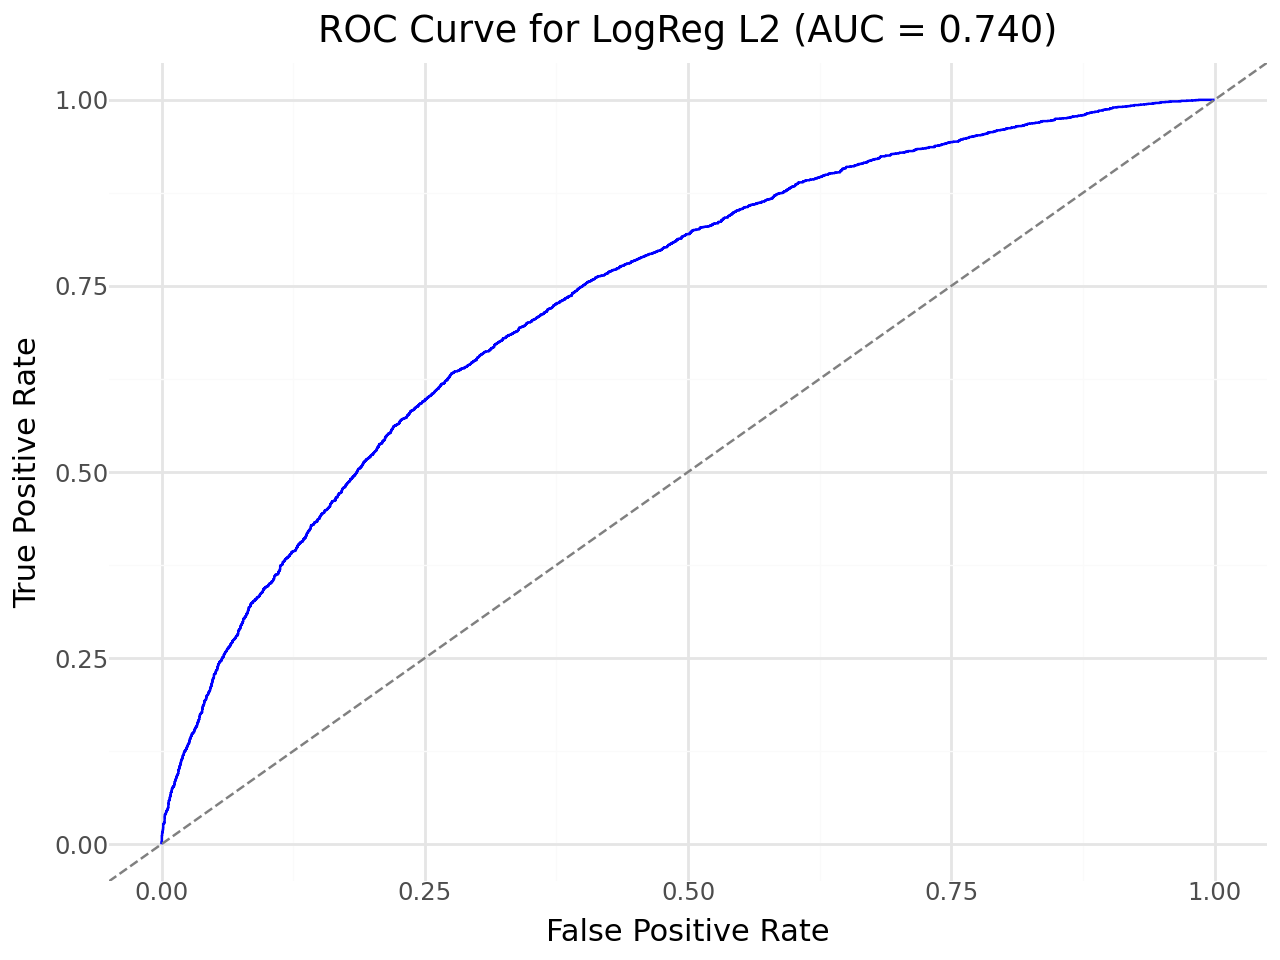

In [20]:
# using all the custom functions we defined for Logistic Regression L2:
print("L2 Logistic Regression Metrics:")
for k, v in metrics_l2.items():
    print(f"{k}: {v:.4f}")

plot_roc_curve(y_test_actual, y_test_proba_l2, 'LogReg L2')

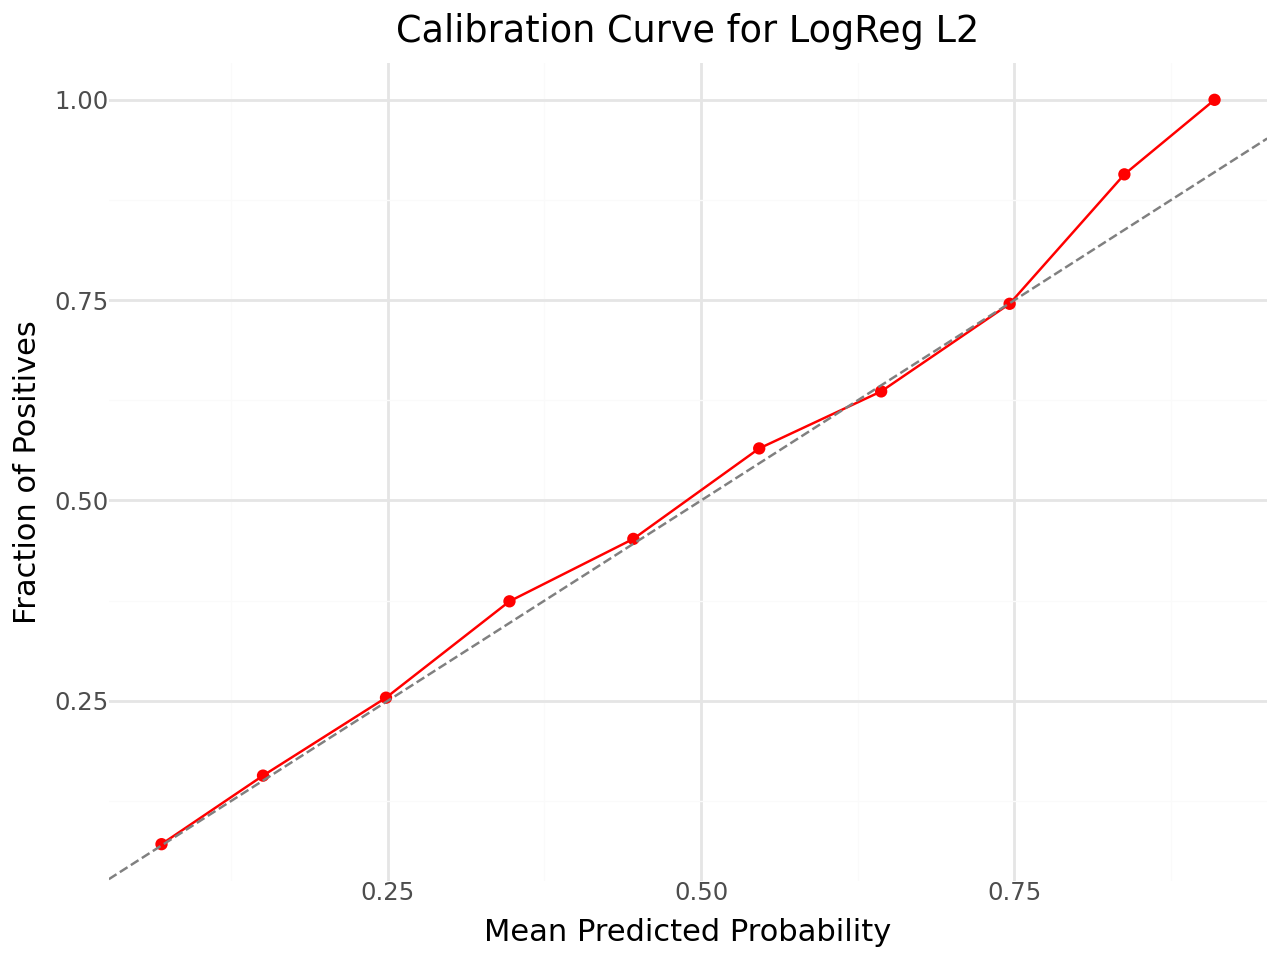

In [21]:
# l2 calibration curve
plot_calibration_curve(y_test_actual, y_test_proba_l2, 'LogReg L2')


L1 Logistic Regression Metrics:
LogReg L1 Train Accuracy: 0.7415
LogReg L1 Train Recall: 0.2744
LogReg L1 Train Precision: 0.6050
LogReg L1 Train ROC AUC: 0.7354

LogReg L1 Test Accuracy: 0.7368
LogReg L1 Test Recall: 0.2821
LogReg L1 Test Precision: 0.6199
LogReg L1 Test ROC AUC: 0.7400


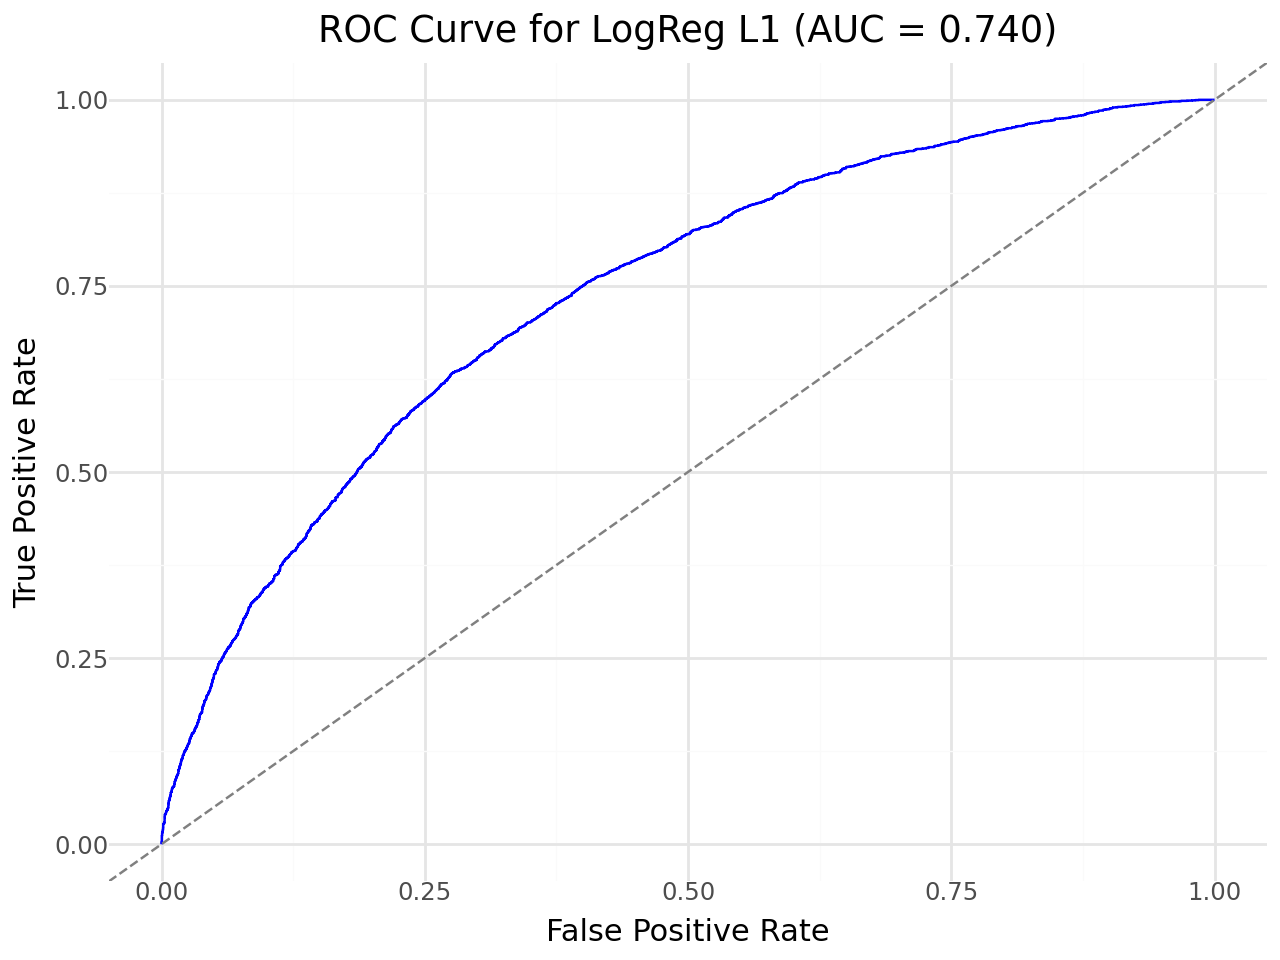

In [22]:
# using all our custom functions for Logistic Regression L1:

print("\nL1 Logistic Regression Metrics:")
for k, v in metrics_l1.items():
    print(f"{k}: {v:.4f}")

plot_roc_curve(y_test_actual, y_test_proba_l1, 'LogReg L1')

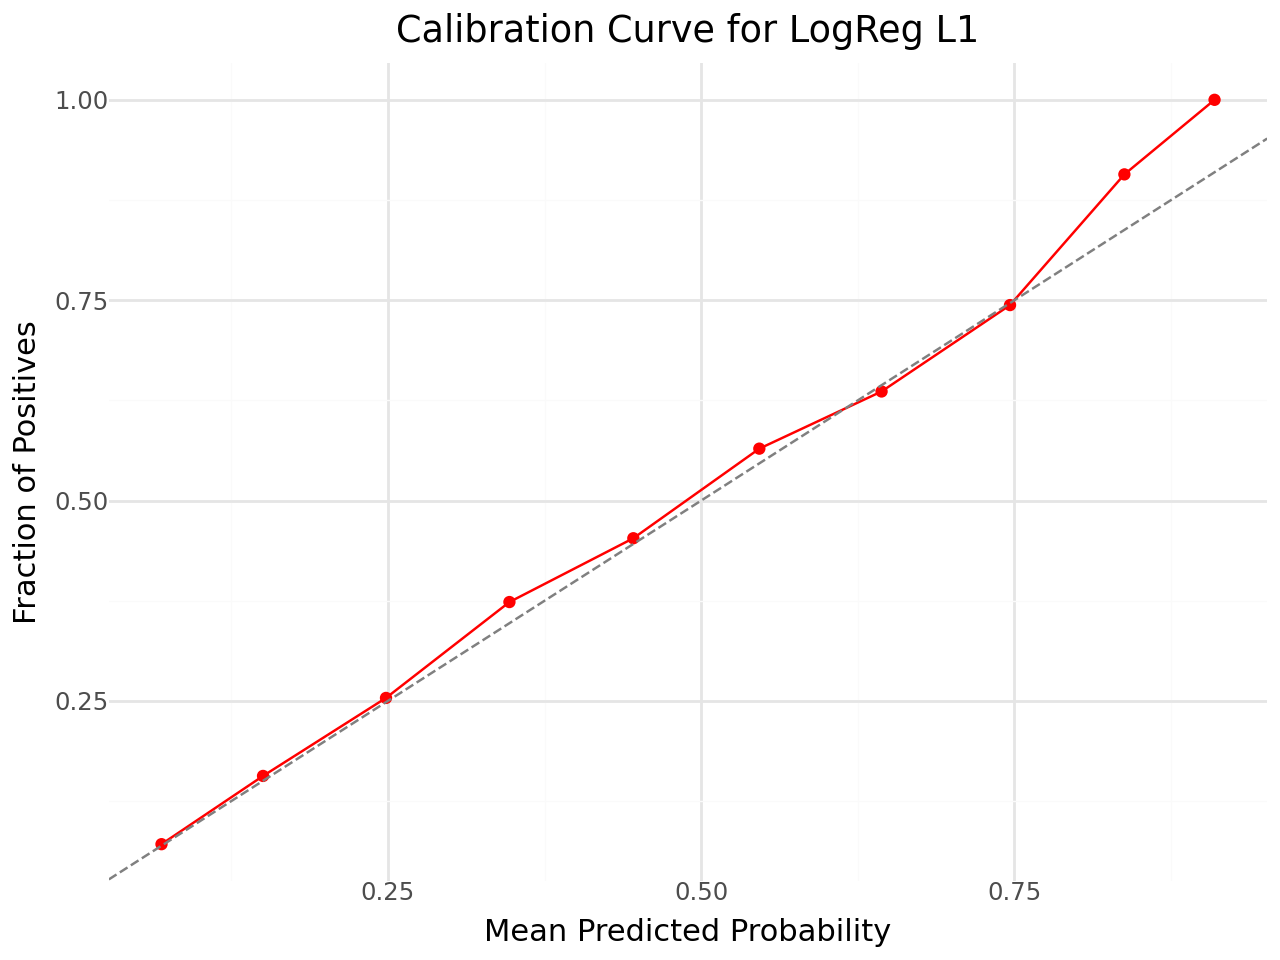

In [23]:
# l1 calibration curve
plot_calibration_curve(y_test_actual, y_test_proba_l1, 'LogReg L1')

> Both logistic regression models using either penalties perform and behave very similarly

> Train and test scores for both models are very close suggesting no strong overfitting and model complexity seems balanced

> Overall both Logistic Regression model shows:

| Metric        | Train         | Test          | Interpretation                                                                                |
| ------------- | ------------- | ------------- | --------------------------------------------------------------------------------------------- |
| **Accuracy**  | 74.15%        | 73.68%        | Correctly classifies about 3 out of 4 samples overall       |
| **Recall**    | 27.44%        | 28.21%        | Slightly higher recall than gradient boosting; still low, so many actual churners are missed. |
| **Precision** | 60.50%-60.52% | 61.99%-62.03% | Precision is moderate — when it predicts churn, it’s right about 60-62% of the time.          |
| **ROC AUC**   | 73.54%        | 74.00%        | Decent discrimination ability.                    |


In [24]:
# repeating the steps above but for a gradient boosting tree model (no need to use X_train_scaled):

gb_model = GradientBoostingClassifier(
    n_estimators=100,      # number of trees
    learning_rate=0.1,     # step size shrinkage
    max_depth=3,          # max depth of each tree
    random_state=42
)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)


Gradient Boosting Metrics:
Gradient Boosting Train Accuracy: 0.7440
Gradient Boosting Train Recall: 0.2655
Gradient Boosting Train Precision: 0.6217
Gradient Boosting Train ROC AUC: 0.7400

Gradient Boosting Test Accuracy: 0.7360
Gradient Boosting Test Recall: 0.2687
Gradient Boosting Test Precision: 0.6238
Gradient Boosting Test ROC AUC: 0.7389


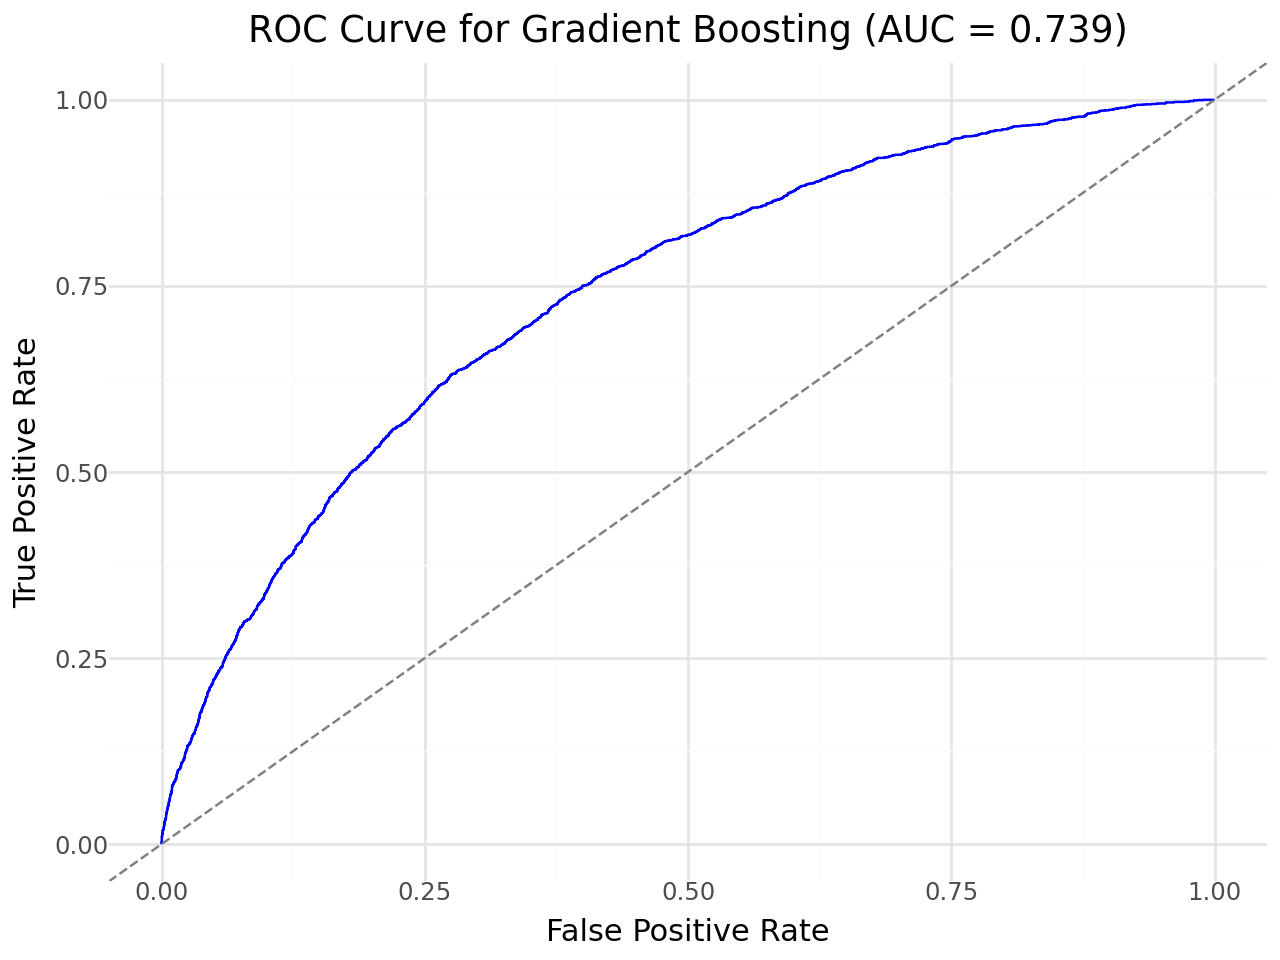

In [25]:
# Evaluate gradient boosting
metrics_gb, y_test_proba_gb, _ = evaluate_classification(
    gb_model, X_train, y_train, X_test, y_test, 'Gradient Boosting'
)

print("\nGradient Boosting Metrics:")
for k, v in metrics_gb.items():
    print(f"{k}: {v:.4f}")

plot_roc_curve(y_test_actual, y_test_proba_gb, 'Gradient Boosting')

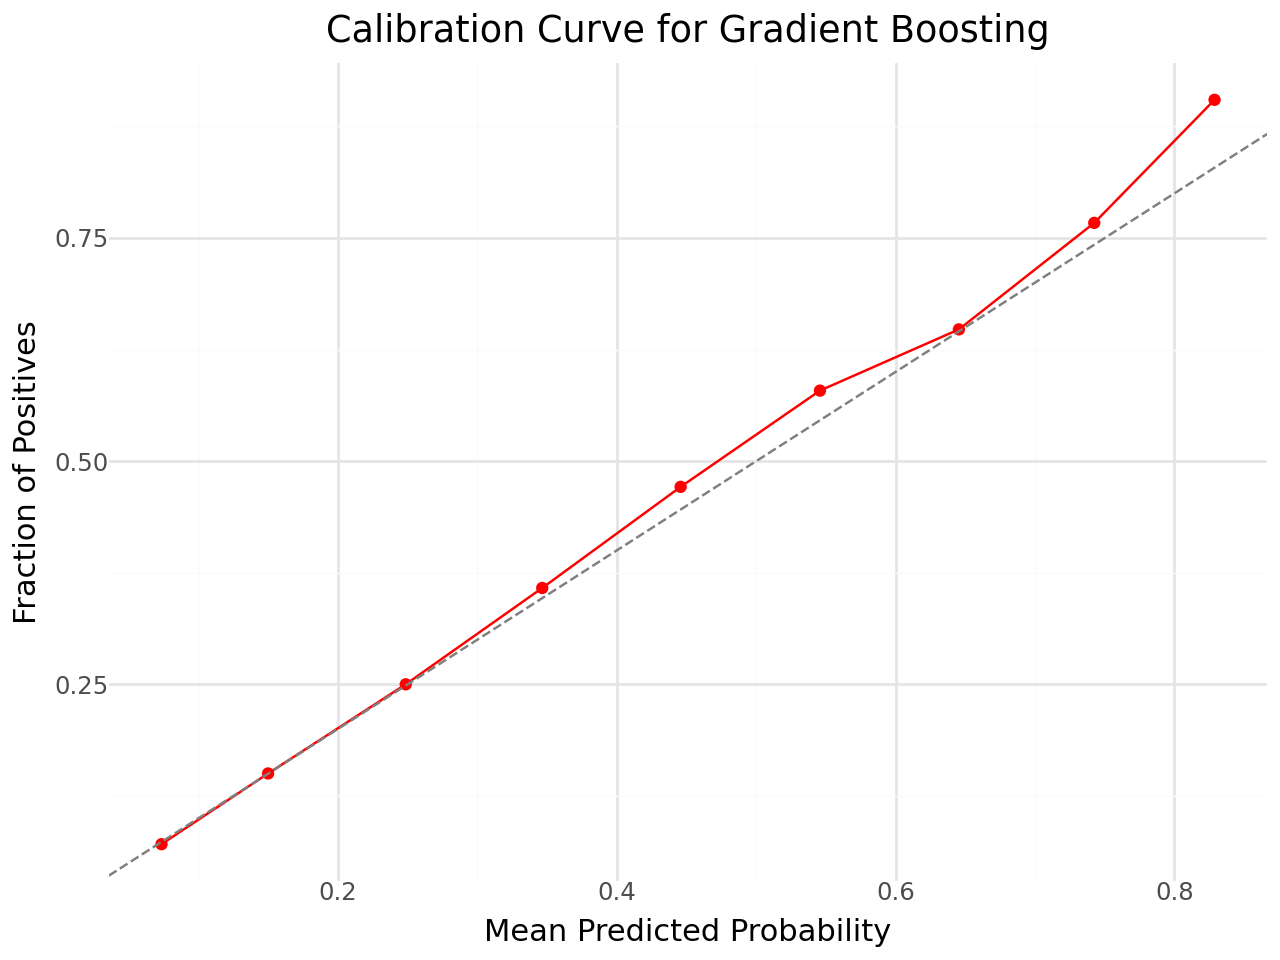

In [26]:
plot_calibration_curve(y_test_actual, y_test_proba_gb, 'Gradient Boosting')

> | Metric        | Train  | Test   | Interpretation                                                                                                          |
| ------------- | ------ | ------ | ----------------------------------------------------------------------------------------------------------------------- |
| **Accuracy**  | 74.40% | 73.60% | Similar overall accuracy to logistic regression (\~74%)                                                                 |
| **Recall**    | 26.55% | 26.87% | Slightly lower recall compared to logistic regression (\~27-28%) — still low, meaning it misses many churners           |
| **Precision** | 62.17% | 62.38% | Precision similar or a bit better than logistic regression — when it predicts churn, it's correct about 62% of the time |
| **ROC AUC**   | 0.7400 | 0.7389 | Comparable discrimination ability to logistic regression (AUC \~0.74)                                                   |

> Gradient Boosting generalizes well: Training and test scores are close — no strong overfitting.

> Performance is on par with logistic regression: Slightly different trade-offs but broadly similar.

# 2. Recommendation System:

Since, both model perform relatively the same, opt to use logisitc regression model (l2 regularization) in in recommendation system for better interpretability and faster training

In [27]:
# predicting probabilities of churning for these new customers:
new_customers = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/streamingNEW.csv")
new_customers

,gender,age,income,monthssubbed,plan,meanhourswatched,competitorsub,numprofiles,cancelled,downgraded,bundle,kids,longestsession,topgenre,secondgenre
0,woman,25.0,73.51,27,B,22.22,1,2,1,0,1,0,263.62,Action,Drama
1,woman,62.0,71.17,70,P,17.54,1,3,0,0,0,0,218.19,RomanticComedy,Thriller
2,nonbinary,70.0,86.25,39,A,3.34,1,3,0,0,0,1,36.40,Documentary,ScienceFiction
3,nonbinary,25.0,70.30,48,B,7.57,0,4,1,0,1,0,72.49,Drama,Comedy
4,woman,47.0,75.81,44,B,5.90,0,5,1,0,0,1,72.99,Documentary,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,woman,35.0,79.99,67,B,89.90,0,3,0,0,1,1,82.04,Comedy,Drama
497,woman,25.0,56.19,45,B,81.80,1,5,0,0,0,0,149.71,Thriller,Horror
498,woman,63.0,79.48,41,B,12.88,0,2,1,1,0,0,220.10,Comedy,Horror
499,other,53.0,64.00,38,B,37.42,0,2,1,0,1,0,49.08,Thriller,Comedy


In [28]:
# repeat the same preprocessing pipeline done earlier but on the new_customers dataframe:
# clean the new customer dataframe:
new_customers.isna().sum()

,0
gender,0
age,7
income,8
monthssubbed,0
plan,0
meanhourswatched,0
competitorsub,0
numprofiles,0
cancelled,0
downgraded,0


In [29]:
# drop missing values + reset index
new_customers.dropna(subset=['age', 'income'], inplace = True)
new_customers.reset_index(drop = True, inplace = True)

In [30]:
# one-hot-encode object columns
new_obj_cols = new_customers.select_dtypes(include=[object]).columns.tolist()
new_obj_cols

['gender', 'plan', 'topgenre', 'secondgenre']

In [31]:
new_customers = pd.get_dummies(new_customers, columns = new_obj_cols)

In [32]:
new_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         487 non-null    float64
 1   income                      487 non-null    float64
 2   monthssubbed                487 non-null    int64  
 3   meanhourswatched            487 non-null    float64
 4   competitorsub               487 non-null    int64  
 5   numprofiles                 487 non-null    int64  
 6   cancelled                   487 non-null    int64  
 7   downgraded                  487 non-null    int64  
 8   bundle                      487 non-null    int64  
 9   kids                        487 non-null    int64  
 10  longestsession              487 non-null    float64
 11  gender_man                  487 non-null    bool   
 12  gender_nonbinary            487 non-null    bool   
 13  gender_other                487 non

In [33]:
# using the previous scaler, scale the new_customers dataframe
new_customers_scaled = scaler.fit_transform(new_customers)
new_customers_scaled

array([[-1.25019566e+00,  2.42272344e-01, -8.10335263e-01, ...,
        -3.56812016e-01, -3.67692990e-01, -5.24279610e-01],
       [ 1.18755736e+00,  9.01171084e-02,  2.09137998e+00, ...,
        -3.56812016e-01, -3.67692990e-01,  1.90737915e+00],
       [ 1.71463909e+00,  1.07067307e+00, -5.54264886e-04, ...,
        -3.56812016e-01,  2.71966022e+00, -5.24279610e-01],
       ...,
       [ 1.25344257e+00,  6.30463264e-01,  1.34409235e-01, ...,
        -3.56812016e-01, -3.67692990e-01, -5.24279610e-01],
       [ 5.94590406e-01, -3.76102138e-01, -6.80360147e-02, ...,
        -3.56812016e-01, -3.67692990e-01, -5.24279610e-01],
       [ 5.28705189e-01, -1.23766490e+00,  2.63123398e+00, ...,
        -3.56812016e-01, -3.67692990e-01, -5.24279610e-01]])

In [34]:
# predict probabilities of churning for new_customers using the logistic regression l2 model:
new_customer_probabilities = log_reg_l2.predict_proba(new_customers_scaled)

In [35]:
new_customer_probabilities

array([[0.50442698, 0.49557302],
       [0.92321036, 0.07678964],
       [0.89527334, 0.10472666],
       [0.74215951, 0.25784049],
       [0.73874614, 0.26125386],
       [0.70741497, 0.29258503],
       [0.6850386 , 0.3149614 ],
       [0.65970339, 0.34029661],
       [0.78412246, 0.21587754],
       [0.8327307 , 0.1672693 ],
       [0.64923419, 0.35076581],
       [0.91449435, 0.08550565],
       [0.8670609 , 0.1329391 ],
       [0.43979915, 0.56020085],
       [0.85685902, 0.14314098],
       [0.62018257, 0.37981743],
       [0.53974956, 0.46025044],
       [0.45568093, 0.54431907],
       [0.86756498, 0.13243502],
       [0.67970735, 0.32029265],
       [0.83364886, 0.16635114],
       [0.89147015, 0.10852985],
       [0.57554952, 0.42445048],
       [0.7491485 , 0.2508515 ],
       [0.92481532, 0.07518468],
       [0.90791345, 0.09208655],
       [0.3322423 , 0.6677577 ],
       [0.89989267, 0.10010733],
       [0.35461176, 0.64538824],
       [0.61394988, 0.38605012],
       [0.

In [36]:
# filtering to probabilities of churning p(churn):
churn_probs = new_customer_probabilities[:, 1]

# creating a new dataframe containing the top 200 most at risk customers for churning:
top_indices = np.argsort(churn_probs)[::-1][:200]
top_customers = new_customers.iloc[top_indices]
top_probs = churn_probs[top_indices]
top_200_df = top_customers.copy()

In [37]:
top_200_df.head()

,age,income,monthssubbed,meanhourswatched,competitorsub,numprofiles,cancelled,downgraded,bundle,kids,...,topgenre_ScienceFiction,topgenre_Thriller,secondgenre_Action,secondgenre_Comedy,secondgenre_Documentary,secondgenre_Drama,secondgenre_Horror,secondgenre_RomanticComedy,secondgenre_ScienceFiction,secondgenre_Thriller
42,26.0,57.69,6,22.30,0,3,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
339,20.0,52.05,1,9.36,1,2,1,0,0,1,...,False,True,False,False,False,False,False,False,True,False
217,69.0,33.62,4,22.90,1,3,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
228,28.0,46.20,4,1.65,1,2,1,1,1,1,...,False,False,False,False,False,False,False,False,False,True
103,39.0,52.25,21,29.91,1,1,1,0,0,0,...,False,True,False,False,True,False,False,False,False,False


In [38]:
# Train a Nearest Neighbors model on the favorites dataset and find the top 200 riskiest's 10 closest neighbors:
# load the favorites dataset for preprocessing:
favorites = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/streamingFILMS.csv")
favorites.head()

,age,income,meanhourswatched,Film1,Film2,Film3,Film4,Film5,Film6,Film7,Film8,Film9,Film10
0,56,85.97,103.47,Embun,Bear Country,Unborn,Autorequiem,Looking Up,"Memory of Justice, The",Taking Tiger Mountain,Drive-by Shooting,Shinobugawa,Classic Queen
1,43,75.70,14.00,Chanoc y el hijo del Santo contra los vampiros...,"Last Just Man, The",Winter,"Na voyne, kak na voyne",Garriage: A Documentary in 4 Chapters and an E...,"2wks, 1yr",Dusk,Karl May,Dieses Jahr in Czernowitz,Secretul lui Bachus
2,45,92.39,14.68,Grauzone,Satyakam,Meet the Stars: Meet Roy Rogers,Brooms,Chasing Daylight,Outside,"Reasonable Hypothesis, A",Man Who Invented the Moon,Shock Act,Sundown
3,50,60.14,64.45,Saturday Night at the Palace,Wedding Advice: Speak Now or Forever Hold Your...,Zenith,Guarding Eddy,Missionary Positions,We Are the Champions,Examen,Meteo,Out-of-Body Experience,"Island, The"
4,36,87.10,15.17,Ponchada,Filmic Achievement,Story from Bhutan: The Making of 'Travellers &...,Please Don't Touch Me,Pony,Silent Whispers,Fim de Festa,Mirt Sost Shi Amit,Boldog lovak,"Nozze di Figaro, Le"


In [39]:
# clean + preprocess the favorites dataframe
favorites.isna().sum()

,0
age,0
income,0
meanhourswatched,0
Film1,0
Film2,0
Film3,0
Film4,0
Film5,0
Film6,0
Film7,0


In [40]:
favorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               500 non-null    int64  
 1   income            500 non-null    float64
 2   meanhourswatched  500 non-null    float64
 3   Film1             500 non-null    object 
 4   Film2             500 non-null    object 
 5   Film3             500 non-null    object 
 6   Film4             500 non-null    object 
 7   Film5             500 non-null    object 
 8   Film6             500 non-null    object 
 9   Film7             500 non-null    object 
 10  Film8             500 non-null    object 
 11  Film9             500 non-null    object 
 12  Film10            500 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 50.9+ KB


In [41]:
# filter to only 'age', 'income', and 'meanhourswatched'

favorites_filtered = favorites[['age', 'income', 'meanhourswatched']]
favorites_filtered

,age,income,meanhourswatched
0,56,85.97,103.47
1,43,75.70,14.00
2,45,92.39,14.68
3,50,60.14,64.45
4,36,87.10,15.17
...,...,...,...
495,58,61.18,4.21
496,53,56.69,13.67
497,54,70.44,30.20
498,59,68.48,6.56


In [42]:
# standardizing the training + testing sets:
favorites_scaled = scaler.fit_transform(favorites_filtered)

In [43]:
# train a nn model using the favories df
nn = NearestNeighbors(n_neighbors = 10, algorithm = 'auto')

nn.fit(favorites_scaled)

NearestNeighbors(n_neighbors=10)

In [44]:
# filtering the top 200 df to the same columns as favorites_scaled:
top_risk_cust = top_200_df[['age', 'income', 'meanhourswatched']]
top_risk_scaled = scaler.transform(top_risk_cust)

# finding the distances and neighbor indices from the NN model:
distances, indices = nn.kneighbors(top_risk_scaled)

# add the distances and neighbor indices to a new dataframe called nearest_neighbors_df:
nearest_neighbors_df = pd.DataFrame({
    'high_risk_customer_idx': list(range(len(top_risk_scaled))),
    'neighbor_indices': list(indices)
})

nearest_neighbors_df.head()

,high_risk_customer_idx,neighbor_indices
0,0,"[209, 317, 416, 328, 268, 363, 307, 111, 445, ..."
1,1,"[381, 307, 342, 328, 445, 8, 363, 370, 194, 197]"
2,2,"[229, 481, 183, 89, 204, 187, 331, 81, 142, 364]"
3,3,"[194, 432, 8, 232, 377, 489, 342, 427, 306, 248]"
4,4,"[159, 19, 410, 140, 469, 114, 31, 41, 100, 245]"


In [45]:
# adding the nearest_neighbors_df's column, 'neighbor_indices', as a column into the top 200 dataframe:
neighbors_list = indices.tolist()
top_200_df = top_200_df.copy()
top_200_df['top_10_similar_users'] = neighbors_list

top_200_df.head(6)

,age,income,monthssubbed,meanhourswatched,competitorsub,numprofiles,cancelled,downgraded,bundle,kids,...,topgenre_Thriller,secondgenre_Action,secondgenre_Comedy,secondgenre_Documentary,secondgenre_Drama,secondgenre_Horror,secondgenre_RomanticComedy,secondgenre_ScienceFiction,secondgenre_Thriller,top_10_similar_users
42,26.0,57.69,6,22.30,0,3,1,0,0,0,...,False,False,False,False,False,False,False,False,True,"[209, 317, 416, 328, 268, 363, 307, 111, 445, ..."
339,20.0,52.05,1,9.36,1,2,1,0,0,1,...,True,False,False,False,False,False,False,True,False,"[381, 307, 342, 328, 445, 8, 363, 370, 194, 197]"
217,69.0,33.62,4,22.90,1,3,0,0,0,0,...,False,False,True,False,False,False,False,False,False,"[229, 481, 183, 89, 204, 187, 331, 81, 142, 364]"
228,28.0,46.20,4,1.65,1,2,1,1,1,1,...,False,False,False,False,False,False,False,False,True,"[194, 432, 8, 232, 377, 489, 342, 427, 306, 248]"
103,39.0,52.25,21,29.91,1,1,1,0,0,0,...,True,False,False,True,False,False,False,False,False,"[159, 19, 410, 140, 469, 114, 31, 41, 100, 245]"
419,18.0,56.15,22,69.11,1,3,1,1,0,0,...,False,False,False,False,False,False,True,False,False,"[442, 433, 76, 378, 240, 445, 209, 337, 44, 328]"


In [46]:
top_200_df.to_csv("top_200_with_neighbors.csv", index=False)

# packaging this to a site:

In [47]:
!pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [48]:
import streamlit as st
import pandas as pd
import ast
from pyngrok import ngrok

In [49]:
ngrok.set_auth_token("31AN9gGWT29IHFrodIeBEFvydcj_6mMwuscXssRBBDqcLpcKc")

In [50]:
%%writefile app.py
import streamlit as st
import pandas as pd
import ast

top_200_df = pd.read_csv("top_200_with_neighbors.csv")
favorites = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/streamingFILMS.csv")

st.title("High-Risk Customer Recommendations")
st.write("Top 200 customers predicted to churn, with suggested retention strategies and content recommendations.")

top_200_df['top_10_similar_users'] = top_200_df['top_10_similar_users'].apply(ast.literal_eval)
movie_columns = [f'Film{i}' for i in range(1, 11)]

def get_recommendations(neighbor_indices):
    recs = []
    for idx in neighbor_indices:
        if idx < len(favorites):
            movies = favorites.loc[idx, movie_columns].tolist()
            recs.append(movies)
    return recs

top_200_df['recommended_movies'] = top_200_df['top_10_similar_users'].apply(get_recommendations)

st.dataframe(top_200_df[['age', 'income', 'monthssubbed',
                         'meanhourswatched', 'top_10_similar_users',
                         'recommended_movies']])

Writing app.py


In [53]:
from pyngrok import ngrok

ngrok.set_auth_token("31AN9gGWT29IHFrodIeBEFvydcj_6mMwuscXssRBBDqcLpcKc")
!streamlit run app.py &>/dev/null&

public_url = ngrok.connect(8501)
print("Streamlit app live at:", public_url)

Streamlit app live at: NgrokTunnel: "https://22f10f4996b5.ngrok-free.app" -> "http://localhost:8501"
